# Notebook Tasks
In this notebook you'll see code used to conduct the following steps:
- Read in merged current/historical/2011 dataset with all BMF and SOI data: 
  - **_merged data with EIN clean-up, SOI data, and 2015, 2008, and 2004 BMF data.pkl_**
  - There are 84,958 rows in this dataset, including some years for which only SOI data are included. 


**_Notes:_**
- Of the 8,304 organizations in the dataset, 4,857 are those that were rated in 2011.
  - 582 of the 5,439 2011 organizations have been dropped by CN, leaving 4,857
- The dataset is organized in a **_org/FY/ratings system_** format 
  - i.e., one row per organization for each fiscal year, with multiple rows per org/FY when there has been a ratings system change from *CN 1.0* to *CN 2.0* to *CN 2.1.* 
  - Some organizations will have more than one entry per fiscal year -- even for the same ratings system (CN2.1, CN2.0, or CN1.0) -- multiple ratings per year are triggered by amended 990s, etc.); e.g., https://www.charitynavigator.org/index.cfm?bay=search.history&orgid=10166
- The baseline for the dataset is data gathered from each organization's *Historical Ratings* page -- you'll see the same number of rows -- and same data for each row -- as seen on those pages; e.g, https://www.charitynavigator.org/index.cfm?bay=search.history&orgid=10166
- What I've done is to merge each organization's current *Rating Profile* into this *org/FY/ratings system* dataset, as seen here: https://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=10166
- I have merged/appended in two rows of data for each organization:
  - **_current ratings_** -- data scraped from the *Rating Profile* in August 2016.
  - **_2011 data_** -- data scraped from the *Rating Profile* in October 2011.
- So, for *SOX policy data*, we have two years' of data -- 2011 and 2016. For all years, we have what is on the *Historical Ratings* page -- namely, the overall numerical score, the overall numerical star rating, and whether the organization was under a donor advisory that year. 


<br>
**_Possible Samples for Statistical Tests_**:
- Given the above, there are a number of possible tests:<br><br>

<table>
  <tr>
    <th>IV: SOX Policies</th>
    <th>DV: Donor Advisory</th>
    <th>N</th>
    <th>Notes</th>
    <th>TO DO</th>
  </tr>
  <tr>
    <td>2011</td>
    <td>2016</td>
    <td>4,857</td>
    <td>47 donor advisories on these organizations; associational test (we don't know when the SOX policies were added); also, DV is 'current donor advisory'</td>
    <td>ready to run<br></td>
  </tr>
  <tr>
    <td>2011</td>
    <td>2012-2016</td>
    <td>4,857</td>
    <td>47 2016 advisories plus probably another dozen or so advisories over the 2012-2015 period; associational test as above, but adds in donor advisories that were put in place then dropped between 2012 and 2015.</td>
    <td>some minor work creating this new DV but not very burdensome</td>
  </tr>
  <tr>
    <td>2011</td>
    <td>2011</td>
    <td>5,439</td>
    <td>39 donor advisories; pure cross-sectional test<br></td>
    <td>Download the '2011' 990 data (SOX policies + controls) for the 39 orgs with a 2011 donor advisory; a few hours work to download and enter the data</td>
  </tr>
  <tr>
    <td>2016</td>
    <td>2016</td>
    <td>8,304</td>
    <td>328 donor advisories; pure cross-sectional test</td>
    <td>ready to run</td>
  </tr>
  <tr>
    <td>change 2011-2016</td>
    <td>2016</td>
    <td>4,857</td>
    <td>'Divide 4,857 orgs into three groups: i) those with no SOX policies in 2011 and still no SOX policies in 2016; ii) those with SOX policies in 2011 and 2016; and iii) those with no SOX policies in 2011 but SOX policies in 2016. Create dummy variables for each group and see whether those in group iii) do better than i) or ii). This is a relatively low cost 'pre-post' test.</td>
    <td>moderate amount of work to create the new dummies but not too burdensome</td>
  </tr>
  <tr>
    <td>change 2011-2016</td>
    <td>2012-2016</td>
    <td>TBD</td>
    <td>Similar to above option, but would need to take a sample of organizations in group iii) and go through their 990s to find out exactly when they added the SOX policies</td>
    <td>Resource-intensive 990 searches</td>
  </tr>
</table>


<br><br>
**_Notes from Meeting with Dan:_**
- Do not do 3rd or 6th test -- benefit not worth the cost
- 1st and 2nd tests can be robustness analyses
- Focus on 4th and 5th tests
- Control variables:
  - Size: total revenues best (probably logged)
    - will need 2011 and 2016 versions for the 4th and 5th tests
  - efficiency ratio
  - age (from BMF)
  - complexity (could be a good control from Erica's paper)
  - fixed effects:
    - state
    - category
      - I need to scrape the category dummies for the new orgs in the 2016 database
        - CN does not include that information in the ratings area, but it is included on the webpage in the 'breadcrumbs' area
  - The focus of our paper is on SOC policies; if an org has SOX policies it probably has other governance policies, and these would be highly correlated. So, we will leave the other governance variables out of one version of the 4th and 5th tests, and then try to include them in another set. The best candidates are:
    - *independent board* --> related to Erica's *independence of key actors" concept
    - *board review of 990* and *audited financials* --> both related to Erica's *board monitoring* concept
    - we could include other governance variables as needed.
- We are focusing on non-health, non-university organizations; by focusing more on a donor-focused sample (CN), we are differentiating the work from previous studies.
- To differentiate from Erica's *JBE* paper, we should use the SOI data to see how many of the donor advisories are because of 'non-material diversions'.



<br><br>
**_To Do (beyond notes listed in table above):_**
- For all above tests, we need to decide on controls, then find/merge/create any not currently in dataset
- Run a selection model?
- Code the *type* of advisory? Maybe save for future study
- There are 53 orgs on the CN 'Watchlist' -- we probably don't need to look at these but it's a possible future move.

<br>
**_Notes on 2011 data:_**
- Only 47 of 329 current donor advisories are on orgs that were rated in 2011
- Number of 2011 orgs (n=5,349) missing from 2016 ratings: 582
- Number of 2016 orgs (n=8,304) not in 2011 ratings: 3,447
- In 2011 when I scraped the current ratings there are 39 blank rows. Specifically, I checked the following spreadsheet: *Charity Navigator - current ratings, October 18, 2011 (WITH UPDATES FOR DONOR ADVISORY ORGS).xlsx*  -- 39 rows were blank for all ratings information, so I checked against the historical ratings on the CN website. (So far) all rows were either 1) dropped from CN, 2) had a donor advisory, or 3) still have a donor advisory. I have 5,439 orgs in the 2011 database. 39 seem to have had donor advisories on them at that time. So, the 2011 sample is the 5,400 orgs that did not have an advisory on them at the time. This conforms with the *n* of 5,400 in the above logit.

<br>

### Import Packages
First, we will import several necessary Python packages. We will be using the <a href="http://pandas.pydata.org/">Python Data Analysis Library,</a> or <i>PANDAS</i>, extensively for our data manipulations. It is invaluable for analyzing datasets. 

Import of basic elements of PANDAS and numpy

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

<br>

We can check which version of various packages we're using. You can see I'm running PANDAS 0.17 here.

In [3]:
print pd.__version__

0.18.1


<br>
PANDAS allows you to set various options for, among other things, inspecting the data. I like to be able to see all of the columns. Therefore, I typically include this line at the top of all my notebooks.

In [4]:
#http://pandas.pydata.org/pandas-docs/stable/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 500)

## Read in Data
Let's read in the merged historical/current/2011 dataset we created in the last notebook. First we'll change the working directory.

In [5]:
cd '/Users/gregorysaxton/Google Drive/SOX'

/Users/gregorysaxton/Google Drive/SOX


#### Historical Ratings

In [6]:
df = pd.read_pickle('merged data with EIN clean-up, SOI data, and 2015, 2008, and 2004 BMF data.pkl')
print "Number of columns:", len(df.columns)
print "Number of observations:", len(df)
df.head(1)

Number of columns: 219
Number of observations: 84958


org_id        EIN  \
0  16722  020503776   

                                                                    org_url  \
0  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=16722   

                                    name        category  \
0  Portsmouth Girls Softball Association  Human Services   

                                               category-full  \
0  Human Services : Multipurpose Human Service Organizations   

        Date Published Form 990 FYE Form 990 FYE, v2      FYE  \
0  2016-08-12 00:00:00      current       2015-01-01  current   

  Earliest Rating Publication Date ratings_system Overall Score  \
0                              NaN        current           NaN   

                  Overall Rating  \
0  current (2016) donor advisory   

                                                                                                                                                    advisory text - current advisory  \
0  \r\n\t\tOn August 1, 2016, the New Hampshire Union Leader published an article titled, "Former Portsmouth youth softball president accused of stealing thousands from nonprofit."   

  advisory text - past advisory  current_or_past_donor_advisory  \
0                           NaN                             1.0   

   current_donor_advisory  past_donor_advisory latest_entry  \
0                     1.0                  0.0         True   

                                                        current_ratings_url  \
0  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=16722   

  ein_2016 Publication_date_and_FY_2016 Publication Date_2016 FYE_2016  \
0      NaN                          NaN                   NaN  current   

              donor_alert_2016 overall_rating_2016  \
0  current donor advisory 2016                 NaN   

  efficiency_rating_rating_2016 AT_rating_2016 overall_rating_star_2016  \
0                           NaN            NaN                      NaN   

  financial_rating_star_2016 AT_rating_star_2016 program_expense_percent_2016  \
0                        NaN                 NaN                          NaN   

  admin_expense_percent_2016 fund_expense_percent_2016 fund_efficiency_2016  \
0                        NaN                       NaN                  NaN   

  working_capital_ratio_2016 program_expense_growth_2016  \
0                        NaN                         NaN   

  liabilities_to_assets_2016 independent_board_2016 no_material_division_2016  \
0                        NaN                    NaN                       NaN   

  audited_financials_2016 no_loans_related_2016 documents_minutes_2016  \
0                     NaN                   NaN                    NaN   

  form_990_2016 conflict_of_interest_policy_2016 whistleblower_policy_2016  \
0           NaN                              NaN                       NaN   

  records_retention_policy_2016 CEO_listed_2016 process_CEO_compensation_2016  \
0                           NaN             NaN                           NaN   

  no_board_compensation_2016 donor_privacy_policy_2016 board_listed_2016  \
0                        NaN                       NaN               NaN   

  audited_financials_web_2016 form_990_web_2016 staff_listed_2016  \
0                         NaN               NaN               NaN   

  contributions_gifts_grants_2016 federated_campaigns_2016  \
0                             NaN                      NaN   

  membership_dues_2016 fundraising_events_2016 related_organizations_2016  \
0                  NaN                     NaN                        NaN   

  government_grants_2016 total_contributions_2016  \
0                    NaN                      NaN   

  program_service_revenue_2016 total_primary_revenue_2016 other_revenue_2016  \
0                          NaN                        NaN                NaN   

  total_revenue_2016 program_expenses_2016 administrative_expenses_2016  \
0                N

### Show columns
The variables are organized as follows. First come the organization identifiers -- *org_id* and *EIN*. These are followed by variables indicating the FY and date the ratings were posted. Then there are variables indicating the existence of a donor advisory, then all of the '2016' *Rating Profile* variables (variable names followed by '_2016') and then all the '2011 variables. After that comes the BMF data and the SOI data.

In [12]:
print df.columns.tolist()

['org_id', 'EIN', 'org_url', 'name', 'category', 'category-full', 'Date Published', 'Form 990 FYE', 'Form 990 FYE, v2', 'FYE', 'Earliest Rating Publication Date', 'ratings_system', 'Overall Score', 'Overall Rating', 'advisory text - current advisory', 'advisory text - past advisory', 'current_or_past_donor_advisory', 'current_donor_advisory', 'past_donor_advisory', 'latest_entry', 'current_ratings_url', 'ein_2016', 'Publication_date_and_FY_2016', 'Publication Date_2016', 'FYE_2016', 'donor_alert_2016', 'overall_rating_2016', 'efficiency_rating_rating_2016', 'AT_rating_2016', 'overall_rating_star_2016', 'financial_rating_star_2016', 'AT_rating_star_2016', 'program_expense_percent_2016', 'admin_expense_percent_2016', 'fund_expense_percent_2016', 'fund_efficiency_2016', 'working_capital_ratio_2016', 'program_expense_growth_2016', 'liabilities_to_assets_2016', 'independent_board_2016', 'no_material_division_2016', 'audited_financials_2016', 'no_loans_related_2016', 'documents_minutes_2016'

<br>**_Note_**: Only 9,951 of the original rows have SOI data; another 1,013 rows are *SOI data only*, but these could be useful for additional tests as well as filling in the blanks with, for instance, SOX data for orgs with current donor advisories.

In [7]:
df['_merge'].value_counts()

left_only     73994
both           9951
right_only     1013
Name: _merge, dtype: int64

#Check how many rows have 2011 data
#Yes, there are 4,857 unique *org_ids* with 2011 data.

In [11]:
#print len(df[df['2011 data']==1])
#print len(set(df[df['2011 data']==1]['org_id'].tolist()))

4863
4857


### FYE
- We have *BMF* data for 2004, 2008, and 2015
- We have *SOI* data for 2008 through 2013
- We have *CN* data for 2002 through 2016

These observations span a broad range of fiscal years, going back as early as FY2000.


In [16]:
df['FYE'].value_counts()

FY2014     15044
FY2013      8572
FY2009      7865
FY2012      7703
FY2010      7092
FY2011      6807
FY2008      4770
FY2007      4441
FY2006      4315
FY2005      4117
FY2004      3887
FY2003      3178
FY2015      2367
FY2002      2190
FY2001      1698
FY2000       591
current      321
Name: FYE, dtype: int64

## Time-Invariant Controls
Age, State, Category

### Age
The ruling date values have already been incorporated into *rule_date* in the prior notebook. After that we were missing the *rule_date* information for 73 observations (that number is higher now given the 1,013 rows with only SOI data). All of those 73 are organizations with a current donor advisory. Let's double check that there are no more BMF ruling date values to incorporate and then merge in SOI *yr_frmtn* values.

In [45]:
print df['RULING_2015_BMF'].value_counts().sum()
df['RULING_2015_BMF'][:3]

83686


0    201104
1    200812
2    200812
Name: RULING_2015_BMF, dtype: float64

In [23]:
print df['ruledate_2004_BMF'].value_counts().sum()
df['ruledate_2004_BMF'][:3]

80768


0       NaN
1    199608
2    199608
Name: ruledate_2004_BMF, dtype: float32

In [29]:
print df['ruledate_MSTRALL'].value_counts().sum()
df['ruledate_MSTRALL'][:3]

0       NaN
1    199608
2    199608
Name: ruledate_MSTRALL, dtype: object

In [38]:
print df['yr_frmtn'].value_counts().sum()
df[df['yr_frmtn'].notnull()]['yr_frmtn'][:3]

10840


156    1874
157    1874
158    1874
Name: yr_frmtn, dtype: float64

In [47]:
print df['rule_date'].value_counts().sum()
df['rule_date'][:3]

83872


0    2011
1    1996
2    1996
Name: rule_date, dtype: object

<br>Check for missing ruling date information in SOI and BMF data

In [46]:
print len(df[df['rule_date'].isnull()])
print len(df[(df['rule_date'].isnull()) & df['yr_frmtn'].notnull()])
print len(df[(df['rule_date'].isnull()) & df['ruledate_MSTRALL'].notnull()])
print len(df[(df['rule_date'].isnull()) & df['ruledate_2004_BMF'].notnull()])
print len(df[(df['rule_date'].isnull()) & df['RULING_2015_BMF'].notnull()])

1086
989
0
0
0


In [8]:
print df['yr_frmtn'].dtype
print df['rule_date'].dtype

float64
object


In [9]:
print len(df[df['rule_date'].isnull()])
df['rule_date'] = np.where( ( df['rule_date'].isnull() & df['yr_frmtn'].notnull() ), 
                           df['yr_frmtn'].astype('str'), df['rule_date']
                          )
print len(df[df['rule_date'].isnull()])

1086
97


In [10]:
df[df['rule_date'].notnull()]['rule_date'][:2]

0    2011
1    1996
Name: rule_date, dtype: object

<br>67 rows have a *rule_date* of 0.0. We need to delete those values.

In [13]:
print len(df[df['rule_date']=='0.0'])
#df[df['rule_date']=='0.0'][['age', 'rule_date', 'name']][:2]
df[df['rule_date']=='0.0'][['rule_date', 'name']][:2]

67


rule_date                      name
1790       0.0  Alaska Wilderness League
1791       0.0  Alaska Wilderness League

In [14]:
print df['rule_date'].value_counts().sum()
df['rule_date'] = np.where(df['rule_date']=='0.0', np.nan, df['rule_date'])
print len(df[df['rule_date']=='0.0'])
print df['rule_date'].value_counts().sum()

84861
0
84794


<br>Same with 5 rows where value is ''

In [15]:
print df['rule_date'].value_counts().sum()
df['rule_date'] = np.where(df['rule_date']=='', np.nan, df['rule_date'])
print len(df[df['rule_date']=='0.0'])
print df['rule_date'].value_counts().sum()

84794
0
84789


<br>Some values have decimals so let's restrict variable to first four characters.

In [16]:
df['rule_date'] = df['rule_date'].str[:4]

<br>Given the above deletions, let's see if we can grab a few more ruling dates.

In [17]:
print len(df[df['rule_date'].isnull()])
df['rule_date'] = np.where( ( df['rule_date'].isnull() & df['yr_frmtn'].notnull() ), 
                           df['yr_frmtn'].astype('str'), df['rule_date']
                          )
print len(df[df['rule_date'].isnull()])

169
161


In [18]:
df.dtypes[160:180]

zip_MSTRALL                    object
fips_MSTRALL                   object
taxper_MSTRALL                 object
income_MSTRALL                float64
F990REV_MSTRALL               float64
assets_MSTRALL                float64
ruledate_MSTRALL               object
deductcd_MSTRALL               object
accper_MSTRALL                 object
rule_date                      object
taxpd                          object
NAME_SOI                       object
yr_frmtn                      float64
pt1_num_vtng_gvrn_bdy_mems    float64
pt1_num_ind_vtng_mems         float64
num_vtng_gvrn_bdy_mems        float64
num_ind_vtng_mems             float64
tot_num_empls                 float64
tot_num_vlntrs                float64
contri_grnts_cy               float64
dtype: object

In [99]:
#df[df['rule_date']=='1996.0'][['rule_date']]

Empty DataFrame
Columns: [rule_date]
Index: []

In [19]:
print df['rule_date'].value_counts().sum()
print len(df[df['rule_date']=='0000'])
df['rule_date'] = np.where(df['rule_date']=='0000', np.nan, df['rule_date'])
print len(df[df['rule_date']=='0000'])
print df['rule_date'].value_counts().sum()

84797
12
0
84785


In [133]:
for index, row in df.iterrows():
    if pd.notnull(row['rule_date']):
        df.ix[index, 'age'] = 2016 - int(row['rule_date'])
    else:
        pass

In [134]:
df['age'].describe()

count    84785.000000
mean        41.056932
std         20.262034
min          0.000000
25%         25.000000
50%         36.000000
75%         53.000000
max        162.000000
Name: age, dtype: float64

In [135]:
print df['rule_date'].value_counts().sum()
print df['age'].value_counts().sum()
#df['age'].value_counts()

84785
84785


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import*
%matplotlib inline
#df['age'].plot(kind='bar')
df[df['age'].notnull()]['age'].plot.hist(by=None, bins=100)

In [124]:
df['age'].describe()

count    84797.000000
mean        41.336415
std         31.022303
min          0.000000
25%         25.000000
50%         36.000000
75%         53.000000
max       2016.000000
Name: age, dtype: float64

In [141]:
df[df['age']>160][['EIN', 'name', 'yr_frmtn', 'FYE', 'age', 'rule_date']]

EIN name  yr_frmtn     FYE  age rule_date
84113  520715244  NaN      1854  FY2008  162      1854
84377  350868211  NaN      1854  FY2009  162      1854
84433  520715244  NaN      1854  FY2009  162      1854

In [144]:
df.set_value(84113, 'rule_date', 1946)
df.set_value(84433, 'rule_date', 1946)
df.set_value(84113, 'age', 2016-1946)
df.set_value(84433, 'age', 2016-1946)
df[df['EIN']=='520715244'][['EIN', 'name', 'yr_frmtn', 'FYE', 'age', 'rule_date']]

EIN                                                  name  \
45332  520715244  Little Sisters of the Poor at St. Martin's Baltimore   
45333  520715244  Little Sisters of the Poor at St. Martin's Baltimore   
45334  520715244  Little Sisters of the Poor at St. Martin's Baltimore   
45335  520715244  Little Sisters of the Poor at St. Martin's Baltimore   
45336  520715244  Little Sisters of the Poor at St. Martin's Baltimore   
84113  520715244                                                   NaN   
84433  520715244                                                   NaN   

       yr_frmtn     FYE  age rule_date  
45332       NaN  FY2014   70      1946  
45333      1854  FY2013   70      1946  
45334       NaN  FY2012   70      1946  
45335       NaN  FY2011   70      1946  
45336       NaN  FY2010   70      1946  
84113      1854  FY2008   70      1946  
84433      1854  FY2009   70      1946

In [146]:
df.set_value(84377, 'rule_date', 1944)
df.set_value(84377, 'age', 2016-1944)
df[df['EIN']=='350868211'][['EIN', 'name', 'yr_frmtn', 'FYE', 'age', 'rule_date']]

EIN                          name  yr_frmtn     FYE  age  \
82938  350868211  YMCA of Greater Indianapolis       NaN  FY2014   72   
82939  350868211  YMCA of Greater Indianapolis       NaN  FY2014   72   
82940  350868211  YMCA of Greater Indianapolis      1854  FY2013   72   
82941  350868211  YMCA of Greater Indianapolis      1854  FY2012   72   
82942  350868211  YMCA of Greater Indianapolis      1854  FY2011   72   
82943  350868211  YMCA of Greater Indianapolis      1854  FY2010   72   
82944  350868211  YMCA of Greater Indianapolis      1854  FY2008   72   
82945  350868211  YMCA of Greater Indianapolis      1854  FY2008   72   
82946  350868211  YMCA of Greater Indianapolis       NaN  FY2007   72   
82947  350868211  YMCA of Greater Indianapolis       NaN  FY2006   72   
82948  350868211  YMCA of Greater Indianapolis       NaN  FY2005   72   
82949  350868211  YMCA of Greater Indianapolis       NaN  FY2004   72   
82950  350868211  YMCA of Greater Indianapolis       NaN  FY2003   72   
82951  350868211  YMCA of Greater Indianapolis       NaN  FY2002   72   
84377  350868211                           NaN      1854  FY2009   72   

      rule_date  
82938      1944  
82939      1944  
82940      1944  
82941      1944  
82942      1944  
82943      1944  
82944      1944  
82945      1944  
82946      1944  
82947      1944  
82948      1944  
82949      1944  
82950      1944  
82951      1944  
84377      1944

In [ ]:
df.set_value(84113, 'rule_date', 1946)
df.set_value(84433, 'rule_date', 1946)
df.set_value(84113, 'age', 2016-1946)
df.set_value(84433, 'age', 2016-1946)
df[df['EIN']=='520715244'][['EIN', 'name', 'yr_frmtn', 'FYE', 'age', 'rule_date']]

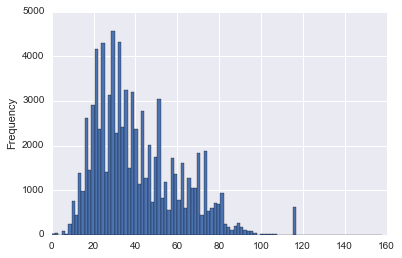

In [147]:
df[df['age'].notnull()]['age'].plot.hist(by=None, bins=100)

In [155]:
df[df['age']>100][['EIN', 'name', 'yr_frmtn', 'FYE', 'age', 'rule_date']][:10]

EIN                           name  yr_frmtn     FYE  age  \
195   731116884  A Chance to Change Foundation       NaN  FY2015  116   
196   731116884  A Chance to Change Foundation       NaN  FY2014  116   
197   731116884  A Chance to Change Foundation       NaN  FY2014  116   
5610  742684333    Any Baby Can of San Antonio       NaN  FY2015  116   
5611  742684333    Any Baby Can of San Antonio       NaN  FY2014  116   
5612  742684333    Any Baby Can of San Antonio       NaN  FY2014  116   
5613  742684333    Any Baby Can of San Antonio       NaN  FY2013  116   
8651  480891418       Bill of Rights Institute       NaN  FY2014  116   
8652  480891418       Bill of Rights Institute       NaN  FY2014  116   
8653  480891418       Bill of Rights Institute       NaN  FY2013  116   

     rule_date  
195       1900  
196       1900  
197       1900  
5610      1900  
5611      1900  
5612      1900  
5613      1900  
8651      1900  
8652      1900  
8653      1900

<br>The problem is with the 2004 BMF dates.

In [153]:
df[df['EIN']=='731116884'][['EIN', 'name', 'yr_frmtn', 'FYE', 'age', 'rule_date',
                           'RULING_2015_BMF', 'ruledate_2004_BMF', 'ruledate_MSTRALL']]

EIN                           name  yr_frmtn     FYE  age  \
195  731116884  A Chance to Change Foundation       NaN  FY2015  116   
196  731116884  A Chance to Change Foundation       NaN  FY2014  116   
197  731116884  A Chance to Change Foundation       NaN  FY2014  116   

    rule_date  RULING_2015_BMF  ruledate_2004_BMF ruledate_MSTRALL  
195      1900           198111             190000           000000  
196      1900           198111             190000           000000  
197      1900           198111             190000           000000

In [152]:
df[df['EIN']=='742684333'][['EIN', 'name', 'yr_frmtn', 'FYE', 'age', 'rule_date',
                           'RULING_2015_BMF', 'ruledate_2004_BMF', 'ruledate_MSTRALL']]

EIN                         name  yr_frmtn     FYE  age  \
5610   742684333  Any Baby Can of San Antonio       NaN  FY2015  116   
5611   742684333  Any Baby Can of San Antonio       NaN  FY2014  116   
5612   742684333  Any Baby Can of San Antonio       NaN  FY2014  116   
5613   742684333  Any Baby Can of San Antonio       NaN  FY2013  116   
84203  742684333                          NaN      1993  FY2009   23   
84525  742684333                          NaN      1993  FY2010   23   

      rule_date  RULING_2015_BMF  ruledate_2004_BMF ruledate_MSTRALL  
5610       1900           201107             190000           000000  
5611       1900           201107             190000           000000  
5612       1900           201107             190000           000000  
5613       1900           201107             190000           000000  
84203      1993              NaN                NaN              NaN  
84525      1993              NaN                NaN              NaN

In [156]:
df[df['EIN']=='480891418'][['EIN', 'name', 'yr_frmtn', 'FYE', 'age', 'rule_date',
                           'RULING_2015_BMF', 'ruledate_2004_BMF', 'ruledate_MSTRALL']]

EIN                      name  yr_frmtn     FYE  age rule_date  \
8651  480891418  Bill of Rights Institute       NaN  FY2014  116      1900   
8652  480891418  Bill of Rights Institute       NaN  FY2014  116      1900   
8653  480891418  Bill of Rights Institute       NaN  FY2013  116      1900   
8654  480891418  Bill of Rights Institute       NaN  FY2012  116      1900   
8655  480891418  Bill of Rights Institute       NaN  FY2011  116      1900   
8656  480891418  Bill of Rights Institute       NaN  FY2010  116      1900   
8657  480891418  Bill of Rights Institute       NaN  FY2009  116      1900   
8658  480891418  Bill of Rights Institute       NaN  FY2008  116      1900   

      RULING_2015_BMF  ruledate_2004_BMF ruledate_MSTRALL  
8651           198006             190000           000000  
8652           198006             190000           000000  
8653           198006             190000           000000  
8654           198006             190000           000000  
8655           198006             190000           000000  
8656           198006             190000           000000  
8657           198006             190000           000000  
8658           198006             190000           000000

# Start Over - BMF 2004 and MSTRALL values for ruling date were wrong in above examples

In [182]:
#df['rule_date_v2'] = df['rule_date']

In [20]:
df = pd.read_pickle('merged data with EIN clean-up, SOI data, and 2015, 2008, and 2004 BMF data.pkl')
print "Number of columns:", len(df.columns)
print "Number of observations:", len(df)
df.head(1)

Number of columns: 219
Number of observations: 84958


org_id        EIN  \
0  16722  020503776   

                                                                    org_url  \
0  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=16722   

                                    name        category  \
0  Portsmouth Girls Softball Association  Human Services   

                                               category-full  \
0  Human Services : Multipurpose Human Service Organizations   

        Date Published Form 990 FYE Form 990 FYE, v2      FYE  \
0  2016-08-12 00:00:00      current       2015-01-01  current   

  Earliest Rating Publication Date ratings_system Overall Score  \
0                              NaN        current           NaN   

                  Overall Rating  \
0  current (2016) donor advisory   

                                                                                                                                                    advisory text - current advisory  \
0  \r\n\t\tOn August 1, 2016, the New Hampshire Union Leader published an article titled, "Former Portsmouth youth softball president accused of stealing thousands from nonprofit."   

  advisory text - past advisory  current_or_past_donor_advisory  \
0                           NaN                             1.0   

   current_donor_advisory  past_donor_advisory latest_entry  \
0                     1.0                  0.0         True   

                                                        current_ratings_url  \
0  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=16722   

  ein_2016 Publication_date_and_FY_2016 Publication Date_2016 FYE_2016  \
0      NaN                          NaN                   NaN  current   

              donor_alert_2016 overall_rating_2016  \
0  current donor advisory 2016                 NaN   

  efficiency_rating_rating_2016 AT_rating_2016 overall_rating_star_2016  \
0                           NaN            NaN                      NaN   

  financial_rating_star_2016 AT_rating_star_2016 program_expense_percent_2016  \
0                        NaN                 NaN                          NaN   

  admin_expense_percent_2016 fund_expense_percent_2016 fund_efficiency_2016  \
0                        NaN                       NaN                  NaN   

  working_capital_ratio_2016 program_expense_growth_2016  \
0                        NaN                         NaN   

  liabilities_to_assets_2016 independent_board_2016 no_material_division_2016  \
0                        NaN                    NaN                       NaN   

  audited_financials_2016 no_loans_related_2016 documents_minutes_2016  \
0                     NaN                   NaN                    NaN   

  form_990_2016 conflict_of_interest_policy_2016 whistleblower_policy_2016  \
0           NaN                              NaN                       NaN   

  records_retention_policy_2016 CEO_listed_2016 process_CEO_compensation_2016  \
0                           NaN             NaN                           NaN   

  no_board_compensation_2016 donor_privacy_policy_2016 board_listed_2016  \
0                        NaN                       NaN               NaN   

  audited_financials_web_2016 form_990_web_2016 staff_listed_2016  \
0                         NaN               NaN               NaN   

  contributions_gifts_grants_2016 federated_campaigns_2016  \
0                             NaN                      NaN   

  membership_dues_2016 fundraising_events_2016 related_organizations_2016  \
0                  NaN                     NaN                        NaN   

  government_grants_2016 total_contributions_2016  \
0                    NaN                      NaN   

  program_service_revenue_2016 total_primary_revenue_2016 other_revenue_2016  \
0                          NaN                        NaN                NaN   

  total_revenue_2016 program_expenses_2016 administrative_expenses_2016  \
0                N

In [21]:
updated_ruledate = pd.read_excel('91 orgs missing BMF data_DGN.xls')
print len(updated_ruledate)
updated_ruledate[:3]

91


org_id          EIN                                                  name  \
0   14954          NaN                                    26.4.26 Foundation   
1   16191  200309308.0  The Affordable Housing Coalition of San Diego County   
2   15442  261786633.0                                    All Day Foundation   

                category  \
0         Human Services   
1  Community Development   
2         Human Services   

                                                                    org_url  \
0  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=14954   
1  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=16191   
2  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=15442   

                                  Guidestar URL  Ruling Year  
0                                           NaN          NaN  
1                                           NaN          NaN  
2  https://www.guidestar.org/profile/26-1786633       2008.0

In [22]:
print len(updated_ruledate[updated_ruledate['Ruling Year'].notnull()])
updated_ruledate = updated_ruledate[updated_ruledate['Ruling Year'].notnull()]
updated_ruledate = updated_ruledate[['org_id', 'Ruling Year']]
updated_ruledate.columns = ['org_id', 'rule_date']
updated_ruledate['org_id'] = updated_ruledate['org_id'].astype('str')
print len(updated_ruledate)
updated_ruledate

18
18


org_id  rule_date
2   15442     2008.0
7   16157     2001.0
19  13233     2006.0
21  16178     2008.0
23  13944     2009.0
35  16204     2015.0
40  16207     2005.0
51  15512     2010.0
53  13772     2006.0
58  16648     1970.0
61  16185     2011.0
63  16154     2008.0
68  16236     2012.0
70  16188     2015.0
72  16189     2005.0
84  16217     2011.0
89  16136     2007.0
90  13627     2010.0

In [23]:
print len(df.columns)
print len(df)
print len(pd.merge(df, updated_ruledate, left_on='org_id', right_on='org_id', how='left'))
df = pd.merge(df, updated_ruledate, left_on='org_id', right_on='org_id', how='left')
print len(df.columns)
print len(df)

219
84958
84958
220
84958


In [24]:
df.rename(columns={'rule_date_x':'rule_date_v1'}, inplace=True)
df.rename(columns={'rule_date_y':'rule_date'}, inplace=True)

In [25]:
print len(df[df['rule_date_v1'].isnull()])
print len(df[df['rule_date'].isnull()])

1086
84940


In [26]:
df['rule_date'].value_counts().sum()

18

In [27]:
df[df['name']=='Kids Charity of Tampa Bay'][['org_id', 'name', 'EIN']]

org_id                       name        EIN
43256  13110  Kids Charity of Tampa Bay  550900271
43257  13110  Kids Charity of Tampa Bay  550900271
43258  13110  Kids Charity of Tampa Bay  550900271
43259  13110  Kids Charity of Tampa Bay  550900271
43260  13110  Kids Charity of Tampa Bay  550900271

In [28]:
print df['rule_date'].value_counts().sum()
df['rule_date'] = np.where(df['EIN']=='550900271', '2006', df['rule_date'])
df['rule_date'].value_counts()

18


nan       84935
2006          5
2008.0        3
2010.0        2
2006.0        2
2005.0        2
2015.0        2
2011.0        2
2007.0        1
2009.0        1
2001.0        1
1970.0        1
2012.0        1
Name: rule_date, dtype: int64

In [29]:
print len(df[df['rule_date']=='nan']), len(df[df['rule_date'].isnull()])
df['rule_date'] = np.where(df['rule_date']=='nan', np.nan, df['rule_date']
                    )
print df['rule_date'].value_counts().sum()
print len(df[df['rule_date'].isnull()])

84935 0
23
84935


In [30]:
print df['rule_date'].dtype
df['rule_date'].value_counts()

object


2006      5
2008.0    3
2010.0    2
2006.0    2
2005.0    2
2015.0    2
2011.0    2
2007.0    1
2009.0    1
2001.0    1
1970.0    1
2012.0    1
Name: rule_date, dtype: int64

In [31]:
df['rule_date'] = df['rule_date'].str[:4]
df['rule_date'].value_counts()

2006    7
2008    3
2010    2
2011    2
2015    2
2005    2
1970    1
2012    1
2009    1
2007    1
2001    1
Name: rule_date, dtype: int64

In [32]:
print len(df[df['rule_date'].isnull()])
print len(df[df['rule_date'].notnull()])
df['rule_date'] = np.where( ( df['rule_date'].isnull() & df['RULING_2015_BMF'].notnull() ), 
                           df['RULING_2015_BMF'].astype('str').str[:4], df['rule_date']
                          )
print len(df[df['rule_date'].isnull()])
print len(df[df['rule_date'].notnull()])

84935
23
1249
83709


In [33]:
df['rule_date'].value_counts().sum()

83709

In [34]:
df[['EIN', 'name', 'yr_frmtn', 'FYE', 'rule_date',
                           'RULING_2015_BMF', 'ruledate_2004_BMF', 'ruledate_MSTRALL']].dtypes

EIN                   object
name                  object
yr_frmtn             float64
FYE                   object
rule_date             object
RULING_2015_BMF      float64
ruledate_2004_BMF    float32
ruledate_MSTRALL      object
dtype: object

In [35]:
df['ruledate_2004_BMF_v2'] = df['ruledate_2004_BMF'].astype('str').str[:4]
df['ruledate_MSTRALL_v2'] = df['ruledate_MSTRALL'].str[:4]
df['yr_frmtn_v2'] = df['yr_frmtn'].astype('str').str[:4]

In [36]:
df['ruledate_2004_BMF_v2'] = np.where(df['ruledate_2004_BMF_v2']=='nan', np.nan, df['ruledate_2004_BMF_v2']
                    )

In [37]:
df[df['rule_date'].isnull() & df['ruledate_2004_BMF'].notnull()][['EIN', 'name',  
                            'rule_date', 'yr_frmtn', 'yr_frmtn_v2',
                           'RULING_2015_BMF', 'ruledate_2004_BMF_v2', 'ruledate_MSTRALL_v2']][4:22]

EIN                                       name rule_date  \
3475  133636844  American Foundation for Disabled Children       NaN   
3476  133636844  American Foundation for Disabled Children       NaN   
3477  133636844  American Foundation for Disabled Children       NaN   
3478  133636844  American Foundation for Disabled Children       NaN   
3479  133636844  American Foundation for Disabled Children       NaN   
3480  133636844  American Foundation for Disabled Children       NaN   
3481  133636844  American Foundation for Disabled Children       NaN   
3482  133636844  American Foundation for Disabled Children       NaN   
3483  133636844  American Foundation for Disabled Children       NaN   
6395  942923077            ASCEND: a Humanitarian Alliance       NaN   
7339  351965051                        Backstreet Missions       NaN   
7340  351965051                        Backstreet Missions       NaN   
7341  351965051                        Backstreet Missions       NaN   
7342  351965051                        Backstreet Missions       NaN   
7343  351965051                        Backstreet Missions       NaN   
7344  351965051                        Backstreet Missions       NaN   
7345  351965051                        Backstreet Missions       NaN   
7346  351965051                        Backstreet Missions       NaN   

      yr_frmtn yr_frmtn_v2  RULING_2015_BMF ruledate_2004_BMF_v2  \
3475       NaN         nan              NaN                 1997   
3476       NaN         nan              NaN                 1997   
3477       NaN         nan              NaN                 1997   
3478       NaN         nan              NaN                 1997   
3479       NaN         nan              NaN                 1997   
3480       NaN         nan              NaN                 1997   
3481       NaN         nan              NaN                 1997   
3482       NaN         nan              NaN                 1997   
3483       NaN         nan              NaN                 1997   
6395       NaN         nan              NaN                 1984   
7339       NaN         nan              NaN                 1996   
7340       NaN         nan              NaN                 1996   
7341       NaN         nan              NaN                 1996   
7342       NaN         nan              NaN                 1996   
7343       NaN         nan              NaN                 1996   
7344       NaN         nan              NaN                 1996   
7345       NaN         nan              NaN                 1996   
7346       NaN         nan              NaN                 1996   

     ruledate_MSTRALL_v2  
3475                1997  
3476                1997  
3477                1997  
3478                1997  
3479                1997  
3480                1997  
3481                1997  
3482                1997  
3483                1997  
6395                1984  
7339                1996  
7340                1996  
7341                1996  
7342                1996  
7343                1996  
7344                1996  
7345                1996  
7346                1996

In [38]:
df['ruledate_2004_BMF_v2'] = df['ruledate_2004_BMF_v2'].astype('float')#.dtype

In [39]:
df[(df['rule_date'].isnull()) & (df['ruledate_2004_BMF'].notnull()) & (df['ruledate_2004_BMF_v2'].notnull())
    & (df['ruledate_2004_BMF_v2']<1970)][['EIN', 'name',  
                            'rule_date', 'yr_frmtn', 'yr_frmtn_v2',
                           'RULING_2015_BMF', 'ruledate_2004_BMF_v2', 'ruledate_MSTRALL_v2']]

EIN                                       name rule_date  \
16998  440616374                             Children's TLC       NaN   
16999  440616374                             Children's TLC       NaN   
17000  440616374                             Children's TLC       NaN   
20070  066079596  Community Health Charities of New England       NaN   
20071  066079596  Community Health Charities of New England       NaN   
20072  066079596  Community Health Charities of New England       NaN   
20073  066079596  Community Health Charities of New England       NaN   
20074  066079596  Community Health Charities of New England       NaN   
20075  066079596  Community Health Charities of New England       NaN   
20076  066079596  Community Health Charities of New England       NaN   
20077  066079596  Community Health Charities of New England       NaN   
20078  066079596  Community Health Charities of New England       NaN   
20079  066079596  Community Health Charities of New England       NaN   
20080  066079596  Community Health Charities of New England       NaN   
20081  066079596  Community Health Charities of New England       NaN   
20082  066079596  Community Health Charities of New England       NaN   
20083  066079596  Community Health Charities of New England       NaN   
20084  066079596  Community Health Charities of New England       NaN   
43176  131777413     Kidney & Urology Foundation of America       NaN   
43177  131777413     Kidney & Urology Foundation of America       NaN   
43178  131777413     Kidney & Urology Foundation of America       NaN   
43179  131777413     Kidney & Urology Foundation of America       NaN   
43180  131777413     Kidney & Urology Foundation of America       NaN   
43181  131777413     Kidney & Urology Foundation of America       NaN   
43182  131777413     Kidney & Urology Foundation of America       NaN   
43183  131777413     Kidney & Urology Foundation of America       NaN   
43184  131777413     Kidney & Urology Foundation of America       NaN   
43185  131777413     Kidney & Urology Foundation of America       NaN   
43186  131777413     Kidney & Urology Foundation of America       NaN   
43187  131777413     Kidney & Urology Foundation of America       NaN   
53168  990266733       National Kidney Foundation of Hawaii       NaN   
53169  990266733       National Kidney Foundation of Hawaii       NaN   
53170  990266733       National Kidney Foundation of Hawaii       NaN   
53171  990266733       National Kidney Foundation of Hawaii       NaN   
53172  990266733       National Kidney Foundation of Hawaii       NaN   
53173  990266733       National Kidney Foundation of Hawaii       NaN   
53174  990266733       National Kidney Foundation of Hawaii       NaN   
53175  990266733       National Kidney Foundation of Hawaii       NaN   
53176  990266733       National Kidney Foundation of Hawaii       NaN   
53177  990266733       National Kidney Foundation of Hawaii       NaN   
53178  990266733       National Kidney Foundation of Hawaii       NaN   
53179  990266733       National Kidney Foundation of Hawaii       NaN   
53180  990266733       National Kidney Foundation of Hawaii       NaN   
53181  990266733       National Kidney Foundation of Hawaii       NaN   
82725  942719901                          Yavneh Day School       NaN   
83903  942719901                          Yavneh Day School       NaN   

       yr_frmtn yr_frmtn_v2  RULING_2015_BMF  ruledate_2004_BMF_v2  \
16998       NaN         nan              NaN                1958.0   
16999       NaN         nan              NaN                1958.0   
17000       NaN         nan              NaN                1958.0   
20070       NaN         nan              NaN                1966.0   
20071       NaN         nan              NaN                1966.0   
20072       NaN         nan              NaN                1966.0   
20073       NaN         nan              NaN                1966.0   
20074       NaN      

In [40]:
print df['ruledate_2004_BMF_v2'].value_counts().sum()
df['ruledate_2004_BMF_v2'] = np.where(df['EIN']=='942719901', 1980, df['ruledate_2004_BMF_v2'])
print df['ruledate_2004_BMF_v2'].value_counts().sum()

80768
80768


In [41]:
df[(df['rule_date'].isnull()) & (df['ruledate_2004_BMF'].notnull()) & (df['ruledate_2004_BMF_v2'].notnull())
    & (df['ruledate_2004_BMF_v2']<1970)][['EIN', 'name',  
                            'rule_date', 'yr_frmtn', 'yr_frmtn_v2',
                           'RULING_2015_BMF', 'ruledate_2004_BMF_v2', 'ruledate_MSTRALL_v2']]

EIN                                       name rule_date  \
16998  440616374                             Children's TLC       NaN   
16999  440616374                             Children's TLC       NaN   
17000  440616374                             Children's TLC       NaN   
20070  066079596  Community Health Charities of New England       NaN   
20071  066079596  Community Health Charities of New England       NaN   
20072  066079596  Community Health Charities of New England       NaN   
20073  066079596  Community Health Charities of New England       NaN   
20074  066079596  Community Health Charities of New England       NaN   
20075  066079596  Community Health Charities of New England       NaN   
20076  066079596  Community Health Charities of New England       NaN   
20077  066079596  Community Health Charities of New England       NaN   
20078  066079596  Community Health Charities of New England       NaN   
20079  066079596  Community Health Charities of New England       NaN   
20080  066079596  Community Health Charities of New England       NaN   
20081  066079596  Community Health Charities of New England       NaN   
20082  066079596  Community Health Charities of New England       NaN   
20083  066079596  Community Health Charities of New England       NaN   
20084  066079596  Community Health Charities of New England       NaN   
43176  131777413     Kidney & Urology Foundation of America       NaN   
43177  131777413     Kidney & Urology Foundation of America       NaN   
43178  131777413     Kidney & Urology Foundation of America       NaN   
43179  131777413     Kidney & Urology Foundation of America       NaN   
43180  131777413     Kidney & Urology Foundation of America       NaN   
43181  131777413     Kidney & Urology Foundation of America       NaN   
43182  131777413     Kidney & Urology Foundation of America       NaN   
43183  131777413     Kidney & Urology Foundation of America       NaN   
43184  131777413     Kidney & Urology Foundation of America       NaN   
43185  131777413     Kidney & Urology Foundation of America       NaN   
43186  131777413     Kidney & Urology Foundation of America       NaN   
43187  131777413     Kidney & Urology Foundation of America       NaN   
53168  990266733       National Kidney Foundation of Hawaii       NaN   
53169  990266733       National Kidney Foundation of Hawaii       NaN   
53170  990266733       National Kidney Foundation of Hawaii       NaN   
53171  990266733       National Kidney Foundation of Hawaii       NaN   
53172  990266733       National Kidney Foundation of Hawaii       NaN   
53173  990266733       National Kidney Foundation of Hawaii       NaN   
53174  990266733       National Kidney Foundation of Hawaii       NaN   
53175  990266733       National Kidney Foundation of Hawaii       NaN   
53176  990266733       National Kidney Foundation of Hawaii       NaN   
53177  990266733       National Kidney Foundation of Hawaii       NaN   
53178  990266733       National Kidney Foundation of Hawaii       NaN   
53179  990266733       National Kidney Foundation of Hawaii       NaN   
53180  990266733       National Kidney Foundation of Hawaii       NaN   
53181  990266733       National Kidney Foundation of Hawaii       NaN   

       yr_frmtn yr_frmtn_v2  RULING_2015_BMF  ruledate_2004_BMF_v2  \
16998       NaN         nan              NaN                1958.0   
16999       NaN         nan              NaN                1958.0   
17000       NaN         nan              NaN                1958.0   
20070       NaN         nan              NaN                1966.0   
20071       NaN         nan              NaN                1966.0   
20072       NaN         nan              NaN                1966.0   
20073       NaN         nan              NaN                1966.0   
20074       NaN         nan              NaN                1966.0   
20075       NaN         nan              NaN                1966.0   
20076       NaN         nan

##### Quick save 

In [286]:
df.to_pickle('quick save - merged with age fixes.pkl')

#### Now merge in 2004 BMF rule date values

In [42]:
print len(df[df['rule_date'].isnull()])
df['rule_date'] = np.where( ( df['rule_date'].isnull() & df['ruledate_2004_BMF_v2'].notnull() ), 
                           df['ruledate_2004_BMF_v2'].astype('str').str[:4], df['rule_date']
                          )
print len(df[df['rule_date'].isnull()])

1249
1091


In [43]:
print len(df[(df['rule_date'].isnull())])
print len(df[df['rule_date'].notnull()])
print len(df[(df['rule_date'].isnull()) & df['yr_frmtn'].notnull()])
print len(df[(df['rule_date'].isnull()) & df['ruledate_MSTRALL'].notnull()])

1091
83867
989
5


##### Merge in MSTRALL values

In [44]:
df[df['rule_date'].isnull() & df['ruledate_MSTRALL_v2'].notnull()][['EIN', 'name',  
                                                                  'rule_date',
                                                                  'yr_frmtn', 'yr_frmtn_v2',
                           'RULING_2015_BMF', 'ruledate_2004_BMF_v2', 
                            'ruledate_MSTRALL_v2']]

EIN                                               name rule_date  \
2299   591951577   Allied Veterans of the World Inc. and Affiliates       NaN   
7107   251892177  August Wilson Center for African American Culture       NaN   
11932  050604703                            C & O Conservation Inc.       NaN   
20124  300256973         Community Rehabilitation Center Foundation       NaN   
56127  030498214                                         Newark Now       NaN   

       yr_frmtn yr_frmtn_v2  RULING_2015_BMF  ruledate_2004_BMF_v2  \
2299        NaN         nan              NaN                   NaN   
7107        NaN         nan              NaN                   NaN   
11932       NaN         nan              NaN                   NaN   
20124       NaN         nan              NaN                   NaN   
56127       NaN         nan              NaN                   NaN   

      ruledate_MSTRALL_v2  
2299                 1996  
7107                 2002  
11932                2004  
20124                2004  
56127                2003

In [45]:
print len(df[df['rule_date'].isnull()])
df['rule_date'] = np.where( ( df['rule_date'].isnull() & df['ruledate_MSTRALL_v2'].notnull() ), 
                           df['ruledate_MSTRALL_v2'].str[:4], df['rule_date']
                          )
print len(df[df['rule_date'].isnull()])

1091
1086


##### Quick save

In [317]:
df.to_pickle('quick save - merged with age fixes.pkl')

##### No need to try with SOI variable
NOTE: All 985 cases where the *yr_frmtn* is available but *rule_date* is missing are 'right_only' merges ('SOI only' data).

In [46]:
print len(df[(df['rule_date'].isnull()) & (df['yr_frmtn'].notnull())])
print len(df[(df['rule_date'].isnull()) & (df['yr_frmtn'].notnull()) & (df['yr_frmtn']<1955)])
print len(df[(df['rule_date'].isnull()) & (df['yr_frmtn'].notnull()) & (df['_merge']=='right_only')])
print len(df[(df['rule_date'].isnull()) & (df['yr_frmtn'].notnull()) & (df['yr_frmtn']<1955)
            & (df['_merge']=='right_only')])

989
278
989
278


In [47]:
df[(df['rule_date'].isnull()) & (df['yr_frmtn'].notnull()) & (df['yr_frmtn']<1940)
                            ][['EIN', 'name',  
                            'rule_date', 'yr_frmtn', 'yr_frmtn_v2',
                           'RULING_2015_BMF', 'ruledate_2004_BMF_v2', 'ruledate_MSTRALL_v2', '_merge']][:2]

EIN name rule_date  yr_frmtn yr_frmtn_v2  RULING_2015_BMF  \
83945  010211478  NaN       NaN    1937.0        1937              NaN   
83946  010212541  NaN       NaN    1911.0        1911              NaN   

       ruledate_2004_BMF_v2 ruledate_MSTRALL_v2      _merge  
83945                   NaN                 NaN  right_only  
83946                   NaN                 NaN  right_only

In [48]:
print df['rule_date'].value_counts().sum()
df['rule_date'] = np.where(df['EIN']=='010211478', '1959', df['rule_date'])
df['rule_date'] = np.where(df['EIN']=='010212541', '1942', df['rule_date'])
print df['rule_date'].value_counts().sum()

83872
83876


In [49]:
#df[df['EIN']=='010211478'][['EIN', 'name',  
#                            'rule_date', 'yr_frmtn', 'yr_frmtn_v2',
#                           'RULING_2015_BMF', 'ruledate_2004_BMF_v2', 'ruledate_MSTRALL_v2']]

#### Create *Age* variable 

In [50]:
print df['rule_date'].value_counts().sum()
print len(df[df['rule_date']=='0.0'])
print len(df[df['rule_date']==''])
print len(df[df['rule_date']=='0000'])

83876
46
0
0


In [51]:
print df['rule_date'].value_counts().sum()
df['rule_date'] = np.where(df['rule_date']=='0.0', np.nan, df['rule_date'])
print len(df[df['rule_date']=='0.0'])
print df['rule_date'].value_counts().sum()

83876
0
83830


In [ ]:
#print df['rule_date'].value_counts().sum()
#df['rule_date'] = np.where(df['rule_date']=='', np.nan, df['rule_date'])
#print len(df[df['rule_date']=='0.0'])
#print df['rule_date'].value_counts().sum()

In [ ]:
#print df['rule_date'].value_counts().sum()
#print len(df[df['rule_date']=='0000'])
#df['rule_date'] = np.where(df['rule_date']=='0000', np.nan, df['rule_date'])
#print len(df[df['rule_date']=='0000'])
#print df['rule_date'].value_counts().sum()

In [348]:
#df['age'] = np.nan

In [52]:
for index, row in df.iterrows():
    if pd.notnull(row['rule_date']):
        df.ix[index, 'age'] = 2016 - int(row['rule_date'])
    else:
        pass

In [350]:
print df['age'].value_counts().sum()

83830


In [351]:
df[df['age'].notnull()]['age'].plot.hist(by=None, bins=100)

In [355]:
print len(df[df['age']>100])
df[df['age']>100][['EIN', 'name', 'age',
                            'rule_date', 'yr_frmtn_v2',
                           'RULING_2015_BMF', 'ruledate_2004_BMF_v2', 'ruledate_MSTRALL_v2', '_merge']]

32


EIN                              name  age rule_date yr_frmtn_v2  \
13112  530196523  Carnegie Institution for Science  102      1914        1904   
13113  530196523  Carnegie Institution for Science  102      1914        1904   
13114  530196523  Carnegie Institution for Science  102      1914        1904   
13115  530196523  Carnegie Institution for Science  102      1914        1904   
13116  530196523  Carnegie Institution for Science  102      1914        1904   
13117  530196523  Carnegie Institution for Science  102      1914        1904   
13118  530196523  Carnegie Institution for Science  102      1914        1902   
13119  530196523  Carnegie Institution for Science  102      1914        1902   
13120  530196523  Carnegie Institution for Science  102      1914         nan   
13121  530196523  Carnegie Institution for Science  102      1914         nan   
13122  530196523  Carnegie Institution for Science  102      1914         nan   
13123  530196523  Carnegie Institution for Science  102      1914         nan   
13124  530196523  Carnegie Institution for Science  102      1914         nan   
13125  530196523  Carnegie Institution for Science  102      1914         nan   
13126  530196523  Carnegie Institution for Science  102      1914         nan   
13127  530196523  Carnegie Institution for Science  102      1914         nan   
13128  530196523  Carnegie Institution for Science  102      1914         nan   
64485  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64486  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64487  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64488  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64489  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64490  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64491  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64492  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64493  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64494  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
64495  351054670    The Rescue Mission, Fort Wayne  108      1908         nan   
77310  750838777              United Way of Odessa  103      1913         nan   
77311  750838777              United Way of Odessa  103      1913         nan   
77312  750838777              United Way of Odessa  103      1913         nan   
77313  750838777              United Way of Odessa  103      1913         nan   

       RULING_2015_BMF  ruledate_2004_BMF_v2 ruledate_MSTRALL_v2     _merge  
13112           191403                  1914                1914       both  
13113           191403                  1914                1914       both  
13114           191403                  1914                1914       both  
13115           191403                  1914                1914       both  
13116           191403                  1914                1914       both  
13117           191403                  1914                1914       both  
13118           191403                  1914                1914       both  
13119           191403                  1914                1914       both  
13120           191403                  1914                1914  left_only  
13121           191403                  1914                1914  left_only  
13122           191403                  1914                1914  left_only  
13123           191403                  1914                1914  left_only  
13124           191403                  1914                1914  left_only  
13125           191403                  1914                1914  left_only  
13126           191403                  1914                1914  left_only  
13127           191403                  1914                1914  left_only  
13128        

In [238]:
#df.to_pickle('quick save - merged with age fixes.pkl')

In [53]:
print len(df[(df['age'].isnull() & (df['_merge']=='right_only'))])
print len(df[(df['age'].isnull() & (df['_merge']!='right_only'))])
print len(df[(df['age'].isnull() & (df['_merge']=='left_only'))])
print len(df[(df['age'].isnull() & (df['_merge']=='both'))])

1009
119
119
0


##### Save DF

In [361]:
df.to_pickle('quick save - merged with age fixes.pkl')

### Category 
There are 11 categories here.

In [54]:
print df['category'].value_counts().sum()
df['category'].value_counts()

83945


Human Services                21132
Arts, Culture, Humanities     11519
Health                         9803
Community Development          7454
International                  7220
Animals                        6165
Education                      5198
Environment                    5086
Religion                       5062
Human and Civil Rights         3244
Research and Public Policy     2062
Name: category, dtype: int64

##### Create category dummy variables

In [55]:
pd.get_dummies(df['category'], prefix='category').head(5)

category_Animals  category_Arts, Culture, Humanities  \
0               0.0                                 0.0   
1               0.0                                 0.0   
2               0.0                                 0.0   
3               0.0                                 0.0   
4               0.0                                 0.0   

   category_Community Development  category_Education  category_Environment  \
0                             0.0                 0.0                   0.0   
1                             0.0                 0.0                   0.0   
2                             0.0                 0.0                   0.0   
3                             0.0                 0.0                   0.0   
4                             0.0                 0.0                   0.0   

   category_Health  category_Human Services  category_Human and Civil Rights  \
0              0.0                      1.0                              0.0   
1              1.0                      0.0                              0.0   
2              1.0                      0.0                              0.0   
3              1.0                      0.0                              0.0   
4              1.0                      0.0                              0.0   

   category_International  category_Religion  \
0                     0.0                0.0   
1                     0.0                0.0   
2                     0.0                0.0   
3                     0.0                0.0   
4                     0.0                0.0   

   category_Research and Public Policy  
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  0.0  
4                                  0.0

In [56]:
df = pd.concat([df, pd.get_dummies(df['category'], prefix='category')], axis=1)

In [57]:
print df.columns.tolist()

['org_id', 'EIN', 'org_url', 'name', 'category', 'category-full', 'Date Published', 'Form 990 FYE', 'Form 990 FYE, v2', 'FYE', 'Earliest Rating Publication Date', 'ratings_system', 'Overall Score', 'Overall Rating', 'advisory text - current advisory', 'advisory text - past advisory', 'current_or_past_donor_advisory', 'current_donor_advisory', 'past_donor_advisory', 'latest_entry', 'current_ratings_url', 'ein_2016', 'Publication_date_and_FY_2016', 'Publication Date_2016', 'FYE_2016', 'donor_alert_2016', 'overall_rating_2016', 'efficiency_rating_rating_2016', 'AT_rating_2016', 'overall_rating_star_2016', 'financial_rating_star_2016', 'AT_rating_star_2016', 'program_expense_percent_2016', 'admin_expense_percent_2016', 'fund_expense_percent_2016', 'fund_efficiency_2016', 'working_capital_ratio_2016', 'program_expense_growth_2016', 'liabilities_to_assets_2016', 'independent_board_2016', 'no_material_division_2016', 'audited_financials_2016', 'no_loans_related_2016', 'documents_minutes_2016'

## Time_Variant Controls
- Control variables:
  - Size: total revenues best (probably logged)
    - will need 2011 and 2016 versions for the 4th and 5th tests
  - efficiency ratio
  - complexity (could be a good control from Erica's paper)
  - The focus of our paper is on SOX policies; if an org has SOX policies it probably has other governance policies, and these would be highly correlated. So, we will leave the other governance variables out of one version of the 4th and 5th tests, and then try to include them in another set. The best candidates are:
    - *independent board* --> related to Erica's *independence of key actors" concept
    - *board review of 990* and *audited financials* --> both related to Erica's *board monitoring* concept
    - we could include other governance variables as needed.
- We are focusing on non-health, non-university organizations; by focusing more on a donor-focused sample (CN), we are differentiating the work from previous studies.
- To differentiate from Erica's *JBE* paper, we should use the SOI data to see how many of the donor advisories are because of 'non-material diversions'.


### Size - Logged Total Revenues

In [58]:
total_revenue_columns = ['org_id', 'EIN', 'FYE', 'latest_entry', '2011 data', 'Overall Rating',
                         'total_revenue_2016', 
                         'total_revenue_2011', 'tot_rev', 'TAX_PERIOD_2015_BMF',
                         'INCOME_AMT_2015_BMF', 'REVENUE_AMT_2015_BMF', 'taxper_MSTRALL', 'F990REV_MSTRALL']
df[total_revenue_columns][:2]
#df[df['EIN']=='020503776'][total_revenue_columns]
#df[df['EIN']=='020503776'][total_revenue_columns]

org_id        EIN      FYE latest_entry  2011 data  \
0  16722  020503776  current         True        NaN   
1  10166  043314346   FY2013         True        NaN   

                  Overall Rating total_revenue_2016  total_revenue_2011  \
0  current (2016) donor advisory                NaN                 NaN   
1                        3 stars           $766,123                 NaN   

   tot_rev  TAX_PERIOD_2015_BMF  INCOME_AMT_2015_BMF  REVENUE_AMT_2015_BMF  \
0      NaN             201309.0                  0.0                   0.0   
1      NaN             201312.0             896259.0             3877845.0   

  taxper_MSTRALL  F990REV_MSTRALL  
0            NaN              NaN  
1         200012         520862.0

<br>Create a combined *total_revenue* column. First I will make the 2016 variable a float variable. 

In [59]:
import re
df['total_revenue_2016'] = df['total_revenue_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['total_revenue_2016'][:25]

0           NaN
1      766123.0
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15    6569428.0
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
Name: total_revenue_2016, dtype: float64

<br>Make the combined variable *total_revenue*. Start by making it equal to 2016 value, then add in 2011 value, and if it's missing from a given FY and the SOI data are available, add in the value for the SOI variable *tot_rev*.

In [60]:
df['total_revenue'] = np.nan
print len(df[df['total_revenue'].notnull()])
df['total_revenue'] = df['total_revenue_2016']
print len(df[df['total_revenue'].notnull()])
df['total_revenue'] = np.where(df['total_revenue_2011'].notnull(), df['total_revenue_2011'], df['total_revenue'])
print len(df[df['total_revenue'].notnull()])
df['total_revenue'] = np.where( ( df['total_revenue'].isnull() & df['tot_rev'].notnull()),
                              df['tot_rev'], df['total_revenue'])
print len(df[df['total_revenue'].notnull()])

0
7983
12816
21894


<br>Let's take a look and check that the variable is correct. First I will **_sort the dataframe._**

In [61]:
df.sort_values(by=['org_id', 'FYE', 'ratings_system', 'latest_entry'], ascending=[1, 0, 0, 0])[['org_id', 
                         'EIN', 'FYE', 'ratings_system', 'latest_entry', '2011 data', 'Overall Rating',
                         'total_revenue_2016', 
                         'total_revenue_2011', 'total_revenue', 'tot_rev', 'TAX_PERIOD_2015_BMF',
                         'REVENUE_AMT_2015_BMF', 'taxper_MSTRALL', 'F990REV_MSTRALL']][45:55]

org_id        EIN     FYE ratings_system latest_entry  2011 data  \
55276  10002  030179306  FY2004         CN 1.0        False        NaN   
76088  10003  042104017  FY2014         CN 2.1         True        NaN   
76089  10003  042104017  FY2014         CN 2.0        False        NaN   
76090  10003  042104017  FY2013         CN 2.0        False        NaN   
76091  10003  042104017  FY2012         CN 2.0        False        NaN   
76092  10003  042104017  FY2011         CN 2.0        False        NaN   
76093  10003  042104017  FY2010         CN 2.0        False        1.0   
76094  10003  042104017  FY2009         CN 1.0        False        NaN   
76095  10003  042104017  FY2008         CN 1.0        False        NaN   
76096  10003  042104017  FY2007         CN 1.0        False        NaN   

      Overall Rating  total_revenue_2016  total_revenue_2011  total_revenue  \
55276        3 stars                 NaN                 NaN            NaN   
76088        3 stars           7190604.0                 NaN      7190604.0   
76089        3 stars                 NaN                 NaN            NaN   
76090        3 stars                 NaN                 NaN            NaN   
76091        3 stars                 NaN                 NaN            NaN   
76092        3 stars                 NaN                 NaN            NaN   
76093        3 stars                 NaN           7196242.0      7196242.0   
76094        2 stars                 NaN                 NaN            NaN   
76095        2 stars                 NaN                 NaN            NaN   
76096        1 stars                 NaN                 NaN            NaN   

       tot_rev  TAX_PERIOD_2015_BMF  REVENUE_AMT_2015_BMF taxper_MSTRALL  \
55276      NaN             201506.0             4607676.0         200106   
76088      NaN             201506.0             5612448.0         200106   
76089      NaN             201506.0             5612448.0         200106   
76090      NaN             201506.0             5612448.0         200106   
76091      NaN             201506.0             5612448.0         200106   
76092      NaN             201506.0             5612448.0         200106   
76093      NaN             201506.0             5612448.0         200106   
76094      NaN             201506.0             5612448.0         200106   
76095      NaN             201506.0             5612448.0         200106   
76096      NaN             201506.0             5612448.0         200106   

       F990REV_MSTRALL  
55276        5184243.0  
76088        5981270.0  
76089        5981270.0  
76090        5981270.0  
76091        5981270.0  
76092        5981270.0  
76093        5981270.0  
76094        5981270.0  
76095        5981270.0  
76096        5981270.0

##### Create logged version

In [62]:
print len(df[df['total_revenue']==0])
print len(df[df['total_revenue']<0])
df['total_revenue_no_neg'] = df['total_revenue']
df['total_revenue_no_neg'] = np.where(df['total_revenue_no_neg']<=0, 1, df['total_revenue_no_neg'])
print len(df[df['total_revenue_no_neg']==0])
print len(df[df['total_revenue_no_neg']<0])

0
69
0
0


In [63]:
df['total_revenue_logged'] = np.log(df['total_revenue_no_neg'])
df.sort_values(by=['org_id', 'FYE', 'ratings_system', 'latest_entry'], ascending=[1, 0, 0, 0])[['org_id', 
                         'EIN', 'FYE', 'ratings_system', 'latest_entry', #'2011 data', 
                         'Overall Rating',
                         'total_revenue', 'total_revenue_logged', 'total_revenue_2016', 
                         'total_revenue_2011', 'tot_rev', 'TAX_PERIOD_2015_BMF',
                         'REVENUE_AMT_2015_BMF', 'taxper_MSTRALL', 'F990REV_MSTRALL']][:20]

org_id        EIN     FYE ratings_system latest_entry Overall Rating  \
43434  10000  364395095  FY2014         CN 2.1         True        4 stars   
43435  10000  364395095  FY2014         CN 2.0        False        4 stars   
43436  10000  364395095  FY2014         CN 2.0        False        4 stars   
43437  10000  364395095  FY2014         CN 2.0        False        4 stars   
43438  10000  364395095  FY2013         CN 2.0        False        3 stars   
43439  10000  364395095  FY2012         CN 2.0        False        2 stars   
43440  10000  364395095  FY2011         CN 2.0        False        4 stars   
43441  10000  364395095  FY2010         CN 2.0        False        4 stars   
43442  10000  364395095  FY2010         CN 2.0        False        3 stars   
43443  10000  364395095  FY2009         CN 1.0        False        4 stars   
43444  10000  364395095  FY2008         CN 1.0        False        4 stars   
43445  10000  364395095  FY2007         CN 1.0        False        4 stars   
43446  10000  364395095  FY2006         CN 1.0        False        4 stars   
43447  10000  364395095  FY2005         CN 1.0        False        4 stars   
74265  10001  222392881  FY2015         CN 2.1         True        4 stars   
74266  10001  222392881  FY2015         CN 2.1        False        4 stars   
74267  10001  222392881  FY2015         CN 2.0        False        4 stars   
74268  10001  222392881  FY2014         CN 2.0        False        4 stars   
74269  10001  222392881  FY2014         CN 2.0        False        3 stars   
74270  10001  222392881  FY2013         CN 2.0        False        4 stars   

       total_revenue  total_revenue_logged  total_revenue_2016  \
43434      4413156.0             15.300101           4413156.0   
43435            NaN                   NaN                 NaN   
43436            NaN                   NaN                 NaN   
43437            NaN                   NaN                 NaN   
43438            NaN                   NaN                 NaN   
43439            NaN                   NaN                 NaN   
43440            NaN                   NaN                 NaN   
43441      3787334.0             15.147173                 NaN   
43442            NaN                   NaN                 NaN   
43443            NaN                   NaN                 NaN   
43444            NaN                   NaN                 NaN   
43445            NaN                   NaN                 NaN   
43446            NaN                   NaN                 NaN   
43447            NaN                   NaN                 NaN   
74265      3627051.0             15.103930           3627051.0   
74266            NaN                   NaN                 NaN   
74267            NaN                   NaN                 NaN   
74268            NaN                   NaN                 NaN   
74269            NaN                   NaN                 NaN   
74270            NaN                   NaN                 NaN   

       total_revenue_2011  tot_rev  TAX_PERIOD_2015_BMF  REVENUE_AMT_2015_BMF  \
43434                 NaN      NaN             201506.0             4881425.0   
43435                 NaN      NaN             201506.0             4881425.0   
43436                 NaN      NaN             201506.0             4881425.0   
43437                 NaN      NaN             201506.0             4881425.0   
43438                 NaN      NaN             201506.0             4881425.0   
43439                 NaN      NaN             201506.0             4881425.0   
43440                 NaN      NaN             201506.0             4881425.0   
43441           3787334.0      NaN             201506.0             4881425.0   
43442                 NaN      NaN             201506.0             4881425.0   
43443                 NaN      NaN             201506.0             4881425.0   
43444                 NaN      NaN             201506.0             4881425.0   
43445   

In [1235]:
#df[df['total_revenue']<0][total_revenue_columns][:5]

KeyError: "['2011 data'] not in index"

### NOTE: The *total_revenue* variable is now all set. If we need to fill in additional values, we could add the BMF data to the column. But let's only do that if necessary.

### NOTE: The 69 observations with negative *total_revenue* are missing from the logged version *total_revenue_logged*

In [64]:
total_revenue_columns =  ['org_id', 
                         'EIN', 'FYE', 'ratings_system', 'latest_entry', '2011 data', 'Overall Rating',
                         'total_revenue', 'total_revenue_logged', 'total_revenue_2016', 
                         'total_revenue_2011', 'tot_rev', 'TAX_PERIOD_2015_BMF',
                         'REVENUE_AMT_2015_BMF', 'taxper_MSTRALL', 'F990REV_MSTRALL']
df[total_revenue_columns].describe().T

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count          mean           std          min  25%  \
2011 data              4863.0  1.000000e+00  0.000000e+00          1.0  NaN   
total_revenue         21894.0  3.046526e+07  1.204029e+08 -218265025.0  NaN   
total_revenue_logged  21894.0  1.586132e+01  1.707654e+00          0.0  NaN   
total_revenue_2016     7983.0  1.612795e+07  7.898075e+07    -718326.0  NaN   
total_revenue_2011     4833.0  1.717611e+07  7.570407e+07  -42638874.0  NaN   
tot_rev               10964.0  4.989796e+07  1.583081e+08 -218265025.0  NaN   
TAX_PERIOD_2015_BMF   83668.0  2.014741e+05  5.179052e+01     200412.0  NaN   
REVENUE_AMT_2015_BMF  83405.0  2.186730e+07  8.406647e+07    -204684.0  NaN   
F990REV_MSTRALL       83137.0  1.092375e+07  5.056853e+07          0.0  NaN   

                      50%  75%           max  
2011 data             NaN  NaN  1.000000e+00  
total_revenue         NaN  NaN  3.741635e+09  
total_revenue_logged  NaN  NaN  2.204279e+01  
total_revenue_2016    NaN  NaN  3.471552e+09  
total_revenue_2011    NaN  NaN  3.587775e+09  
tot_rev               NaN  NaN  3.741635e+09  
TAX_PERIOD_2015_BMF   NaN  NaN  2.016040e+05  
REVENUE_AMT_2015_BMF  NaN  NaN  4.025714e+09  
F990REV_MSTRALL       NaN  NaN  2.711607e+09

##### Save DF

In [725]:
print len(df)
df.to_pickle('Merged dataset with with Age, Category dummies, and Total Revenues.pkl')

84958


### STATE 
Create new *state* variable then add in values for the three variables below successively, as I did with *total_revenue* above. 

In [65]:
[col for col in list(df) if 'state' in col.lower()]

['state_2011', 'STATE_2015_BMF', 'state_MSTRALL']

In [66]:
print len(df[df['state_2011'].isnull()])
print len(df[df['STATE_2015_BMF'].isnull()])
print len(df[df['state_MSTRALL'].isnull()])

80095
1272
1821


In [67]:
df[df['state_2011'].notnull()]['state_2011'][:2]

9     MA
21    CA
Name: state_2011, dtype: object

In [68]:
df[df['STATE_2015_BMF'].notnull()]['STATE_2015_BMF'][:2]

0    NH
1    MA
Name: STATE_2015_BMF, dtype: object

In [69]:
df[df['state_MSTRALL'].notnull()]['state_MSTRALL'][:2]

1    MA
2    MA
Name: state_MSTRALL, dtype: object

In [70]:
df['state'] = np.nan
print len(df[df['state'].notnull()])
df['state'] = df['state_2011']
print len(df[df['state'].notnull()])
df['state'] = np.where( ( df['state'].isnull() & df['STATE_2015_BMF'].notnull()),
                              df['STATE_2015_BMF'], df['state'])
print len(df[df['state'].notnull()])
df['state'] = np.where( ( df['state'].isnull() & df['state_MSTRALL'].notnull()),
                              df['state_MSTRALL'], df['state'])
print len(df[df['state'].notnull()])

0
4863
83697
83849


In [71]:
df['state'].value_counts()

NY    10840
CA    10459
DC     5237
FL     4509
TX     4250
VA     3430
MA     3183
IL     2984
PA     2911
CO     2393
OH     2377
GA     2003
MD     1963
WA     1945
MI     1935
MN     1809
NJ     1638
TN     1611
NC     1582
MO     1541
AZ     1344
OR     1292
CT     1274
WI     1140
IN      977
SC      658
OK      610
KY      608
NE      569
AL      524
LA      520
KS      518
ME      483
UT      463
IA      406
MT      383
NM      371
NH      320
MS      316
HI      316
RI      303
NV      297
VT      280
AR      273
DE      228
AK      158
ID      149
WV      135
SD      128
WY      123
ND       64
PR       19
Name: state, dtype: int64

<br>Save DF

In [ ]:
print len(df)
df.to_pickle('Merged dataset with with Age, Category dummies, and Total Revenues.pkl')

In [76]:
#df = pd.read_pickle('Merged dataset with with Age, Category dummies, and Total Revenues.pkl')

## EFFICIENCY

<br>This variable is the average over 3 years.

In [77]:
df[df['org_id']=='10166']['program_expense_percent_2016'][:3]

1    88.8
2     NaN
3     NaN
Name: program_expense_percent_2016, dtype: object

<br>Let's make one out of the original columns. First we'll need to change the variables to floats.

In [78]:
df[['program_expenses_2016', 'total_functional_expenses_2016']].dtypes

program_expenses_2016             float64
total_functional_expenses_2016    float64
dtype: object

In [79]:
df[df['org_id']=='10166']['program_expenses_2016'][:2]

1    659342.0
2         NaN
Name: program_expenses_2016, dtype: float64

In [80]:
df[df['org_id']=='10166']['total_functional_expenses_2016'][:2]

1    757112.0
2         NaN
Name: total_functional_expenses_2016, dtype: float64

In [81]:
df['program_expenses_2016'] = df['program_expenses_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['program_expenses_2016'][:2]

0         NaN
1    659342.0
Name: program_expenses_2016, dtype: float64

##### Read in and re-merge SOI data
I did not keep the two columns needed for efficiency so I'll re-merge those in.

In [82]:
SOI_data_valid_EINS = pd.read_pickle('combined SOI file 2008 to 2013 for CN EINs, v2.pkl')
print len(SOI_data_valid_EINS.columns)
print len(SOI_data_valid_EINS)
SOI_data_valid_EINS = SOI_data_valid_EINS[['EIN', 'FYE', 'tot_func_expns_prg_srvcs', 'tot_func_expns_tot']]
print len(SOI_data_valid_EINS.columns)
print len(SOI_data_valid_EINS)
SOI_data_valid_EINS.head(1)

52
8563
4
8563


EIN   FYE  tot_func_expns_prg_srvcs  tot_func_expns_tot
0  010202467  2008                   7142568             8729757

In [83]:
print len(df.columns)
print len(df)
print len(pd.merge(df, SOI_data_valid_EINS, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left').columns)
print len(pd.merge(df, SOI_data_valid_EINS, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left'))

247
84958
249
84958


In [84]:
SOI_data_valid_EINS['FYE'] = 'FY' + SOI_data_valid_EINS['FYE']
SOI_data_valid_EINS['FYE'][:2]

0    FY2008
1    FY2009
Name: FYE, dtype: object

In [85]:
print len(df.columns)
print len(df)
print len(pd.merge(df, SOI_data_valid_EINS, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left').columns)
df = pd.merge(df, SOI_data_valid_EINS, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left', indicator=True)
print len(df.columns)
print len(df)

247
84958
249


ValueError: Cannot use name of an existing column for indicator column

In [762]:
df['_merge'].value_counts()

left_only     73994
both          10964
right_only        0
dtype: int64

##### Create combined efficiency variables

In [777]:
efficiency_columns = ['org_id', 'FYE', 'program_expense_percent_2016', 
                           'program_expenses_2016', 'total_functional_expenses_2016',
                           'program_expense_2011', 'total_functional_expense_2011',
                     'tot_func_expns_prg_srvcs', 'tot_func_expns_tot']
df[efficiency_columns][15:22]

org_id     FYE program_expense_percent_2016  program_expenses_2016  \
15   6466  FY2014                         77.7                4570946   
16   6466  FY2014                          NaN                    NaN   
17   6466  FY2013                          NaN                    NaN   
18   6466  FY2012                          NaN                    NaN   
19   6466  FY2011                          NaN                    NaN   
20   6466  FY2010                          NaN                    NaN   
21   6466  FY2009                          NaN                    NaN   

    total_functional_expenses_2016  program_expense_2011  \
15                         5984968                   NaN   
16                             NaN                   NaN   
17                             NaN                   NaN   
18                             NaN                   NaN   
19                             NaN                   NaN   
20                             NaN                   NaN   
21                             NaN               2813532   

    total_functional_expense_2011  tot_func_expns_prg_srvcs  \
15                            NaN                       NaN   
16                            NaN                       NaN   
17                            NaN                       NaN   
18                            NaN                       NaN   
19                            NaN                       NaN   
20                            NaN                       NaN   
21                        3528168                       NaN   

    tot_func_expns_tot  
15                 NaN  
16                 NaN  
17                 NaN  
18                 NaN  
19                 NaN  
20                 NaN  
21                 NaN

In [779]:
df['program_expenses'] = np.nan
print len(df[df['program_expenses'].notnull()])
df['program_expenses'] = df['program_expenses_2016']
print len(df[df['program_expenses'].notnull()])
df['program_expenses'] = np.where( (df['program_expenses'].isnull() & df['program_expense_2011'].notnull()),
                                  df['program_expense_2011'], df['program_expenses'])
print len(df[df['program_expenses'].notnull()])
df['program_expenses'] = np.where( ( df['program_expenses'].isnull() & df['tot_func_expns_prg_srvcs'].notnull()),
                              df['tot_func_expns_prg_srvcs'], df['program_expenses'])
print len(df[df['program_expenses'].notnull()])

0
7983
12816
21894


In [792]:
efficiency_columns = ['org_id', 'FYE', 'latest_entry', '2011 data', 'program_expenses',
                           'program_expenses_2016', 'tot_func_expns_prg_srvcs',
                           'program_expense_2011', 'total_functional_expense_2011', 'total_functional_expenses_2016',
                      'tot_func_expns_tot']
#'program_expense_percent_2016',
df[efficiency_columns][148:160]

org_id      FYE latest_entry  2011 data  program_expenses  \
148  13055   FY2009        False          1           1129807   
149  13055   FY2009        False        NaN               NaN   
150  13546   FY2015         True        NaN           1492006   
151  13546   FY2014        False        NaN               NaN   
152  13546   FY2014        False        NaN               NaN   
153  13546   FY2013        False        NaN               NaN   
154  13546   FY2012        False        NaN               NaN   
155  16635  current         True        NaN               NaN   
156   4792   FY2014         True        NaN          54767505   
157   4792   FY2014        False        NaN          54767505   
158   4792   FY2013        False        NaN          61046694   
159   4792   FY2012        False        NaN          58820915   

     program_expenses_2016  tot_func_expns_prg_srvcs  program_expense_2011  \
148                    NaN                       NaN               1129807   
149                    NaN                       NaN                   NaN   
150                1492006                       NaN                   NaN   
151                    NaN                       NaN                   NaN   
152                    NaN                       NaN                   NaN   
153                    NaN                       NaN                   NaN   
154                    NaN                       NaN                   NaN   
155                    NaN                       NaN                   NaN   
156               54767505                  54767505                   NaN   
157                    NaN                  54767505                   NaN   
158                    NaN                  61046694                   NaN   
159                    NaN                  58820915                   NaN   

     total_functional_expense_2011  total_functional_expenses_2016  \
148                        1542843                             NaN   
149                            NaN                             NaN   
150                            NaN                         1984182   
151                            NaN                             NaN   
152                            NaN                             NaN   
153                            NaN                             NaN   
154                            NaN                             NaN   
155                            NaN                             NaN   
156                            NaN                        63315385   
157                            NaN                             NaN   
158                            NaN                             NaN   
159                            NaN                             NaN   

     tot_func_expns_tot  
148                 NaN  
149                 NaN  
150                 NaN  
151                 NaN  
152                 NaN  
153                 NaN  
154                 NaN  
155                 NaN  
156            63315385  
157            63315385  
158            69754948  
159            67426560

In [793]:
df['total_expenses'] = np.nan
print len(df[df['total_expenses'].notnull()])
df['total_expenses'] = df['total_functional_expenses_2016']
print len(df[df['total_expenses'].notnull()])
df['total_expenses'] = np.where( (df['total_expenses'].isnull() & df['total_functional_expense_2011'].notnull()),
                                  df['total_functional_expense_2011'], df['total_expenses'])
print len(df[df['total_expenses'].notnull()])
df['total_expenses'] = np.where( ( df['total_expenses'].isnull() & df['tot_func_expns_tot'].notnull()),
                              df['tot_func_expns_tot'], df['total_expenses'])
print len(df[df['total_expenses'].notnull()])

0
7983
12816
21894


In [795]:
efficiency_columns = ['org_id', 'FYE', 'latest_entry', '2011 data', 'total_expenses',
                      'total_functional_expenses_2016', 'total_functional_expense_2011', 'tot_func_expns_tot',
                      'program_expenses',
                           'program_expenses_2016', 'tot_func_expns_prg_srvcs',
                           'program_expense_2011', 
                      ]
#'program_expense_percent_2016',
df[efficiency_columns][148:160]

org_id      FYE latest_entry  2011 data  total_expenses  \
148  13055   FY2009        False          1         1542843   
149  13055   FY2009        False        NaN             NaN   
150  13546   FY2015         True        NaN         1984182   
151  13546   FY2014        False        NaN             NaN   
152  13546   FY2014        False        NaN             NaN   
153  13546   FY2013        False        NaN             NaN   
154  13546   FY2012        False        NaN             NaN   
155  16635  current         True        NaN             NaN   
156   4792   FY2014         True        NaN        63315385   
157   4792   FY2014        False        NaN        63315385   
158   4792   FY2013        False        NaN        69754948   
159   4792   FY2012        False        NaN        67426560   

     total_functional_expenses_2016  total_functional_expense_2011  \
148                             NaN                        1542843   
149                             NaN                            NaN   
150                         1984182                            NaN   
151                             NaN                            NaN   
152                             NaN                            NaN   
153                             NaN                            NaN   
154                             NaN                            NaN   
155                             NaN                            NaN   
156                        63315385                            NaN   
157                             NaN                            NaN   
158                             NaN                            NaN   
159                             NaN                            NaN   

     tot_func_expns_tot  program_expenses  program_expenses_2016  \
148                 NaN           1129807                    NaN   
149                 NaN               NaN                    NaN   
150                 NaN           1492006                1492006   
151                 NaN               NaN                    NaN   
152                 NaN               NaN                    NaN   
153                 NaN               NaN                    NaN   
154                 NaN               NaN                    NaN   
155                 NaN               NaN                    NaN   
156            63315385          54767505               54767505   
157            63315385          54767505                    NaN   
158            69754948          61046694                    NaN   
159            67426560          58820915                    NaN   

     tot_func_expns_prg_srvcs  program_expense_2011  
148                       NaN               1129807  
149                       NaN                   NaN  
150                       NaN                   NaN  
151                       NaN                   NaN  
152                       NaN                   NaN  
153                       NaN                   NaN  
154                       NaN                   NaN  
155                       NaN                   NaN  
156                  54767505                   NaN  
157                  54767505                   NaN  
158                  61046694                   NaN  
159                  58820915                   NaN

##### Create combined version of efficiency variable 

In [796]:
df['program_efficiency'] = df['program_expenses']/df['total_expenses']

In [797]:
efficiency_columns = ['org_id', 'FYE', 'latest_entry', '2011 data', 'program_efficiency',
                      'program_expenses', 'total_expenses',
                      'total_functional_expenses_2016', 'total_functional_expense_2011', 'tot_func_expns_tot',
                      
                           'program_expenses_2016', 'tot_func_expns_prg_srvcs',
                           'program_expense_2011', 
                      ]
#'program_expense_percent_2016',
df[efficiency_columns][148:160]

org_id      FYE latest_entry  2011 data  program_efficiency  \
148  13055   FY2009        False          1            0.732289   
149  13055   FY2009        False        NaN                 NaN   
150  13546   FY2015         True        NaN            0.751950   
151  13546   FY2014        False        NaN                 NaN   
152  13546   FY2014        False        NaN                 NaN   
153  13546   FY2013        False        NaN                 NaN   
154  13546   FY2012        False        NaN                 NaN   
155  16635  current         True        NaN                 NaN   
156   4792   FY2014         True        NaN            0.864995   
157   4792   FY2014        False        NaN            0.864995   
158   4792   FY2013        False        NaN            0.875159   
159   4792   FY2012        False        NaN            0.872370   

     program_expenses  total_expenses  total_functional_expenses_2016  \
148           1129807         1542843                             NaN   
149               NaN             NaN                             NaN   
150           1492006         1984182                         1984182   
151               NaN             NaN                             NaN   
152               NaN             NaN                             NaN   
153               NaN             NaN                             NaN   
154               NaN             NaN                             NaN   
155               NaN             NaN                             NaN   
156          54767505        63315385                        63315385   
157          54767505        63315385                             NaN   
158          61046694        69754948                             NaN   
159          58820915        67426560                             NaN   

     total_functional_expense_2011  tot_func_expns_tot  program_expenses_2016  \
148                        1542843                 NaN                    NaN   
149                            NaN                 NaN                    NaN   
150                            NaN                 NaN                1492006   
151                            NaN                 NaN                    NaN   
152                            NaN                 NaN                    NaN   
153                            NaN                 NaN                    NaN   
154                            NaN                 NaN                    NaN   
155                            NaN                 NaN                    NaN   
156                            NaN            63315385               54767505   
157                            NaN            63315385                    NaN   
158                            NaN            69754948                    NaN   
159                            NaN            67426560                    NaN   

     tot_func_expns_prg_srvcs  program_expense_2011  
148                       NaN               1129807  
149                       NaN                   NaN  
150                       NaN                   NaN  
151                       NaN                   NaN  
152                       NaN                   NaN  
153                       NaN                   NaN  
154                       NaN                   NaN  
155                       NaN                   NaN  
156                  54767505                   NaN  
157                  54767505                   NaN  
158                  61046694                   NaN  
159                  58820915                   NaN

In [799]:
df[efficiency_columns].describe().T

count             mean           std     min  \
2011 data                        4863         1.000000  0.000000e+00       1   
program_efficiency              21894         0.805400  1.036348e-01       0   
program_expenses                21894  24379274.594090  1.002906e+08       0   
total_expenses                  21894  28601170.274230  1.133036e+08   39301   
total_functional_expenses_2016   7983  14220740.424652  6.432642e+07   49240   
total_functional_expense_2011    4833  17395155.368922  7.292829e+07  150731   
tot_func_expns_tot              10964  47136722.843123  1.522043e+08   39301   
program_expenses_2016            7983  12064035.643993  5.691937e+07     227   
tot_func_expns_prg_srvcs        10964  40173099.852973  1.347221e+08       0   
program_expense_2011             4833  14784010.616387  6.451777e+07   28483   

                                           25%              50%  \
2011 data                             1.000000         1.000000   
program_efficiency                    0.756568         0.817758   
program_expenses                1962544.250000   5066605.000000   
total_expenses                  2545517.750000   6333874.500000   
total_functional_expenses_2016  1847566.000000   3489737.000000   
total_functional_expense_2011   2188637.000000   4769351.000000   
tot_func_expns_tot              5348063.750000  13955866.000000   
program_expenses_2016           1439223.500000   2800356.000000   
tot_func_expns_prg_srvcs        4153747.250000  11157879.500000   
program_expense_2011            1694422.000000   3808132.000000   

                                            75%           max  
2011 data                              1.000000  1.000000e+00  
program_efficiency                     0.871105  1.010186e+00  
program_expenses                16148624.750000  3.157482e+09  
total_expenses                  19654408.750000  3.422010e+09  
total_functional_expenses_2016   8646332.500000  3.047227e+09  
total_functional_expense_2011   11766482.000000  3.354177e+09  
tot_func_expns_tot              38626359.000000  3.422010e+09  
program_expenses_2016            7151241.000000  2.754650e+09  
tot_func_expns_prg_srvcs        32509353.250000  3.157482e+09  
program_expense_2011             9557716.000000  3.091879e+09

##### Save DF

In [800]:
print len(df)
df.to_pickle('Merged dataset with with Age, State, Category dummies, Total Revenues, and Efficiency.pkl')

84958


## COMPLEXITY

In [826]:
complexity_columns_SOI = ['FYE', 'contri_grnts_cy', 'federated_campaigns', 'memshp_dues', 
                          'fndrsng_events', 'rltd_orgs', 'govt_grnts', 'prog_srvc_rev_cy',
                         'invst_incm_cy', 'oth_rev_cy']
##### NOTE: 'invst_incm_cy' + 'other_rev_cy' MIGHT BE 'OTHER REVENUE' FOR CN

In [819]:
complexity_columns = ['FYE', 'contributions_gifts_grants_2016', 'federated_campaigns_2016', 'membership_dues_2016', 
                      'fundraising_events_2016', 'related_organizations_2016', 'government_grants_2016', 
                      'program_service_revenue_2016', 'other_revenue_2016']
#'total_contributions_2016', 'total_primary_revenue_2016', 'total_revenue_2016',
df[(df['EIN']=='362606232')&(df['latest_entry']=='True')][complexity_columns]

FYE  contributions_gifts_grants_2016  federated_campaigns_2016  \
17443  FY2013                           192581                         0   

       membership_dues_2016  fundraising_events_2016  \
17443                     0                        0   

       related_organizations_2016  government_grants_2016  \
17443                           0                       0   

       program_service_revenue_2016  other_revenue_2016  
17443                        141671              324906

In [820]:
SOI_2013[SOI_2013['EIN']=='362606232'][complexity_columns_SOI]

contri_grnts_cy  federated_campaigns  memshp_dues  fndrsng_events  \
7261           192581                    0            0               0   

      rltd_orgs  govt_grnts  prog_srvc_rev_cy  invst_incm_cy  oth_rev_cy  
7261          0           0            141671         324906           0

In [801]:
df['contributions_gifts_grants_2016'] = df['contributions_gifts_grants_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['federated_campaigns_2016'] = df['federated_campaigns_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['membership_dues_2016'] = df['membership_dues_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['fundraising_events_2016'] = df['fundraising_events_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['related_organizations_2016'] = df['related_organizations_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['government_grants_2016'] = df['government_grants_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['program_service_revenue_2016'] = df['program_service_revenue_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)
df['other_revenue_2016'] = df['other_revenue_2016'].replace( '[\$,)]',
                                            '', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

In [802]:
df[(df['EIN']=='362606232')&(df['latest_entry']=='True')][complexity_columns]

FYE  contributions_gifts_grants_2016  federated_campaigns_2016  \
17443  FY2013                           192581                         0   

       membership_dues_2016  fundraising_events_2016  \
17443                     0                        0   

       related_organizations_2016  government_grants_2016  \
17443                           0                       0   

       program_service_revenue_2016  other_revenue_2016  
17443                        141671              324906

In [803]:
SOI_2013[SOI_2013['EIN']=='362606232'][complexity_columns_SOI]

contri_grnts_cy  federated_campaigns  memshp_dues  fndrsng_events  \
7261           192581                    0            0               0   

      rltd_orgs  govt_grnts  prog_srvc_rev_cy  invst_incm_cy  oth_rev_cy  
7261          0           0            141671         324906           0

<br>I didn't keep one of the needed SOI variables so re-merge.

In [810]:
SOI_data_valid_EINS = pd.read_pickle('SOI_data_valid_EINS.pkl')
print len(SOI_data_valid_EINS.columns)
print len(SOI_data_valid_EINS)
SOI_data_valid_EINS = SOI_data_valid_EINS[['EIN', 'FYE', 'fndrsng_events']]
print len(SOI_data_valid_EINS.columns)
print len(SOI_data_valid_EINS)
SOI_data_valid_EINS.head(1)

53
8563
3
8563


EIN   FYE  fndrsng_events
0  010202467  2008               0

In [811]:
print len(df.columns)
print len(df)
print len(pd.merge(df, SOI_data_valid_EINS, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left').columns)
print len(pd.merge(df, SOI_data_valid_EINS, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left'))

253
84958
254
84958


In [812]:
df.rename(columns={'_merge':'_merge_v3'}, inplace=True)

In [813]:
SOI_data_valid_EINS['FYE'] = 'FY' + SOI_data_valid_EINS['FYE']
SOI_data_valid_EINS['FYE'][:2]

0    FY2008
1    FY2009
Name: FYE, dtype: object

In [814]:
print len(df.columns)
print len(df)
print len(pd.merge(df, SOI_data_valid_EINS, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left').columns)
df = pd.merge(df, SOI_data_valid_EINS, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left', indicator=True)
print len(df.columns)
print len(df)

253
84958
254
255
84958


In [815]:
df['_merge'].value_counts()

left_only     73994
both          10964
right_only        0
dtype: int64

In [824]:
df[(df['EIN']=='362606232')&(df['latest_entry']=='True')][complexity_columns]

FYE  contributions_gifts_grants_2016  federated_campaigns_2016  \
17443  FY2013                           192581                         0   

       membership_dues_2016  fundraising_events_2016  \
17443                     0                        0   

       related_organizations_2016  government_grants_2016  \
17443                           0                       0   

       program_service_revenue_2016  other_revenue_2016  
17443                        141671              324906

In [827]:
df[(df['EIN']=='362606232')&(df['latest_entry']=='True')][complexity_columns_SOI]

FYE  contri_grnts_cy  federated_campaigns  memshp_dues  \
17443  FY2013           192581                    0            0   

       fndrsng_events  rltd_orgs  govt_grnts  prog_srvc_rev_cy  invst_incm_cy  \
17443               0          0           0            141671         324906   

       oth_rev_cy  
17443           0

In [828]:
print complexity_columns_SOI

['FYE', 'contri_grnts_cy', 'federated_campaigns', 'memshp_dues', 'fndrsng_events', 'rltd_orgs', 'govt_grnts', 'prog_srvc_rev_cy', 'invst_incm_cy', 'oth_rev_cy']


In [829]:
df['other_revenue_SOI'] = df['invst_incm_cy'] + df['oth_rev_cy']
complexity_columns_SOI = complexity_columns_SOI + ['other_revenue_SOI']
df[(df['EIN']=='362606232')&(df['latest_entry']=='True')][complexity_columnsn_SOI]

FYE  contri_grnts_cy  federated_campaigns  memshp_dues  \
17443  FY2013           192581                    0            0   

       fndrsng_events  rltd_orgs  govt_grnts  prog_srvc_rev_cy  invst_incm_cy  \
17443               0          0           0            141671         324906   

       oth_rev_cy  other_revenue_SOI  
17443           0             324906

In [830]:
df[complexity_columns].astype(bool).sum(axis=1)[:5]

0    9
1    3
2    9
3    9
4    9
dtype: int64

In [836]:
df[complexity_columns][:5]

FYE  contributions_gifts_grants_2016  federated_campaigns_2016  \
0  current                              NaN                       NaN   
1   FY2013                           513345                         0   
2   FY2013                              NaN                       NaN   
3   FY2013                              NaN                       NaN   
4   FY2012                              NaN                       NaN   

   membership_dues_2016  fundraising_events_2016  related_organizations_2016  \
0                   NaN                      NaN                         NaN   
1                     0                        0                           0   
2                   NaN                      NaN                         NaN   
3                   NaN                      NaN                         NaN   
4                   NaN                      NaN                         NaN   

   government_grants_2016  program_service_revenue_2016  other_revenue_2016  
0                     NaN                           NaN                 NaN  
1                       0                             0              252778  
2                     NaN                           NaN                 NaN  
3                     NaN                           NaN                 NaN  
4                     NaN                           NaN                 NaN

In [839]:
complexity_columns.remove('FYE')
print complexity_columns

['contributions_gifts_grants_2016', 'federated_campaigns_2016', 'membership_dues_2016', 'fundraising_events_2016', 'related_organizations_2016', 'government_grants_2016', 'program_service_revenue_2016', 'other_revenue_2016']


#### Create *complexity_2016* 
http://stackoverflow.com/questions/23663623/pandas-conditional-count-across-row

In [841]:
df['complexity_2016'] = (df[complexity_columns] > 0).sum(1)
df['complexity_2016'][:3]

0    0
1    2
2    0
Name: complexity_2016, dtype: int64

#### Create *complexity_SOI*

In [843]:
complexity_columns_SOI.remove('FYE')
complexity_columns_SOI.remove('invst_incm_cy')
complexity_columns_SOI.remove('oth_rev_cy')

In [844]:
print complexity_columns_SOI

['contri_grnts_cy', 'federated_campaigns', 'memshp_dues', 'fndrsng_events', 'rltd_orgs', 'govt_grnts', 'prog_srvc_rev_cy', 'other_revenue_SOI']


In [845]:
df['complexity_SOI'] = (df[complexity_columns_SOI] > 0).sum(1)
df['complexity_SOI'][:3]

0    0
1    0
2    0
Name: complexity_SOI, dtype: int64

<br>Create combined *complexity* variable.

In [847]:
df['complexity'] = np.nan
print len(df[df['complexity'].notnull()])
df['complexity'] = df['complexity_2016']
print len(df[df['complexity'].notnull()])
df['complexity'] = np.where( (df['complexity'].isnull() & df['complexity_SOI'].notnull()),
                                  df['complexity_SOI'], df['complexity'])
print len(df[df['complexity'].notnull()])

0
84958
84958


In [848]:
len(df[df['complexity']>0])

7983

In [849]:
print len(df)
df.to_pickle('Merged dataset with with Age, State, Category dummies, Total Revenues, Efficiency, Complexity.pkl')

84958


In [1227]:
df['complexity'].describe()

count    84958.000000
mean         0.373031
std          1.220945
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: complexity, dtype: float64

## SOX POLICIES

In [853]:
SOX_columns = ['conflict_of_interest_policy_2011', 'whistleblower_policy_2011', 'records_retention_policy_2011',
              'conflict_of_interest_policy_2016', 'whistleblower_policy_2016', 'records_retention_policy_2016',
               'cnflct_int_plcy', 'whistleblower_plcy', 'doc_retention_plcy'
              ]
df[SOX_columns][:5]

conflict_of_interest_policy_2011 whistleblower_policy_2011  \
0                              NaN                       NaN   
1                              NaN                       NaN   
2                              NaN                       NaN   
3                              NaN                       NaN   
4                              NaN                       NaN   

  records_retention_policy_2011 conflict_of_interest_policy_2016  \
0                           NaN                              NaN   
1                           NaN        [_gfx_/icons/checked.gif]   
2                           NaN                              NaN   
3                           NaN                              NaN   
4                           NaN                              NaN   

   whistleblower_policy_2016 records_retention_policy_2016 cnflct_int_plcy  \
0                        NaN                           NaN             NaN   
1  [_gfx_/icons/checked.gif]     [_gfx_/icons/checked.gif]             NaN   
2                        NaN                           NaN             NaN   
3                        NaN                           NaN             NaN   
4                        NaN                           NaN             NaN   

  whistleblower_plcy doc_retention_plcy  
0                NaN                NaN  
1                NaN                NaN  
2                NaN                NaN  
3                NaN                NaN  
4                NaN                NaN

In [925]:
df['conflict_of_interest_policy'] = np.nan
print len(df[df['conflict_of_interest_policy'].notnull()])
df['conflict_of_interest_policy'] = df['conflict_of_interest_policy_2016']
print len(df[df['conflict_of_interest_policy'].notnull()])
df['conflict_of_interest_policy'] = np.where( (df['conflict_of_interest_policy'].isnull() & df['conflict_of_interest_policy_2011'].notnull()),
                                  df['conflict_of_interest_policy_2011'], df['conflict_of_interest_policy'])
print len(df[df['conflict_of_interest_policy'].notnull()])
df['conflict_of_interest_policy'] = np.where( ( df['conflict_of_interest_policy'].isnull() & df['cnflct_int_plcy'].notnull()),
                              df['cnflct_int_plcy'], df['conflict_of_interest_policy'])
print len(df[df['conflict_of_interest_policy'].notnull()])

0
7983
12816
21894


In [855]:
df['whistleblower_policy'] = np.nan
print len(df[df['whistleblower_policy'].notnull()])
df['whistleblower_policy'] = df['whistleblower_policy_2016']
print len(df[df['whistleblower_policy'].notnull()])
df['whistleblower_policy'] = np.where( (df['whistleblower_policy'].isnull() & df['whistleblower_policy_2011'].notnull()),
                                  df['whistleblower_policy_2011'], df['whistleblower_policy'])
print len(df[df['whistleblower_policy'].notnull()])
df['whistleblower_policy'] = np.where( ( df['whistleblower_policy'].isnull() & df['whistleblower_plcy'].notnull()),
                              df['whistleblower_plcy'], df['whistleblower_policy'])
print len(df[df['whistleblower_policy'].notnull()])

0
7983
12816
21894


In [856]:
df['records_retention_policy'] = np.nan
print len(df[df['records_retention_policy'].notnull()])
df['records_retention_policy'] = df['records_retention_policy_2016']
print len(df[df['records_retention_policy'].notnull()])
df['records_retention_policy'] = np.where( (df['records_retention_policy'].isnull() & df['records_retention_policy_2011'].notnull()),
                                  df['records_retention_policy_2011'], df['records_retention_policy'])
print len(df[df['records_retention_policy'].notnull()])
df['records_retention_policy'] = np.where( ( df['records_retention_policy'].isnull() & df['doc_retention_plcy'].notnull()),
                              df['doc_retention_plcy'], df['records_retention_policy'])
print len(df[df['records_retention_policy'].notnull()])

0
7983
12816
21894


In [878]:
SOX_columns = ['conflict_of_interest_policy', 'whistleblower_policy', 'records_retention_policy',
               'conflict_of_interest_policy_2016', 'whistleblower_policy_2016', 'records_retention_policy_2016',
               'conflict_of_interest_policy_2011', 'whistleblower_policy_2011', 'records_retention_policy_2011',
               'cnflct_int_plcy', 'whistleblower_plcy', 'doc_retention_plcy'
              ]
df[SOX_columns][172:190]

conflict_of_interest_policy     whistleblower_policy  \
172     _gfx_/icons/checked.gif  _gfx_/icons/checked.gif   
173                         NaN                      NaN   
174                         NaN                      NaN   
175                         NaN                      NaN   
176     _gfx_/icons/checked.gif  _gfx_/icons/checked.gif   
177                           Y                        Y   
178     _gfx_/icons/checked.gif  _gfx_/icons/checked.gif   
179                         NaN                      NaN   
180                         NaN                      NaN   
181                         NaN                      NaN   
182                         NaN                      NaN   
183                         NaN                      NaN   
184                         NaN                      NaN   
185                         yes                      yes   
186                         NaN                      NaN   
187                         NaN                      NaN   
188                         NaN                      NaN   
189                         NaN                      NaN   

    records_retention_policy conflict_of_interest_policy_2016  \
172  _gfx_/icons/checked.gif          _gfx_/icons/checked.gif   
173                      NaN                              NaN   
174                      NaN                              NaN   
175                      NaN                              NaN   
176  _gfx_/icons/checked.gif          _gfx_/icons/checked.gif   
177                        Y                              NaN   
178  _gfx_/icons/checked.gif          _gfx_/icons/checked.gif   
179                      NaN                              NaN   
180                      NaN                              NaN   
181                      NaN                              NaN   
182                      NaN                              NaN   
183                      NaN                              NaN   
184                      NaN                              NaN   
185                      yes                              NaN   
186                      NaN                              NaN   
187                      NaN                              NaN   
188                      NaN                              NaN   
189                      NaN                              NaN   

    whistleblower_policy_2016 records_retention_policy_2016  \
172   _gfx_/icons/checked.gif       _gfx_/icons/checked.gif   
173                       NaN                           NaN   
174                       NaN                           NaN   
175                       NaN                           NaN   
176   _gfx_/icons/checked.gif       _gfx_/icons/checked.gif   
177                       NaN                           NaN   
178   _gfx_/icons/checked.gif       _gfx_/icons/checked.gif   
179                       NaN                           NaN   
180                       NaN                           NaN   
181                       NaN                           NaN   
182                       NaN                           NaN   
183                       NaN                           NaN   
184                       NaN                           NaN   
185                       NaN                           NaN   
186                       NaN                           NaN   
187                       NaN                           NaN   
188                       NaN                           NaN   
189                       NaN                           NaN   

    conflict_of_interest_policy_2011 whistleblower_policy_2011  \
172                              NaN                       NaN   
173                              NaN                       NaN   
174                              NaN                       NaN   
175                              NaN                       NaN   
176                              NaN                       NaN   
177                              

In [934]:
df[df['conflict_of_interest_policy_2016'].notnull()]['conflict_of_interest_policy_2016'][:5]

1     [_gfx_/icons/checked.gif]
15      _gfx_/icons/checked.gif
30      _gfx_/icons/checked.gif
34      _gfx_/icons/checked.gif
43      _gfx_/icons/checked.gif
Name: conflict_of_interest_policy_2016, dtype: object

<br>For 2016 data I inserted a *list* instead of a string (among other things, this meant I could not view frequencies). Let me fix that here. 

In [932]:
for index, row in df[:2].iterrows():
    print row['conflict_of_interest_policy'], type(row['conflict_of_interest_policy'])
    if type(row['conflict_of_interest_policy'])==list:
        #print 'yes', type(str(row['conflict_of_interest_policy'][0])), str(row['conflict_of_interest_policy'][0])
        df.ix[index, 'conflict_of_interest_policy'] = str(row['conflict_of_interest_policy'][0])
    if type(row['whistleblower_policy'])==list:
        #print 'yes', type(str(row['whistleblower_policy'][0])), str(row['whistleblower_policy'][0])
        df.ix[index, 'whistleblower_policy'] = str(row['whistleblower_policy'][0])
    if type(row['records_retention_policy'])==list:
        try: 
            #print 'yes', type(str(row['records_retention_policy'][0])), str(row['records_retention_policy'][0])
            df.ix[index, 'records_retention_policy'] = str(row['records_retention_policy'][0])        
        except:
            #print index
            pass

nan <type 'float'>
_gfx_/icons/checked.gif <type 'str'>


In [948]:
for index, row in df.iterrows():
    if type(row['records_retention_policy'])==list:
        try: 
            print 'yes', index, type(str(row['records_retention_policy'][0])), str(row['records_retention_policy'])
            df.ix[index, 'records_retention_policy'] = np.nan    
        except:
            #print index
            pass

yes 37604


In [950]:
df[37603:37605][['conflict_of_interest_policy', 'conflict_of_interest_policy_v2', 'whistleblower_policy',
               'records_retention_policy', 
               'conflict_of_interest_policy_2016', 'whistleblower_policy_2016', 'records_retention_policy_2016',
               'conflict_of_interest_policy_2011', 'whistleblower_policy_2011', 'records_retention_policy_2011',
               'cnflct_int_plcy', 'whistleblower_plcy', 'doc_retention_plcy'
              ]]

conflict_of_interest_policy  conflict_of_interest_policy_v2  \
37603                         NaN                             NaN   
37604     _gfx_/icons/checked.gif                               1   

          whistleblower_policy records_retention_policy  \
37603                      NaN                      NaN   
37604  _gfx_/icons/checked.gif                       []   

      conflict_of_interest_policy_2016  whistleblower_policy_2016  \
37603                              NaN                        NaN   
37604        [_gfx_/icons/checked.gif]  [_gfx_/icons/checked.gif]   

      records_retention_policy_2016 conflict_of_interest_policy_2011  \
37603                           NaN                              NaN   
37604                            []                              NaN   

      whistleblower_policy_2011 records_retention_policy_2011 cnflct_int_plcy  \
37603                       NaN                           NaN             NaN   
37604                       NaN                           NaN             NaN   

      whistleblower_plcy doc_retention_plcy  
37603                NaN                NaN  
37604                NaN                NaN

In [986]:
df.set_value(37604, 'records_retention_policy', '_gfx_/icons/checked.gif')

In [987]:
df[37603:37605][['conflict_of_interest_policy', 'conflict_of_interest_policy_v2', 'whistleblower_policy',
               'records_retention_policy', 
               'conflict_of_interest_policy_2016', 'whistleblower_policy_2016', 'records_retention_policy_2016',
               'conflict_of_interest_policy_2011', 'whistleblower_policy_2011', 'records_retention_policy_2011',
               'cnflct_int_plcy', 'whistleblower_plcy', 'doc_retention_plcy'
              ]]

conflict_of_interest_policy  conflict_of_interest_policy_v2  \
37603                         NaN                             NaN   
37604     _gfx_/icons/checked.gif                               1   

          whistleblower_policy records_retention_policy  \
37603                      NaN                      NaN   
37604  _gfx_/icons/checked.gif  _gfx_/icons/checked.gif   

      conflict_of_interest_policy_2016  whistleblower_policy_2016  \
37603                              NaN                        NaN   
37604        [_gfx_/icons/checked.gif]  [_gfx_/icons/checked.gif]   

      records_retention_policy_2016 conflict_of_interest_policy_2011  \
37603                           NaN                              NaN   
37604                            []                              NaN   

      whistleblower_policy_2011 records_retention_policy_2011 cnflct_int_plcy  \
37603                       NaN                           NaN             NaN   
37604                       NaN                           NaN             NaN   

      whistleblower_plcy doc_retention_plcy  
37603                NaN                NaN  
37604                NaN                NaN

In [988]:
df['conflict_of_interest_policy'].value_counts()

Y                            8802
_gfx_/icons/checked.gif      7779
yes                          4513
NO                            320
N                             276
_gfx_/icons/checkboxX.gif     204
Name: conflict_of_interest_policy, dtype: int64

In [989]:
df['conflict_of_interest_policy_v2'] = np.nan
df['conflict_of_interest_policy_v2'] = np.where(df['conflict_of_interest_policy']== '_gfx_/icons/checked.gif', 
                                             1, df['conflict_of_interest_policy_v2']) 
df['conflict_of_interest_policy_v2'] = np.where(df['conflict_of_interest_policy']== '_gfx_/icons/checkboxX.gif', 
                                             0, df['conflict_of_interest_policy_v2']) 
df['conflict_of_interest_policy_v2'] = np.where(df['conflict_of_interest_policy']== 'Y', 
                                             1, df['conflict_of_interest_policy_v2']) 
df['conflict_of_interest_policy_v2'] = np.where(df['conflict_of_interest_policy']== 'N', 
                                             0, df['conflict_of_interest_policy_v2']) 
df['conflict_of_interest_policy_v2'] = np.where(df['conflict_of_interest_policy']== 'yes', 
                                             1, df['conflict_of_interest_policy_v2']) 
df['conflict_of_interest_policy_v2'] = np.where(df['conflict_of_interest_policy']== 'NO', 
                                             0, df['conflict_of_interest_policy_v2']) 

In [990]:
print 8802+7779+4513
print 320+276+204
df['conflict_of_interest_policy_v2'].value_counts()

21094
800


1    21094
0      800
Name: conflict_of_interest_policy_v2, dtype: int64

##### Now fix records_retention_policy

In [991]:
df['records_retention_policy'].value_counts() 

Y                            8138
_gfx_/icons/checked.gif      7247
yes                          3864
NO                            969
N                             940
_gfx_/icons/checkboxX.gif     736
Name: records_retention_policy, dtype: int64

In [992]:
df['records_retention_policy_v2'] = np.nan
df['records_retention_policy_v2'] = np.where(df['records_retention_policy']== '_gfx_/icons/checked.gif', 
                                             1, df['records_retention_policy_v2']) 
df['records_retention_policy_v2'] = np.where(df['records_retention_policy']== '_gfx_/icons/checkboxX.gif', 
                                             0, df['records_retention_policy_v2']) 
df['records_retention_policy_v2'] = np.where(df['records_retention_policy']== 'Y', 
                                             1, df['records_retention_policy_v2']) 
df['records_retention_policy_v2'] = np.where(df['records_retention_policy']== 'N', 
                                             0, df['records_retention_policy_v2']) 
df['records_retention_policy_v2'] = np.where(df['records_retention_policy']== 'yes', 
                                             1, df['records_retention_policy_v2']) 
df['records_retention_policy_v2'] = np.where(df['records_retention_policy']== 'NO', 
                                             0, df['records_retention_policy_v2']) 

In [993]:
print 8138+7246+3864
print 969+940+736
df['records_retention_policy_v2'].value_counts() 

19248
2645


1    19249
0     2645
Name: records_retention_policy_v2, dtype: int64

##### Now fix whistleblower_policy

In [994]:
df['whistleblower_policy'].value_counts() 

Y                            8145
_gfx_/icons/checked.gif      7297
yes                          3867
NO                            966
N                             933
_gfx_/icons/checkboxX.gif     686
Name: whistleblower_policy, dtype: int64

In [995]:
df['whistleblower_policy_v2'] = np.nan
df['whistleblower_policy_v2'] = np.where(df['whistleblower_policy']== '_gfx_/icons/checked.gif', 
                                             1, df['whistleblower_policy_v2']) 
df['whistleblower_policy_v2'] = np.where(df['whistleblower_policy']== '_gfx_/icons/checkboxX.gif', 
                                             0, df['whistleblower_policy_v2']) 
df['whistleblower_policy_v2'] = np.where(df['whistleblower_policy']== 'Y', 
                                             1, df['whistleblower_policy_v2']) 
df['whistleblower_policy_v2'] = np.where(df['whistleblower_policy']== 'N', 
                                             0, df['whistleblower_policy_v2']) 
df['whistleblower_policy_v2'] = np.where(df['whistleblower_policy']== 'yes', 
                                             1, df['whistleblower_policy_v2']) 
df['whistleblower_policy_v2'] = np.where(df['whistleblower_policy']== 'NO', 
                                             0, df['whistleblower_policy_v2']) 

In [996]:
print 8145+7297+3867
print 966+933+686
df['whistleblower_policy_v2'].value_counts() 

19309
2585


1    19309
0     2585
Name: whistleblower_policy_v2, dtype: int64

In [997]:
SOX_columns = ['conflict_of_interest_policy', 'conflict_of_interest_policy_v2', 'whistleblower_policy',
               'whistleblower_policy_v2', 'records_retention_policy', 'records_retention_policy_v2',
               'conflict_of_interest_policy_2016', 'whistleblower_policy_2016', 'records_retention_policy_2016',
               'conflict_of_interest_policy_2011', 'whistleblower_policy_2011', 'records_retention_policy_2011',
               'cnflct_int_plcy', 'whistleblower_plcy', 'doc_retention_plcy'
              ]
df[SOX_columns][172:190]

conflict_of_interest_policy  conflict_of_interest_policy_v2  \
172     _gfx_/icons/checked.gif                               1   
173                         NaN                             NaN   
174                         NaN                             NaN   
175                         NaN                             NaN   
176     _gfx_/icons/checked.gif                               1   
177                           Y                               1   
178     _gfx_/icons/checked.gif                               1   
179                         NaN                             NaN   
180                         NaN                             NaN   
181                         NaN                             NaN   
182                         NaN                             NaN   
183                         NaN                             NaN   
184                         NaN                             NaN   
185                         yes                               1   
186                         NaN                             NaN   
187                         NaN                             NaN   
188                         NaN                             NaN   
189                         NaN                             NaN   

        whistleblower_policy  whistleblower_policy_v2  \
172  _gfx_/icons/checked.gif                        1   
173                      NaN                      NaN   
174                      NaN                      NaN   
175                      NaN                      NaN   
176  _gfx_/icons/checked.gif                        1   
177                        Y                        1   
178  _gfx_/icons/checked.gif                        1   
179                      NaN                      NaN   
180                      NaN                      NaN   
181                      NaN                      NaN   
182                      NaN                      NaN   
183                      NaN                      NaN   
184                      NaN                      NaN   
185                      yes                        1   
186                      NaN                      NaN   
187                      NaN                      NaN   
188                      NaN                      NaN   
189                      NaN                      NaN   

    records_retention_policy  records_retention_policy_v2  \
172  _gfx_/icons/checked.gif                            1   
173                      NaN                          NaN   
174                      NaN                          NaN   
175                      NaN                          NaN   
176  _gfx_/icons/checked.gif                            1   
177                        Y                            1   
178  _gfx_/icons/checked.gif                            1   
179                      NaN                          NaN   
180                      NaN                          NaN   
181                      NaN                          NaN   
182                      NaN                          NaN   
183                      NaN                          NaN   
184                      NaN                          NaN   
185                      yes                            1   
186                      NaN                          NaN   
187                      NaN                          NaN   
188                      NaN                          NaN   
189                      NaN                          NaN   

    conflict_of_interest_policy_2016 whistleblower_policy_2016  \
172          _gfx_/icons/checked.gif   _gfx_/icons/checked.gif   
173                              NaN                       NaN   
174                              NaN                       NaN   
175                              NaN                       NaN   
176          _gfx_/icons/checked.gif   _gfx_/icons/checked.gif   
177                              NaN                       NaN   
178          _gfx_/icons

#### Create combined *SOX_policy* variable

In [998]:
SOX_columns = ['conflict_of_interest_policy_v2', 'whistleblower_policy_v2', 'records_retention_policy_v2']
#df['SOX_policies'] = (df[SOX_columns] > 0).sum(1)
df['SOX_policies'] = np.where(df['conflict_of_interest_policy_v2'].notnull(),
                             (df[SOX_columns] > 0).sum(1), np.nan)
df['SOX_policies'][:3]

0   NaN
1     3
2   NaN
Name: SOX_policies, dtype: float64

In [999]:
SOX_columns = ['SOX_policies', 'conflict_of_interest_policy', 'conflict_of_interest_policy_v2', 'whistleblower_policy',
               'whistleblower_policy_v2', 'records_retention_policy', 'records_retention_policy_v2',
               'conflict_of_interest_policy_2016', 'whistleblower_policy_2016', 'records_retention_policy_2016',
               'conflict_of_interest_policy_2011', 'whistleblower_policy_2011', 'records_retention_policy_2011',
               'cnflct_int_plcy', 'whistleblower_plcy', 'doc_retention_plcy'
              ]
df[SOX_columns][172:190]

SOX_policies conflict_of_interest_policy  conflict_of_interest_policy_v2  \
172             3     _gfx_/icons/checked.gif                               1   
173           NaN                         NaN                             NaN   
174           NaN                         NaN                             NaN   
175           NaN                         NaN                             NaN   
176             3     _gfx_/icons/checked.gif                               1   
177             3                           Y                               1   
178             3     _gfx_/icons/checked.gif                               1   
179           NaN                         NaN                             NaN   
180           NaN                         NaN                             NaN   
181           NaN                         NaN                             NaN   
182           NaN                         NaN                             NaN   
183           NaN                         NaN                             NaN   
184           NaN                         NaN                             NaN   
185             3                         yes                               1   
186           NaN                         NaN                             NaN   
187           NaN                         NaN                             NaN   
188           NaN                         NaN                             NaN   
189           NaN                         NaN                             NaN   

        whistleblower_policy  whistleblower_policy_v2  \
172  _gfx_/icons/checked.gif                        1   
173                      NaN                      NaN   
174                      NaN                      NaN   
175                      NaN                      NaN   
176  _gfx_/icons/checked.gif                        1   
177                        Y                        1   
178  _gfx_/icons/checked.gif                        1   
179                      NaN                      NaN   
180                      NaN                      NaN   
181                      NaN                      NaN   
182                      NaN                      NaN   
183                      NaN                      NaN   
184                      NaN                      NaN   
185                      yes                        1   
186                      NaN                      NaN   
187                      NaN                      NaN   
188                      NaN                      NaN   
189                      NaN                      NaN   

    records_retention_policy  records_retention_policy_v2  \
172  _gfx_/icons/checked.gif                            1   
173                      NaN                          NaN   
174                      NaN                          NaN   
175                      NaN                          NaN   
176  _gfx_/icons/checked.gif                            1   
177                        Y                            1   
178  _gfx_/icons/checked.gif                            1   
179                      NaN                          NaN   
180                      NaN                          NaN   
181                      NaN                          NaN   
182                      NaN                          NaN   
183                      NaN                          NaN   
184                      NaN                          NaN   
185                      yes                            1   
186                      NaN                          NaN   
187                      NaN                          NaN   
188                      NaN                          NaN   
189                      NaN                          NaN   

    conflict_of_interest_policy_2016 whistleblower_policy_2016  \
172          _gfx_/icons/checked.gif   _gfx_/icons/checked.gif   
173                              NaN                       NaN   
174                    

In [1005]:
print df['SOX_policies'].value_counts().sum()
df['SOX_policies'].value_counts()

21894


3    18283
2     1798
1     1207
0      606
Name: SOX_policies, dtype: int64

In [1006]:
print df['SOX_policies_binary'].value_counts().sum()
df['SOX_policies_binary'] = df['SOX_policies']
df['SOX_policies_binary'] = np.where(df['SOX_policies_binary']>=1, 1, df['SOX_policies'])
df['SOX_policies_binary'].value_counts()

21894


1    21288
0      606
Name: SOX_policies_binary, dtype: int64

In [1001]:
SOX_columns = ['conflict_of_interest_policy_v2', 'whistleblower_policy_v2', 'records_retention_policy_v2']
print df[SOX_columns[0]].value_counts().sum()
print SOX_columns[0]
df[SOX_columns[0]].value_counts()

21894
conflict_of_interest_policy_v2


1    21094
0      800
Name: conflict_of_interest_policy_v2, dtype: int64

In [1002]:
print SOX_columns[1]
print df[SOX_columns[1]].value_counts().sum()
df[SOX_columns[1]].value_counts()

whistleblower_policy_v2
21894


1    19309
0     2585
Name: whistleblower_policy_v2, dtype: int64

In [1003]:
print SOX_columns[2]
print df[SOX_columns[2]].value_counts().sum()
df[SOX_columns[2]].value_counts()

records_retention_policy_v2
21894


1    19249
0     2645
Name: records_retention_policy_v2, dtype: int64

<br>Create binary version for *all three policies*

In [1149]:
df['SOX_policies_all_binary'] = np.nan
df['SOX_policies_all_binary'] = df['SOX_policies']
df['SOX_policies_all_binary'] = np.where( ((df['SOX_policies_all_binary']==1) | (df['SOX_policies_all_binary']==2)),
                                           0, df['SOX_policies_all_binary'])
df['SOX_policies_all_binary'] = np.where(df['SOX_policies_all_binary']==3, 1, df['SOX_policies_all_binary'])
df['SOX_policies_all_binary'].value_counts()

1    18283
0     3611
Name: SOX_policies_all_binary, dtype: int64

In [1150]:
print df['SOX_policies'].value_counts(), '\n'
print df['SOX_policies_binary'].value_counts(), '\n'
print df['SOX_policies_all_binary'].value_counts()

3    18283
2     1798
1     1207
0      606
Name: SOX_policies, dtype: int64 

1    21288
0      606
Name: SOX_policies_binary, dtype: int64 

1    18283
0     3611
Name: SOX_policies_all_binary, dtype: int64


##### Save DF

In [1152]:
print len(df)
df.to_pickle('Merged dataset with Age, State, Category dummies, Total Revenues, Efficiency, Complexity, SOX.pkl')

84958


#### '2016 data' Indicator

In [1010]:
df['2016_data'] = np.where(df['latest_entry']=='True', 1,0)
print len(df), df['2016_data'].value_counts().sum()
df['2016_data'].value_counts()

84958 84958


0    76654
1     8304
Name: 2016_data, dtype: int64

In [1011]:
pd.crosstab(df['2016_data'], df['latest_entry'])

latest_entry  False  False  True
2016_data                       
0                48  75593     0
1                 0      0  8304

In [1014]:
df.rename(columns={'2011 data':'2011_data'}, inplace=True)
print df['2011_data'].value_counts(), '\n'
df['2011_data'] = np.where(df['2011_data']==1, 1,0)
print df['2011_data'].value_counts()

1    4863
Name: 2011_data, dtype: int64 

0    80095
1     4863
Name: 2011_data, dtype: int64


##### Save DF

In [1034]:
print len(df)
df.to_pickle('Merged dataset with Age, State, Category dummies, Total Revenues, Efficiency, Complexity, SOX.pkl')

84958


## DONOR ADVISORY

In [ ]:
df['advisory text - current advisory']= df['advisory text - current advisory'].str.strip()

In [1036]:
advisory_columns = ['org_id', 'Date Published', 'FYE', 'Overall Rating', 
                    'advisory text - current advisory', 'advisory text - past advisory'
                   ]
df[advisory_columns][:10]

org_id       Date Published      FYE                 Overall Rating  \
0  16722  2016-08-12 00:00:00  current  current (2016) donor advisory   
1  10166  2016-06-01 00:00:00   FY2013                        3 stars   
2  10166  2015-12-01 00:00:00   FY2013                        3 stars   
3  10166  2015-08-01 00:00:00   FY2013                        3 stars   
4  10166  2014-08-01 00:00:00   FY2012                        3 stars   
5  10166  2013-11-01 00:00:00   FY2012                        3 stars   
6  10166  2012-09-01 00:00:00   FY2011                        3 stars   
7  10166  2012-04-01 00:00:00   FY2010                        3 stars   
8  10166  2012-03-01 00:00:00   FY2010                        3 stars   
9  10166  2011-01-05 00:00:00   FY2009                 Donor Advisory   

                                                                                                                                            advisory text - current advisory  \
0  On August 1, 2016, the New Hampshire Union Leader published an article titled, "Former Portsmouth youth softball president accused of stealing thousands from nonprofit."   
1                                                                                                                                                                        NaN   
2                                                                                                                                                                        NaN   
3                                                                                                                                                                        NaN   
4                                                                                                                                                                        NaN   
5                                                                                                                                                                        NaN   
6                                                                                                                                                                        NaN   
7                                                                                                                                                                        NaN   
8                                                                                                                                                                        NaN   
9                                                                                                                                                                        NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         advisory text - past advisory  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  NaN  
1                                                                                                                                                                                                                                                          

In [1038]:
df['Advisory Text'] = df['advisory text - current advisory']
df['Advisory Text'] = np.where( (df['Advisory Text'].isnull() & df['advisory text - past advisory'].notnull()),
                                 df['advisory text - past advisory'], df['Advisory Text'])
advisory_columns = ['org_id', 'Date Published', 'FYE', 'Overall Rating', 'Advisory Text',
                    'advisory text - current advisory', 'advisory text - past advisory'
                   ]
df[advisory_columns][:10]                               

org_id       Date Published      FYE                 Overall Rating  \
0  16722  2016-08-12 00:00:00  current  current (2016) donor advisory   
1  10166  2016-06-01 00:00:00   FY2013                        3 stars   
2  10166  2015-12-01 00:00:00   FY2013                        3 stars   
3  10166  2015-08-01 00:00:00   FY2013                        3 stars   
4  10166  2014-08-01 00:00:00   FY2012                        3 stars   
5  10166  2013-11-01 00:00:00   FY2012                        3 stars   
6  10166  2012-09-01 00:00:00   FY2011                        3 stars   
7  10166  2012-04-01 00:00:00   FY2010                        3 stars   
8  10166  2012-03-01 00:00:00   FY2010                        3 stars   
9  10166  2011-01-05 00:00:00   FY2009                 Donor Advisory   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Advisory Text  \
0                                                                                                                                                                                                                                                                                                                                            On August 1, 2016, the New Hampshire Union Leader published an article titled, "Former Portsmouth youth softball president accused of stealing thousands from nonprofit."   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  NaN   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  NaN   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  NaN   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  NaN   
5                                                                                                                                                                 

In [ ]:
df['donor_advisory'] = df['Overall Rating'].str.contains('advisory', case=False)
#df['donor_advisory'] = df['donor_advisory'].convert_objects(convert_numeric=True)  #OLD CODE
df['donor_advisory'] = pd.to_numeric(df['donor_advisory'])
df['Advisory Text'] = df['advisory text - current advisory']

In [1052]:
advisory_columns = ['org_id', 'FYE', '2016_data', 'Overall Rating', 'donor_advisory', 'current_donor_advisory',
                    'Advisory Text', 
                   ]
df[advisory_columns][:10]                               

org_id      FYE  2016_data                 Overall Rating  donor_advisory  \
0  16722  current          1  current (2016) donor advisory               1   
1  10166   FY2013          1                        3 stars               0   
2  10166   FY2013          0                        3 stars               0   
3  10166   FY2013          0                        3 stars               0   
4  10166   FY2012          0                        3 stars               0   
5  10166   FY2012          0                        3 stars               0   
6  10166   FY2011          0                        3 stars               0   
7  10166   FY2010          0                        3 stars               0   
8  10166   FY2010          0                        3 stars               0   
9  10166   FY2009          0                 Donor Advisory               1   

   current_donor_advisory  \
0                       1   
1                       0   
2                       0   
3                       0   
4                       0   
5                       0   
6                       0   
7                       0   
8                       0   
9                       0   

                                                                                                                                                               Advisory Text  
0  On August 1, 2016, the New Hampshire Union Leader published an article titled, "Former Portsmouth youth softball president accused of stealing thousands from nonprofit."  
1                                                                                                                                                                        NaN  
2                                                                                                                                                                        NaN  
3                                                                                                                                                                        NaN  
4                                                                                                                                                                        NaN  
5                                                                                                                                                                        NaN  
6                                                                                                                                                                        NaN  
7                                                                                                                                                                        NaN  
8                                                                                                                                                                        NaN  
9                                                                                                                                                                        NaN

In [1049]:
#df = df.drop('2016_donor_advisory', 1) 
#df = df.drop('donor_advisory_2016', 1)

In [1057]:
len(df[df['donor_advisory'].isnull()])

1061

In [1054]:
df[advisory_columns].dtypes

org_id                     object
FYE                        object
2016_data                   int64
Overall Rating             object
donor_advisory            float64
current_donor_advisory    float64
Advisory Text              object
dtype: object

#### Create *2016_donor_advisory* variable
We need this for '2011' test

In [1062]:
print len(df[(df['2016_data']==1) & (df['donor_advisory']==1)])
print len(df[(df['2016_data']==1) & (df['donor_advisory']==1)]['org_id'].tolist())
advisories_2016 = df[(df['2016_data']==1) & (df['donor_advisory']==1)]['org_id'].tolist()
print len(advisories_2016)
print len(set(advisories_2016))

321
321
321
321


In [1064]:
df['2016_donor_advisory'] = np.nan
df['2016_donor_advisory'] = np.where( df['org_id'].isin(advisories_2016), 1, 0)
print df['2016_donor_advisory'].value_counts(), '\n'
advisory_columns = ['org_id', 'FYE', '2016_data', 'Overall Rating',  '2016_donor_advisory', 
                    'donor_advisory', 'current_donor_advisory', 'Advisory Text'
                   ]
df[advisory_columns][:10]  

0    84590
1      368
Name: 2016_donor_advisory, dtype: int64 



org_id      FYE  2016_data                 Overall Rating  \
0  16722  current          1  current (2016) donor advisory   
1  10166   FY2013          1                        3 stars   
2  10166   FY2013          0                        3 stars   
3  10166   FY2013          0                        3 stars   
4  10166   FY2012          0                        3 stars   
5  10166   FY2012          0                        3 stars   
6  10166   FY2011          0                        3 stars   
7  10166   FY2010          0                        3 stars   
8  10166   FY2010          0                        3 stars   
9  10166   FY2009          0                 Donor Advisory   

   2016_donor_advisory  donor_advisory  current_donor_advisory  \
0                    1               1                       1   
1                    0               0                       0   
2                    0               0                       0   
3                    0               0                       0   
4                    0               0                       0   
5                    0               0                       0   
6                    0               0                       0   
7                    0               0                       0   
8                    0               0                       0   
9                    0               1                       0   

                                                                                                                                                               Advisory Text  
0  On August 1, 2016, the New Hampshire Union Leader published an article titled, "Former Portsmouth youth softball president accused of stealing thousands from nonprofit."  
1                                                                                                                                                                        NaN  
2                                                                                                                                                                        NaN  
3                                                                                                                                                                        NaN  
4                                                                                                                                                                        NaN  
5                                                                                                                                                                        NaN  
6                                                                                                                                                                        NaN  
7                                                                                                                                                                        NaN  
8                                                                                                                                                                        NaN  
9                                                                                                                                                                        NaN

<br>Verify data

In [1065]:
len(df[(df['2011_data']==1) & (df['2016_donor_advisory']==1)])

47

#### Post-2011 Donor Advisory

In [1076]:
print len(set(df[df['donor_advisory']==1]['org_id'].tolist()))
advisories_2011 = set(df[df['donor_advisory']==1]['org_id'].tolist())
print len(advisories_2011)
print len(set(advisories_2011))

391
391
391


In [1077]:
df['2011_to_2016_donor_advisory'] = np.nan
df['2011_to_2016_donor_advisory'] = np.where( df['org_id'].isin(advisories_2011), 1, 0)
print df['2011_to_2016_donor_advisory'].value_counts(), '\n'
advisory_columns = ['org_id', 'FYE', '2016_data', 'Overall Rating',  '2016_donor_advisory', 
                    '2011_to_2016_donor_advisory',
                    'donor_advisory', 'current_donor_advisory', 'Advisory Text'
                   ]
df[advisory_columns][:10]  

0    83736
1     1222
Name: 2011_to_2016_donor_advisory, dtype: int64 



org_id      FYE  2016_data                 Overall Rating  \
0  16722  current          1  current (2016) donor advisory   
1  10166   FY2013          1                        3 stars   
2  10166   FY2013          0                        3 stars   
3  10166   FY2013          0                        3 stars   
4  10166   FY2012          0                        3 stars   
5  10166   FY2012          0                        3 stars   
6  10166   FY2011          0                        3 stars   
7  10166   FY2010          0                        3 stars   
8  10166   FY2010          0                        3 stars   
9  10166   FY2009          0                 Donor Advisory   

   2016_donor_advisory  2011_to_2016_donor_advisory  donor_advisory  \
0                    1                            1               1   
1                    0                            1               0   
2                    0                            1               0   
3                    0                            1               0   
4                    0                            1               0   
5                    0                            1               0   
6                    0                            1               0   
7                    0                            1               0   
8                    0                            1               0   
9                    0                            1               1   

   current_donor_advisory  \
0                       1   
1                       0   
2                       0   
3                       0   
4                       0   
5                       0   
6                       0   
7                       0   
8                       0   
9                       0   

                                                                                                                                                               Advisory Text  
0  On August 1, 2016, the New Hampshire Union Leader published an article titled, "Former Portsmouth youth softball president accused of stealing thousands from nonprofit."  
1                                                                                                                                                                        NaN  
2                                                                                                                                                                        NaN  
3                                                                                                                                                                        NaN  
4                                                                                                                                                                        NaN  
5                                                                                                                                                                        NaN  
6                                                                                                                                                                        NaN  
7                                                                                                                                                                        NaN  
8                                                                                                                                                                        NaN  
9                                                                                                                                                                        NaN

##### Save DF

In [1078]:
print len(df)
df.to_pickle('Merged dataset with Age, State, Category dummies, Total Revenues, Efficiency, Complexity, SOX, Donor Advisory.pkl')

84958


# Material Diversion

In [1117]:
df['mtrl_divrsn_or_misuse'].value_counts()

N    10921
Y       43
Name: mtrl_divrsn_or_misuse, dtype: int64

In [1118]:
df['donor_advisory'].value_counts()

0    83506
1      391
Name: donor_advisory, dtype: int64

In [1116]:
pd.crosstab(df['donor_advisory'], df['mtrl_divrsn_or_misuse'])

mtrl_divrsn_or_misuse     N   Y
donor_advisory                 
0                      9892  35
1                        10   2

In [1126]:
pd.crosstab(df[df['2011_data']==1]['donor_advisory'], df[df['2011_data']==1]['no_material_division_2011'])

no_material_division_2011  NO  OptOut   yes
donor_advisory                             
0                          17       6  4768

<br>Fix 2016 version.

In [1124]:
for index, row in df[2:].iterrows():
    #print row['no_material_division_2016'], type(row['no_material_division_2016'])
    if type(row['no_material_division_2016'])==list:
        #print 'yes', type(str(row['no_material_division_2016'][0])), str(row['no_material_division_2016'][0])
        df.ix[index, 'no_material_division_2016'] = str(row['no_material_division_2016'][0])

In [1130]:
pd.crosstab(df['donor_advisory_2011_to_2016'], df['no_material_division_2016'])

no_material_division_2016    _gfx_/icons/checkboxOptOut.png  \
donor_advisory_2011_to_2016                                   
0                                                        10   
1                                                         3   

no_material_division_2016    _gfx_/icons/checkboxX.gif  \
donor_advisory_2011_to_2016                              
0                                                    4   
1                                                    1   

no_material_division_2016    _gfx_/icons/checked.gif  
donor_advisory_2011_to_2016                           
0                                               7899  
1                                                 66

In [1128]:
pd.crosstab(df[df['2016_data']==1]['donor_advisory'], df[df['2016_data']==1]['no_material_division_2016'])

no_material_division_2016  _gfx_/icons/checkboxOptOut.png  \
donor_advisory                                              
0                                                      13   

no_material_division_2016  _gfx_/icons/checkboxX.gif  _gfx_/icons/checked.gif  
donor_advisory                                                                 
0                                                  5                     7965

In [1113]:
pd.crosstab(df['donor_advisory_2011_to_2016'], df['mtrl_divrsn_or_misuse'])

mtrl_divrsn_or_misuse            N   Y
donor_advisory_2011_to_2016           
0                            10822  33
1                               99  10

In [1115]:
pd.crosstab(df['past_donor_advisory'], df['mtrl_divrsn_or_misuse'])

mtrl_divrsn_or_misuse     N   Y
past_donor_advisory            
0                      9892  35
1                        10   2

In [1159]:
print df.columns.tolist()

['org_id', 'EIN', 'org_url', 'name', 'category', 'category-full', 'Date Published', 'Form 990 FYE', 'Form 990 FYE, v2', 'FYE', 'Earliest Rating Publication Date', 'ratings_system', 'Overall Score', 'Overall Rating', 'advisory text - current advisory', 'advisory text - past advisory', 'current_or_past_donor_advisory', 'current_donor_advisory', 'past_donor_advisory', 'latest_entry', 'current_ratings_url', 'ein_2016', 'Publication_date_and_FY_2016', 'Publication Date_2016', 'FYE_2016', 'donor_alert_2016', 'overall_rating_2016', 'efficiency_rating_rating_2016', 'AT_rating_2016', 'overall_rating_star_2016', 'financial_rating_star_2016', 'AT_rating_star_2016', 'program_expense_percent_2016', 'admin_expense_percent_2016', 'fund_expense_percent_2016', 'fund_efficiency_2016', 'working_capital_ratio_2016', 'program_expense_growth_2016', 'liabilities_to_assets_2016', 'independent_board_2016', 'no_material_division_2016', 'audited_financials_2016', 'no_loans_related_2016', 'documents_minutes_2016'

# Variables

In [1082]:
df.rename(columns={'2016_donor_advisory':'donor_advisory_2016'}, inplace=True)
df.rename(columns={'2011_to_2016_donor_advisory':'donor_advisory_2011_to_2016'}, inplace=True)

In [1189]:
DVs = ['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 
      'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2']
indicators = ['org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data']
IVs = ['SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary']
controls = ['program_efficiency', 'complexity', 'age', 'total_revenue_logged', 'category', 'state']
fixed_effects = ['category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 
                 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 
                 'category_Human and Civil Rights', 'category_International', 'category_Religion', 
                 'category_Research and Public Policy']
SOI_check = ['tot_rev']

##### Save DF

In [1160]:
print len(df)
df.to_pickle('Merged dataset with Age, State, Category dummies, Total Revenues, Efficiency, Complexity, SOX, Donor Advisory.pkl')

84958


### Output version of dataset with only 2011 rows and logit columns

In [1190]:
cols = DVs + indicators + IVs + controls + SOI_check + fixed_effects
print cols

['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy']


In [1178]:
print len(df[df['2011_data']==1]['org_id'].tolist())
print len(set(df[df['2011_data']==1]['org_id'].tolist()))
org_ids_2011 = list(set(df[df['2011_data']==1]['org_id'].tolist()))
print len(org_ids_2011)
org_ids_2011[:5]

4863
4857
4857


['5259', '9389', '11542', '4027', '4024']

In [1180]:
len(df[(df['org_id'].isin(org_ids_2011))])

69616

In [1181]:
len(df[(df['org_id'].isin(org_ids_2011))]['org_id'].tolist())
len(set(df[(df['org_id'].isin(org_ids_2011))]['org_id'].tolist()))

4857

<br>Save as Excel file.

In [1179]:
df[(df['org_id'].isin(org_ids_2011))][cols].to_excel('2011 dataset.xlsx')

# Create dummies for Test #5
'Divide 4,857 orgs into three groups: i) those with no SOX policies in 2011 and still no SOX policies in 2016; ii) those with SOX policies in 2011 and 2016; and iii) those with no SOX policies in 2011 but SOX policies in 2016. Create dummy variables for each group and see whether those in group iii) do better than i) or ii). This is a relatively low cost 'pre-post' test.

# Try SOX_policies in 2016 - SOX_policies in 2011

# --> THIS COULD BE A PROBLEM FOR THOSE WITH A 2016 DONOR ADVISORY - WE DON'T HAVE THEIR 990 DETAILS --> PERHAPS ASK DAN TO GET THOSE? IN ANY CASE, THEY WILL LIKELY HAVE TO BE DOWNLOADED (OTHERWISE, WE ONLY HAVE THEIR '2011' SOX policy data, not the 2016

# --> E.G., WE NEED 2016 SOX DATA FOR ORG_ID 10087

# DESCRIPTIVE DATA -- SHOW HOW MANY GOT OR ADDED SOX POLICIES FROM 2011 TO 2016; ALSO DO THIS SINCE 2008 FOR THE AVAILABLE 'SOI' ORGANIZATIONS --> PERHAPS JUST FOR OUR SAMPLE PLUS FOR THE ENTIRE SOI DATASET

In [1187]:
print len(df[(df['org_id'].isin(org_ids_2011))])
print len(df[(df['org_id'].isin(org_ids_2011)) & (df['2016_data']==1)])
print len(df[(df['org_id'].isin(org_ids_2011)) & (df['2016_data']==1) & (df['donor_advisory']==1)])
df[(df['org_id'].isin(org_ids_2011)) & (df['2016_data']==1) & (df['donor_advisory']==1)][cols].to_excel('47 missing SOX.xls')
df[(df['org_id'].isin(org_ids_2011)) & (df['2016_data']==1) & (df['donor_advisory']==1)][cols][:5]

69616
4857
47


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
429                1                    1                            1   
543                1                    1                            1   
1873               1                    1                            1   
3663               1                    1                            1   
5836               1                    1                            1   

      conflict_of_interest_policy_v2  records_retention_policy_v2  \
429                              NaN                          NaN   
543                              NaN                          NaN   
1873                             NaN                          NaN   
3663                             NaN                          NaN   
5836                             NaN                          NaN   

      whistleblower_policy_v2 org_id        EIN      FYE ratings_system  \
429                       NaN   4994  133552154  current        current   
543                       NaN  10087  581925867  current        current   
1873                      NaN   6705  112716763  current        current   
3663                      NaN   8626  133119118  current        current   
5836                      NaN  11671  300038297  current        current   

      2011_data  2016_data  SOX_policies  SOX_policies_binary  \
429           0          1           NaN                  NaN   
543           0          1           NaN                  NaN   
1873          0          1           NaN                  NaN   
3663          0          1           NaN                  NaN   
5836          0          1           NaN                  NaN   

      SOX_policies_all_binary  program_efficiency  complexity  age  \
429                       NaN                 NaN           0   22   
543                       NaN                 NaN           0   25   
1873                      NaN                 NaN           0   31   
3663                      NaN                 NaN           0   34   
5836                      NaN                 NaN           0   13   

      total_revenue_logged               category state  tot_rev  \
429                    NaN  Community Development    NY      NaN   
543                    NaN         Human Services    LA      NaN   
1873                   NaN         Human Services    NY      NaN   
3663                   NaN               Religion    NY      NaN   
5836                   NaN  Community Development    CA      NaN   

      category_Animals  category_Arts, Culture, Humanities  \
429                  0                                   0   
543                  0                                   0   
1873                 0                                   0   
3663                 0                                   0   
5836                 0                                   0   

      category_Community Development  category_Education  \
429                                1                   0   
543                                0                   0   
1873                               0                   0   
3663                               0                   0   
5836                               1                   0   

      category_Environment  category_Health  category_Human Services  \
429                      0                0                        0   
543                      0                0                        1   
1873                     0                0                        1   
3663                     0                0                        0   
5836                     0                0                        0   

      category_Human and Civil Rights  category_International  \
429                                 0                       0   
543                                 0                       0   
1873                                0                       0   
3663                                0          

In [1191]:
df[(df['org_id'].isin(org_ids_2011)) & (df['donor_advisory_2016']==1)][cols].to_excel('47 missing SOX v2.xls')

## Merge in hand-coded data for 47 orgs

In [1237]:
df[(df['org_id'].isin(org_ids_2011)) & (df['2016_data']==1) & (df['donor_advisory']==1)][cols][:5]

donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
429                1                    1                            1   
543                1                    1                            1   
1873               1                    1                            1   
3663               1                    1                            1   
5836               1                    1                            1   

      conflict_of_interest_policy_v2  records_retention_policy_v2  \
429                              NaN                          NaN   
543                              NaN                          NaN   
1873                             NaN                          NaN   
3663                             NaN                          NaN   
5836                             NaN                          NaN   

      whistleblower_policy_v2 org_id        EIN      FYE Form 990 FYE  \
429                       NaN   4994  133552154  current      current   
543                       NaN  10087  581925867  current      current   
1873                      NaN   6705  112716763  current      current   
3663                      NaN   8626  133119118  current      current   
5836                      NaN  11671  300038297  current      current   

     ratings_system  2011_data  2016_data  SOX_policies  SOX_policies_binary  \
429         current          0          1           NaN                  NaN   
543         current          0          1           NaN                  NaN   
1873        current          0          1           NaN                  NaN   
3663        current          0          1           NaN                  NaN   
5836        current          0          1           NaN                  NaN   

      SOX_policies_all_binary  program_efficiency  complexity  age  \
429                       NaN                 NaN           0   22   
543                       NaN                 NaN           0   25   
1873                      NaN                 NaN           0   31   
3663                      NaN                 NaN           0   34   
5836                      NaN                 NaN           0   13   

      total_revenue_logged               category state  tot_rev  \
429                    NaN  Community Development    NY      NaN   
543                    NaN         Human Services    LA      NaN   
1873                   NaN         Human Services    NY      NaN   
3663                   NaN               Religion    NY      NaN   
5836                   NaN  Community Development    CA      NaN   

      category_Animals  category_Arts, Culture, Humanities  \
429                  0                                   0   
543                  0                                   0   
1873                 0                                   0   
3663                 0                                   0   
5836                 0                                   0   

      category_Community Development  category_Education  \
429                                1                   0   
543                                0                   0   
1873                               0                   0   
3663                               0                   0   
5836                               1                   0   

      category_Environment  category_Health  category_Human Services  \
429                      0                0                        0   
543                      0                0                        1   
1873                     0                0                        1   
3663                     0                0                        0   
5836                     0                0                        0   

      category_Human and Civil Rights  category_International  \
429                                 0                       0   
543                                 0                       0   
1873                              

In [1297]:
missing_47 = pd.read_excel('47 missing SOX_updated.xls')
missing_47['EIN'] = missing_47['EIN'].astype('str')
missing_47['FYE'] = 'FY' + missing_47['FYE'].astype('str')
print len(missing_47)
missing_47.head()

47


org_id        EIN     FYE  donor_advisory  conflict_of_interest  \
0   10087  581925867  FY2015               1                     1   
1   10552  942719901  FY2012               1                     1   
2   10902  262224994  FY2014               1                     1   
3   11009  953523852  FY2014               1                     1   
4   11327  720760857  FY2014               1                     1   

   records_retention  whistleblower  complexity  total_revenue  \
0                  0              0           5         445953   
1                  0              1           3        3935913   
2                  1              1           3         706895   
3                  1              1           2        3620634   
4                  1              1           5        4244456   

   program_efficiency  program_expense  total_expense  
0                 NaN           229316         370526  
1                 NaN          3842824        4134682  
2                 NaN           356046         565973  
3                 NaN           490708        3455917  
4                 NaN          4210946        4942239

In [1298]:
missing_47['program_efficiency'] = missing_47['program_expense']/missing_47['total_expense']
missing_47.head()

org_id        EIN     FYE  donor_advisory  conflict_of_interest  \
0   10087  581925867  FY2015               1                     1   
1   10552  942719901  FY2012               1                     1   
2   10902  262224994  FY2014               1                     1   
3   11009  953523852  FY2014               1                     1   
4   11327  720760857  FY2014               1                     1   

   records_retention  whistleblower  complexity  total_revenue  \
0                  0              0           5         445953   
1                  0              1           3        3935913   
2                  1              1           3         706895   
3                  1              1           2        3620634   
4                  1              1           5        4244456   

   program_efficiency  program_expense  total_expense  
0            0.618893           229316         370526  
1            0.929412          3842824        4134682  
2            0.629087           356046         565973  
3            0.141991           490708        3455917  
4            0.852032          4210946        4942239

In [1299]:
len(missing_47[missing_47['total_revenue']<=0])

0

In [1300]:
missing_47['total_revenue_logged'] = np.log(missing_47['total_revenue'])

In [1301]:
missing_47.describe().T

count             mean              std            min  \
org_id                   47      7450.595745      2612.550567    3416.000000   
donor_advisory           47         1.000000         0.000000       1.000000   
conflict_of_interest     45         0.822222         0.386646       0.000000   
records_retention        45         0.711111         0.458368       0.000000   
whistleblower            45         0.755556         0.434613       0.000000   
complexity               45         3.311111         1.411354       1.000000   
total_revenue            45   9772891.822222  22888854.408858  234562.000000   
program_efficiency       44         0.709359         0.223116       0.079828   
program_expense          45   7559185.044444  19107996.439403       0.000000   
total_expense            45  10303757.133333  26365217.699557       0.000000   
total_revenue_logged     45        14.871346         1.447309      12.365475   

                                 25%             50%             75%  \
org_id                   4889.500000     7651.000000     9583.000000   
donor_advisory              1.000000        1.000000        1.000000   
conflict_of_interest        1.000000        1.000000        1.000000   
records_retention           0.000000        1.000000        1.000000   
whistleblower               1.000000        1.000000        1.000000   
complexity                  2.000000        3.000000        4.000000   
total_revenue          971459.000000  2477684.000000  5347792.000000   
program_efficiency          0.626538        0.745544        0.860538   
program_expense        516106.000000  1707840.000000  4210946.000000   
total_expense         1116610.000000  2770228.000000  5607875.000000   
total_revenue_logged       13.786554       14.722835       15.492194   

                               max  
org_id                1.274000e+04  
donor_advisory        1.000000e+00  
conflict_of_interest  1.000000e+00  
records_retention     1.000000e+00  
whistleblower         1.000000e+00  
complexity            7.000000e+00  
total_revenue         1.215109e+08  
program_efficiency    1.000000e+00  
program_expense       1.121012e+08  
total_expense         1.626340e+08  
total_revenue_logged  1.861551e+01

In [1302]:
SOX_columns_47 = ['conflict_of_interest', 'whistleblower', 'records_retention']
missing_47['SOX_policies'] = np.where(missing_47['conflict_of_interest'].notnull(),
                             (missing_47[SOX_columns_47] > 0).sum(1), np.nan)
missing_47['SOX_policies'][:3]

0    1
1    2
2    3
Name: SOX_policies, dtype: float64

In [1303]:
SOX_columns_47 = ['SOX_policies'] + SOX_columns_47
missing_47[SOX_columns_47][:8]

SOX_policies  conflict_of_interest  whistleblower  records_retention
0             1                     1              0                  0
1             2                     1              1                  0
2             3                     1              1                  1
3             3                     1              1                  1
4             3                     1              1                  1
5             0                     0              0                  0
6             3                     1              1                  1
7             3                     1              1                  1

In [1304]:
missing_47['SOX_policies_binary'] = missing_47['SOX_policies']
missing_47['SOX_policies_binary'] = np.where(missing_47['SOX_policies_binary']>=1, 1, missing_47['SOX_policies'])
print missing_47['SOX_policies_binary'].value_counts().sum()
missing_47['SOX_policies_binary'].value_counts()

45


1    38
0     7
Name: SOX_policies_binary, dtype: int64

In [1305]:
missing_47['SOX_policies_all_binary'] = np.nan
missing_47['SOX_policies_all_binary'] = missing_47['SOX_policies']
missing_47['SOX_policies_all_binary'] = np.where( ((missing_47['SOX_policies_all_binary']==1) | (missing_47['SOX_policies_all_binary']==2)),
                                           0, missing_47['SOX_policies_all_binary'])
missing_47['SOX_policies_all_binary'] = np.where(missing_47['SOX_policies_all_binary']==3, 1, missing_47['SOX_policies_all_binary'])
print missing_47['SOX_policies_all_binary'].value_counts()

1    30
0    15
Name: SOX_policies_all_binary, dtype: int64


In [1307]:
print missing_47['SOX_policies'].value_counts(), '\n'
print missing_47['SOX_policies_binary'].value_counts(), '\n'
print missing_47['SOX_policies_all_binary'].value_counts()

3    30
0     7
2     5
1     3
Name: SOX_policies, dtype: int64 

1    38
0     7
Name: SOX_policies_binary, dtype: int64 

1    30
0    15
Name: SOX_policies_all_binary, dtype: int64


In [1308]:
SOX_columns_47 = ['SOX_policies_binary', 'SOX_policies_all_binary'] + SOX_columns_47
missing_47[SOX_columns_47][:8]

SOX_policies_binary  SOX_policies_all_binary  SOX_policies  \
0                    1                        0             1   
1                    1                        0             2   
2                    1                        1             3   
3                    1                        1             3   
4                    1                        1             3   
5                    0                        0             0   
6                    1                        1             3   
7                    1                        1             3   

   conflict_of_interest  whistleblower  records_retention  
0                     1              0                  0  
1                     1              1                  0  
2                     1              1                  1  
3                     1              1                  1  
4                     1              1                  1  
5                     0              0                  0  
6                     1              1                  1  
7                     1              1                  1

In [1309]:
print missing_47.columns.tolist()

[u'org_id', u'EIN', u'FYE', u'donor_advisory', u'conflict_of_interest', u'records_retention', u'whistleblower', u'complexity', u'total_revenue', u'program_efficiency', u'program_expense', u'total_expense', 'total_revenue_logged', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary']


In [1310]:
missing_47 = missing_47[['org_id', 'EIN', 'FYE', 'conflict_of_interest', 'records_retention', 'whistleblower', 
                        'SOX_policies', 'SOX_policies_all_binary', 'SOX_policies_binary',
                        'total_revenue', 'total_revenue_logged',
                         'program_expense', 'total_expense', 'program_efficiency', 'complexity']]  
#'EIN', 'donor_advisory', 
missing_47[:3]

org_id        EIN     FYE  conflict_of_interest  records_retention  \
0   10087  581925867  FY2015                     1                  0   
1   10552  942719901  FY2012                     1                  0   
2   10902  262224994  FY2014                     1                  1   

   whistleblower  SOX_policies  SOX_policies_all_binary  SOX_policies_binary  \
0              0             1                        0                    1   
1              1             2                        0                    1   
2              1             3                        1                    1   

   total_revenue  total_revenue_logged  program_expense  total_expense  \
0         445953             13.007969           229316         370526   
1        3935913             15.185653          3842824        4134682   
2         706895             13.468637           356046         565973   

   program_efficiency  complexity  
0            0.618893           5  
1            0.929412           3  
2            0.629087           3

In [1311]:
missing_47['org_id'] = missing_47['org_id'].astype('str')

<br>Rename columns. I checked that all 47 would be merged in as new rows, so I can make the column names the same as in the existing dataset. 

In [1313]:
missing_47.columns = ['org_id', 'EIN_47', 'FYE', 'conflict_of_interest_policy_47', 'records_retention_policy_47', 
                      'whistleblower_policy_47', 
                      'SOX_policies_47', 'SOX_policies_all_binary_47', 'SOX_policies_binary_47',
                      'tot_rev_47', 'total_revenue_logged_47',
                      'program_expenses_47', 'total_expenses_47', 'program_efficiency_47', 'complexity_47'] 
missing_47[:3]

org_id     EIN_47     FYE  conflict_of_interest_policy_47  \
0  10087  581925867  FY2015                               1   
1  10552  942719901  FY2012                               1   
2  10902  262224994  FY2014                               1   

   records_retention_policy_47  whistleblower_policy_47  SOX_policies_47  \
0                            0                        0                1   
1                            0                        1                2   
2                            1                        1                3   

   SOX_policies_all_binary_47  SOX_policies_binary_47  tot_rev_47  \
0                           0                       1      445953   
1                           0                       1     3935913   
2                           1                       1      706895   

   total_revenue_logged_47  program_expenses_47  total_expenses_47  \
0                13.007969               229316             370526   
1                15.185653              3842824            4134682   
2                13.468637               356046             565973   

   program_efficiency_47  complexity_47  
0               0.618893              5  
1               0.929412              3  
2               0.629087              3

<br>Save DF.

In [1314]:
missing_47.to_pickle('missing_47.pkl')

##### Merge into main dataframe

In [1315]:
df.rename(columns={'_merge':'_merge_v4'}, inplace=True)

In [1316]:
#df.to_pickle('df.pkl')
#df = pd.read_pickle('df.pkl')
print len(df.columns)
print len(df)

272
84958


In [1318]:
print len(df.columns)
print len(df)
print len(pd.merge(df, missing_47, left_on=['org_id','FYE'], right_on=['org_id','FYE'], how='left').columns)
print len(pd.merge(df, missing_47, left_on=['org_id','FYE'], right_on=['org_id','FYE'], how='left'))
print len(pd.merge(df, missing_47, left_on=['org_id','FYE'], right_on=['org_id','FYE'], how='outer').columns)
print len(pd.merge(df, missing_47, left_on=['org_id','FYE'], right_on=['org_id','FYE'], how='outer'))
df = pd.merge(df, missing_47, left_on=['org_id','FYE'], right_on=['org_id','FYE'], how='outer', indicator=True)
print len(df.columns)
print len(df)

272
84958
285
84958
285
85005
286
85005


In [1319]:
df['_merge'].value_counts()

left_only     84958
right_only       47
both              0
dtype: int64

In [1320]:
print df.columns.tolist()

['org_id', 'EIN', 'org_url', 'name', 'category', 'category-full', 'Date Published', 'Form 990 FYE', 'Form 990 FYE, v2', 'FYE', 'Earliest Rating Publication Date', 'ratings_system', 'Overall Score', 'Overall Rating', 'advisory text - current advisory', 'advisory text - past advisory', 'current_or_past_donor_advisory', 'current_donor_advisory', 'past_donor_advisory', 'latest_entry', 'current_ratings_url', 'ein_2016', 'Publication_date_and_FY_2016', 'Publication Date_2016', 'FYE_2016', 'donor_alert_2016', 'overall_rating_2016', 'efficiency_rating_rating_2016', 'AT_rating_2016', 'overall_rating_star_2016', 'financial_rating_star_2016', 'AT_rating_star_2016', 'program_expense_percent_2016', 'admin_expense_percent_2016', 'fund_expense_percent_2016', 'fund_efficiency_2016', 'working_capital_ratio_2016', 'program_expense_growth_2016', 'liabilities_to_assets_2016', 'independent_board_2016', 'no_material_division_2016', 'audited_financials_2016', 'no_loans_related_2016', 'documents_minutes_2016'

In [1321]:
df[df['_merge']=='right_only'][:2]

org_id  EIN org_url name category category-full Date Published  \
84958  10087  NaN     NaN  NaN      NaN           NaN            NaN   
84959  10552  NaN     NaN  NaN      NaN           NaN            NaN   

      Form 990 FYE Form 990 FYE, v2     FYE Earliest Rating Publication Date  \
84958          NaN              NaT  FY2015                              NaN   
84959          NaN              NaT  FY2012                              NaN   

      ratings_system Overall Score Overall Rating  \
84958            NaN           NaN            NaN   
84959            NaN           NaN            NaN   

      advisory text - current advisory advisory text - past advisory  \
84958                              NaN                           NaN   
84959                              NaN                           NaN   

       current_or_past_donor_advisory  current_donor_advisory  \
84958                             NaN                     NaN   
84959                             NaN                     NaN   

       past_donor_advisory latest_entry current_ratings_url ein_2016  \
84958                  NaN          NaN                 NaN      NaN   
84959                  NaN          NaN                 NaN      NaN   

      Publication_date_and_FY_2016 Publication Date_2016 FYE_2016  \
84958                          NaN                   NaN      NaN   
84959                          NaN                   NaN      NaN   

      donor_alert_2016 overall_rating_2016 efficiency_rating_rating_2016  \
84958              NaN                 NaN                           NaN   
84959              NaN                 NaN                           NaN   

      AT_rating_2016 overall_rating_star_2016 financial_rating_star_2016  \
84958            NaN                      NaN                        NaN   
84959            NaN                      NaN                        NaN   

      AT_rating_star_2016 program_expense_percent_2016  \
84958                 NaN                          NaN   
84959                 NaN                          NaN   

      admin_expense_percent_2016 fund_expense_percent_2016  \
84958                        NaN                       NaN   
84959                        NaN                       NaN   

      fund_efficiency_2016 working_capital_ratio_2016  \
84958                  NaN                        NaN   
84959                  NaN                        NaN   

      program_expense_growth_2016 liabilities_to_assets_2016  \
84958                         NaN                        NaN   
84959                         NaN                        NaN   

      independent_board_2016 no_material_division_2016  \
84958                    NaN                       NaN   
84959                    NaN                       NaN   

      audited_financials_2016 no_loans_related_2016 documents_minutes_2016  \
84958                     NaN                   NaN                    NaN   
84959                     NaN                   NaN                    NaN   

      form_990_2016 conflict_of_interest_policy_2016  \
84958           NaN                              NaN   
84959           NaN                              NaN   

      whistleblower_policy_2016 records_retention_policy_2016 CEO_listed_2016  \
84958                       NaN                           NaN             NaN   
84959                       NaN                           NaN             NaN   

      process_CEO_compensation_2016 no_board_compensation_2016  \
84958                           NaN                        NaN   
84959                           NaN                        NaN   

      donor_privacy_policy_2016 board_listed_2016 audited_financials_web_2016  \
84958                       NaN               NaN                         NaN   
84959                       NaN               NaN                         NaN   

      form_990_web_2016 staff_listed_2016  contributions_gifts_grants_2016  \
84958               N

In [1322]:
df.rename(columns={'_merge':'_merge_47'}, inplace=True)

##### Replace values

In [ ]:
print len(df[df['EIN'].notnull()])
df['EIN'] = np.where( ( (df['EIN'].isnull()) & (df['EIN_47'].notnull()) ),
                    df['EIN_47'], df['EIN'])
print len(df[df['EIN'].notnull()])

In [ ]:
print len(df[df['conflict_of_interest_policy_v2'].notnull()])
df['conflict_of_interest_policy_v2'] = np.where( ( (df['conflict_of_interest_policy_v2'].isnull()) 
                                                  & (df['conflict_of_interest_policy_47'].notnull()) ),
                    df['conflict_of_interest_policy_47'], df['conflict_of_interest_policy_v2'])
print len(df[df['conflict_of_interest_policy_v2'].notnull()])

In [1328]:
print len(df[df['records_retention_policy_v2'].notnull()])
df['records_retention_policy_v2'] = np.where( ( (df['records_retention_policy_v2'].isnull()) 
                                               & (df['records_retention_policy_47'].notnull()) ),
                    df['records_retention_policy_47'], df['records_retention_policy_v2'])
print len(df[df['records_retention_policy_v2'].notnull()])

21894
21939


In [1340]:
print len(df[df['whistleblower_policy_v2'].notnull()])
df['whistleblower_policy_v2'] = np.where( ( (df['whistleblower_policy_v2'].isnull()) & (df['whistleblower_policy_47'].notnull()) ),
                    df['whistleblower_policy_47'], df['whistleblower_policy_v2'])
print len(df[df['whistleblower_policy_v2'].notnull()])

21894
21939


In [1330]:
print len(df[df['SOX_policies'].notnull()])
df['SOX_policies'] = np.where( ( (df['SOX_policies'].isnull()) & (df['SOX_policies_47'].notnull()) ),
                    df['SOX_policies_47'], df['SOX_policies'])
print len(df[df['SOX_policies'].notnull()])

21894
21939


In [1331]:
print len(df[df['SOX_policies_all_binary'].notnull()])
df['SOX_policies_all_binary'] = np.where( ( (df['SOX_policies_all_binary'].isnull()) & (df['SOX_policies_all_binary_47'].notnull()) ),
                    df['SOX_policies_all_binary_47'], df['SOX_policies_all_binary'])
print len(df[df['SOX_policies_all_binary'].notnull()])

21894
21939


In [1332]:
print len(df[df['SOX_policies_binary'].notnull()])
df['SOX_policies_binary'] = np.where( ( (df['SOX_policies_binary'].isnull()) & (df['SOX_policies_binary_47'].notnull()) ),
                    df['SOX_policies_binary_47'], df['SOX_policies_binary'])
print len(df[df['SOX_policies_binary'].notnull()])

21894
21939


In [1333]:
print len(df[df['tot_rev'].notnull()])
df['tot_rev'] = np.where( ( (df['tot_rev'].isnull()) & (df['tot_rev_47'].notnull()) ),
                    df['tot_rev_47'], df['tot_rev'])
print len(df[df['tot_rev'].notnull()])

10964
11009


In [1334]:
print len(df[df['total_revenue_logged'].notnull()])
df['total_revenue_logged'] = np.where( ( (df['total_revenue_logged'].isnull()) & (df['total_revenue_logged_47'].notnull()) ),
                    df['total_revenue_logged_47'], df['total_revenue_logged'])
print len(df[df['total_revenue_logged'].notnull()])

21894
21939


In [1335]:
print len(df[df['program_expenses'].notnull()])
df['program_expenses'] = np.where( ( (df['program_expenses'].isnull()) & (df['program_expenses_47'].notnull()) ),
                    df['program_expenses_47'], df['program_expenses'])
print len(df[df['program_expenses'].notnull()])

21894
21939


In [1336]:
print len(df[df['total_expenses'].notnull()])
df['total_expenses'] = np.where( ( (df['total_expenses'].isnull()) & (df['total_expenses_47'].notnull()) ),
                    df['total_expenses_47'], df['total_expenses'])
print len(df[df['total_expenses'].notnull()])

21894
21939


In [1337]:
print len(df[df['program_efficiency'].notnull()])
df['program_efficiency'] = np.where( ( (df['program_efficiency'].isnull()) & (df['program_efficiency_47'].notnull()) ),
                    df['program_efficiency_47'], df['program_efficiency'])
print len(df[df['program_efficiency'].notnull()])

21894
21938


In [1338]:
print len(df[df['complexity'].notnull()])
df['complexity'] = np.where( ( (df['complexity'].isnull()) & (df['complexity_47'].notnull()) ),
                    df['complexity_47'], df['complexity'])
print len(df[df['complexity'].notnull()])

84958
85003


In [1341]:
df[df['_merge_47']=='right_only'][:2]

org_id        EIN org_url name category category-full Date Published  \
84958  10087  581925867     NaN  NaN      NaN           NaN            NaN   
84959  10552  942719901     NaN  NaN      NaN           NaN            NaN   

      Form 990 FYE Form 990 FYE, v2     FYE Earliest Rating Publication Date  \
84958          NaN              NaT  FY2015                              NaN   
84959          NaN              NaT  FY2012                              NaN   

      ratings_system Overall Score Overall Rating  \
84958            NaN           NaN            NaN   
84959            NaN           NaN            NaN   

      advisory text - current advisory advisory text - past advisory  \
84958                              NaN                           NaN   
84959                              NaN                           NaN   

       current_or_past_donor_advisory  current_donor_advisory  \
84958                             NaN                     NaN   
84959                             NaN                     NaN   

       past_donor_advisory latest_entry current_ratings_url ein_2016  \
84958                  NaN          NaN                 NaN      NaN   
84959                  NaN          NaN                 NaN      NaN   

      Publication_date_and_FY_2016 Publication Date_2016 FYE_2016  \
84958                          NaN                   NaN      NaN   
84959                          NaN                   NaN      NaN   

      donor_alert_2016 overall_rating_2016 efficiency_rating_rating_2016  \
84958              NaN                 NaN                           NaN   
84959              NaN                 NaN                           NaN   

      AT_rating_2016 overall_rating_star_2016 financial_rating_star_2016  \
84958            NaN                      NaN                        NaN   
84959            NaN                      NaN                        NaN   

      AT_rating_star_2016 program_expense_percent_2016  \
84958                 NaN                          NaN   
84959                 NaN                          NaN   

      admin_expense_percent_2016 fund_expense_percent_2016  \
84958                        NaN                       NaN   
84959                        NaN                       NaN   

      fund_efficiency_2016 working_capital_ratio_2016  \
84958                  NaN                        NaN   
84959                  NaN                        NaN   

      program_expense_growth_2016 liabilities_to_assets_2016  \
84958                         NaN                        NaN   
84959                         NaN                        NaN   

      independent_board_2016 no_material_division_2016  \
84958                    NaN                       NaN   
84959                    NaN                       NaN   

      audited_financials_2016 no_loans_related_2016 documents_minutes_2016  \
84958                     NaN                   NaN                    NaN   
84959                     NaN                   NaN                    NaN   

      form_990_2016 conflict_of_interest_policy_2016  \
84958           NaN                              NaN   
84959           NaN                              NaN   

      whistleblower_policy_2016 records_retention_policy_2016 CEO_listed_2016  \
84958                       NaN                           NaN             NaN   
84959                       NaN                           NaN             NaN   

      process_CEO_compensation_2016 no_board_compensation_2016  \
84958                           NaN                        NaN   
84959                           NaN                        NaN   

      donor_privacy_policy_2016 board_listed_2016 audited_financials_web_2016  \
84958                       NaN               NaN                         NaN   
84959                       NaN               NaN                         NaN   

      form_990_web_2016 staff_listed_2016  contributions_gifts_grants_2016  \
849

In [1344]:
print cols

['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy']


In [1351]:
cols = ['org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data',
        'donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 
        'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2',  
        'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 
        'program_efficiency', 'complexity', 'age', 'total_revenue_logged', 'tot_rev',
        'state', 'category', 'category_Animals', 'category_Arts, Culture, Humanities', 
        'category_Community Development', 'category_Education', 'category_Environment', 
        'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 
        'category_International', 'category_Religion', 'category_Research and Public Policy',
        ]

In [1352]:
df[df['_merge_47']=='right_only'][cols]

org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
84958  10087  581925867  FY2015          NaN            NaN        NaN   
84959  10552  942719901  FY2012          NaN            NaN        NaN   
84960  10902  262224994  FY2014          NaN            NaN        NaN   
84961  11009  953523852  FY2014          NaN            NaN        NaN   
84962  11327  720760857  FY2014          NaN            NaN        NaN   
84963  11671  300038297  FY2015          NaN            NaN        NaN   
84964  11787  421568866  FY2013          NaN            NaN        NaN   
84965  12740  201226416  FY2014          NaN            NaN        NaN   
84966   3416  581766061  FY2013          NaN            NaN        NaN   
84967   3432  741109733  FY2014          NaN            NaN        NaN   
84968   3495  760574835  FY2014          NaN            NaN        NaN   
84969   3696  362167011  FY2014          NaN            NaN        NaN   
84970   4172  530173054  FY2014          NaN            NaN        NaN   
84971   4292  941347046  FY2014          NaN            NaN        NaN   
84972   4441   42129889  FY2014          NaN            NaN        NaN   
84973   4518  731284606  FY2015          NaN            NaN        NaN   
84974   4574  952844062  FY2014          NaN            NaN        NaN   
84975   4608  222680030  FY2014          NaN            NaN        NaN   
84976   4778  112613334  FY2015          NaN            NaN        NaN   
84977   4785  390806314  FY2014          NaN            NaN        NaN   
84978   4994  133552154  FY2011          NaN            NaN        NaN   
84979   5445  521614093  FY2014          NaN            NaN        NaN   
84980   5602  611080398  FY2010          NaN            NaN        NaN   
84981   5652  731011191  FY2014          NaN            NaN        NaN   
84982   5668  741945661  FY2014          NaN            NaN        NaN   
84983   6033  135590516  FY2014          NaN            NaN        NaN   
84984   6705  112716763  FY2013          NaN            NaN        NaN   
84985   6897  311016441  FY2014          NaN            NaN        NaN   
84986   7051  440665046  FY2014          NaN            NaN        NaN   
84987   7229  592111273  FY2014          NaN            NaN        NaN   
84988   7299  742372030  FY2014          NaN            NaN        NaN   
84989   7651  113059922  FY2014          NaN            NaN        NaN   
84990   7909  911488652  FY2014          NaN            NaN        NaN   
84991   7973  521165147  FY2014          NaN            NaN        NaN   
84992   8005  581494135  FY2014          NaN            NaN        NaN   
84993   8358  431196717  FY2015          NaN            NaN        NaN   
84994   8404  610523288  FY2014          NaN            NaN        NaN   
84995   8626  133119118  FY2015          NaN            NaN        NaN   
84996   8717  860335082  FY2014          NaN            NaN        NaN   
84997   8722  910996619  FY2014          NaN            NaN        NaN   
84998   9107  141631995  FY2014          NaN            NaN        NaN   
84999   9190  911298249  FY2014          NaN            NaN        NaN   
85000   9557  521629221  FY2013          NaN            NaN        NaN   
85001   9609  581909303  FY2015          NaN            NaN        NaN   
85002   9761  911959600  FY2014          NaN            NaN        NaN   
85003   9765  930386792  FY2014          NaN            NaN        NaN   
85004   9967  582197227  FY2014          NaN            NaN        NaN   

       2016_data  donor_advisory  donor_advisory_2016  \
84958        NaN             NaN                  NaN   
84959        NaN             NaN                  NaN   
84960        NaN             NaN                  NaN   
84961        NaN             NaN                  NaN   
84962        NaN             NaN                  NaN   
84963        NaN             NaN                  NaN   
84964        NaN             NaN                  NaN 

In [1353]:
df[cols].describe().T

count             mean           std  \
2011_data                            84958         0.057240  2.323021e-01   
2016_data                            84958         0.097742  2.969678e-01   
donor_advisory                       83897         0.004660  6.810882e-02   
donor_advisory_2016                  84958         0.004332  6.567222e-02   
donor_advisory_2011_to_2016          84958         0.014384  1.190666e-01   
conflict_of_interest_policy_v2       21939         0.963171  1.883470e-01   
records_retention_policy_v2          21939         0.878846  3.263137e-01   
whistleblower_policy_v2              21939         0.881672  3.230036e-01   
SOX_policies                         21939         2.723688  6.913304e-01   
SOX_policies_binary                  21939         0.972059  1.648079e-01   
SOX_policies_all_binary              21939         0.834724  3.714383e-01   
program_efficiency                   21938         0.805207  1.040898e-01   
complexity                           85003         0.374587  1.222913e+00   
age                                  83830        39.508147  1.931018e+01   
total_revenue_logged                 21939        15.859294  1.707720e+00   
tot_rev                              11009  49733944.346716  1.580116e+08   
category_Animals                     84958         0.072565  2.594231e-01   
category_Arts, Culture, Humanities   84958         0.135585  3.423490e-01   
category_Community Development       84958         0.087737  2.829144e-01   
category_Education                   84958         0.061183  2.396674e-01   
category_Environment                 84958         0.059865  2.372377e-01   
category_Health                      84958         0.115386  3.194896e-01   
category_Human Services              84958         0.248735  4.322822e-01   
category_Human and Civil Rights      84958         0.038184  1.916403e-01   
category_International               84958         0.084983  2.788583e-01   
category_Religion                    84958         0.059582  2.367129e-01   
category_Research and Public Policy  84958         0.024271  1.538896e-01   

                                           min             25%  \
2011_data                                    0        0.000000   
2016_data                                    0        0.000000   
donor_advisory                               0        0.000000   
donor_advisory_2016                          0        0.000000   
donor_advisory_2011_to_2016                  0        0.000000   
conflict_of_interest_policy_v2               0        1.000000   
records_retention_policy_v2                  0        1.000000   
whistleblower_policy_v2                      0        1.000000   
SOX_policies                                 0        3.000000   
SOX_policies_binary                          0        1.000000   
SOX_policies_all_binary                      0        1.000000   
program_efficiency                           0        0.756433   
complexity                                   0        0.000000   
age                                          0       24.000000   
total_revenue_logged                         0       14.772093   
tot_rev                             -218265025  5421305.000000   
category_Animals                             0        0.000000   
category_Arts, Culture, Humanities           0        0.000000   
category_Community Development               0        0.000000   
category_Education                           0        0.000000   
category_Environment                         0        0.000000   
category_Health                              0        0.000000   
category_Human Services                      0        0.000000   
category_Human and Civil Rights              0        0.000000   
category_International                       0        0.000000   
category_Religion                            0        0.000000   
category_Research and Public Policy          0        0.000000   

                               

##### Save DF

In [1355]:
print len(df)
df.to_pickle('Merged CN dataset with Age, State, Category, Total Revenues, Efficiency, Complexity, SOX, Donor Advisory (with added 990 data).pkl')

85005


## Merge in e-file data
NOTE: THERE WAS A STRANGE NUMPY IMPORT ERROR WHEN I ATTEMPTED TO READ IN THE *.PKL VERSION

In [1389]:
#dfe = pd.read_pickle('efile 990s.pkl')
#dfe = pd.read_excel('e-file 990s for 2016 donor advisory organizations, v4 (key columns only).xls', 
#                    dtype={'EIN': object})
dfe = pd.read_csv('e-file 990s for 2016 donor advisory organizations, v4 (key columns only).csv', 
                    dtype={'EIN': object})
print len(dfe.columns)
print len(dfe)
dfe[:2]

19
538


EIN OrganizationName  \
0  030498214   NEWARK NOW INC   
1  030498214   NEWARK NOW INC   

                                                                   URL  \
0  https://s3.amazonaws.com/irs-form-990/201303199349303505_public.xml   
1  https://s3.amazonaws.com/irs-form-990/201320249349300417_public.xml   

  SubmittedOn  TaxPeriod     FYE  whistleblower_policy  \
0  2013-12-31     201212  FY2012                     0   
1  2013-02-14     201112  FY2011                     0   

   conflict_of_interest_policy  records_retention_policy  SOX_policies  \
0                            1                         1             2   
1                            1                         1             2   

   SOX_policies_binary  SOX_policies_all_binary  tot_rev  tot_rev_no_neg  \
0                    1                        0  2515399         2515399   
1                    1                        0  2161209         2161209   

   total_revenue_logged  total_expenses  program_expenses  program_efficiency  \
0             14.737942         2100922           1598626            0.760916   
1             14.586178         2481310           1715793            0.691487   

   complexity  
0           2  
1           0

In [1393]:
dfe.describe().T

count             mean           std        min  \
TaxPeriod                      538    201236.869888  1.418918e+02     201006   
whistleblower_policy           538         0.589219  4.924334e-01          0   
conflict_of_interest_policy    538         0.843866  3.633200e-01          0   
records_retention_policy       538         0.711896  4.533013e-01          0   
SOX_policies                   538         2.144981  1.097391e+00          0   
SOX_policies_binary            538         0.860595  3.466912e-01          0   
SOX_policies_all_binary        538         0.544610  4.984695e-01          0   
tot_rev                        538  58570634.477695  3.234413e+08 -218265025   
tot_rev_no_neg                 538  58976436.453532  3.232302e+08          1   
total_revenue_logged           538        15.249668  2.287752e+00          0   
total_expenses                 538  56322737.548327  3.003909e+08          0   
program_expenses               524  49944834.856870  2.653191e+08       3884   
program_efficiency             538         0.758950  2.257745e-01          0   
complexity                     538         2.431227  1.278642e+00          0   

                                        25%             50%              75%  \
TaxPeriod                     201112.000000   201212.000000    201312.000000   
whistleblower_policy               0.000000        1.000000         1.000000   
conflict_of_interest_policy        1.000000        1.000000         1.000000   
records_retention_policy           0.000000        1.000000         1.000000   
SOX_policies                       1.000000        3.000000         3.000000   
SOX_policies_binary                1.000000        1.000000         1.000000   
SOX_policies_all_binary            0.000000        1.000000         1.000000   
tot_rev                      1320586.250000  4261393.500000  13341627.000000   
tot_rev_no_neg               1320586.250000  4261393.500000  13341627.000000   
total_revenue_logged              14.093584       15.265099        16.406384   
total_expenses               1375425.750000  4421643.500000  12851086.750000   
program_expenses              946640.250000  3140793.000000  10166690.750000   
program_efficiency                 0.694552        0.839874         0.900739   
complexity                         2.000000        2.000000         3.000000   

                                      max  
TaxPeriod                    2.015090e+05  
whistleblower_policy         1.000000e+00  
conflict_of_interest_policy  1.000000e+00  
records_retention_policy     1.000000e+00  
SOX_policies                 3.000000e+00  
SOX_policies_binary          1.000000e+00  
SOX_policies_all_binary      1.000000e+00  
tot_rev                      3.741635e+09  
tot_rev_no_neg               3.741635e+09  
total_revenue_logged         2.204279e+01  
total_expenses               3.287631e+09  
program_expenses             2.884879e+09  
program_efficiency           1.000000e+00  
complexity                   7.000000e+00

In [1392]:
dfe.dtypes

EIN                             object
OrganizationName                object
URL                             object
SubmittedOn                     object
TaxPeriod                        int64
FYE                             object
whistleblower_policy             int64
conflict_of_interest_policy      int64
records_retention_policy         int64
SOX_policies                     int64
SOX_policies_binary              int64
SOX_policies_all_binary          int64
tot_rev                          int64
tot_rev_no_neg                   int64
total_revenue_logged           float64
total_expenses                   int64
program_expenses               float64
program_efficiency             float64
complexity                       int64
dtype: object

In [1371]:
#dfe['EIN'] = dfe['EIN'].astype('str')

In [1394]:
print dfe.columns.tolist()

['EIN', 'OrganizationName', 'URL', 'SubmittedOn', 'TaxPeriod', 'FYE', 'whistleblower_policy', 'conflict_of_interest_policy', 'records_retention_policy', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'tot_rev', 'tot_rev_no_neg', 'total_revenue_logged', 'total_expenses', 'program_expenses', 'program_efficiency', 'complexity']


In [1395]:
dfe.columns = ['EIN', 'OrganizationName_efile', 'URL_efile', 'SubmittedOn_efile', 'TaxPeriod_efile', 'FYE', 
               'whistleblower_policy_efile', 'conflict_of_interest_policy_efile', 'records_retention_policy_efile', 
               'SOX_policies_efile', 'SOX_policies_binary_efile', 'SOX_policies_all_binary_efile', 
               'tot_rev_efile', 'tot_rev_no_neg_efile', 'total_revenue_logged_efile', 
               'total_expenses_efile', 'program_expenses_efile', 'program_efficiency_efile', 'complexity_efile'] 
dfe[:3]

EIN OrganizationName_efile  \
0  030498214         NEWARK NOW INC   
1  030498214         NEWARK NOW INC   
2  030498214         NEWARK NOW INC   

                                                             URL_efile  \
0  https://s3.amazonaws.com/irs-form-990/201303199349303505_public.xml   
1  https://s3.amazonaws.com/irs-form-990/201320249349300417_public.xml   
2  https://s3.amazonaws.com/irs-form-990/201220909349300327_public.xml   

  SubmittedOn_efile  TaxPeriod_efile     FYE  whistleblower_policy_efile  \
0        2013-12-31           201212  FY2012                           0   
1        2013-02-14           201112  FY2011                           0   
2        2012-05-25           201012  FY2010                           0   

   conflict_of_interest_policy_efile  records_retention_policy_efile  \
0                                  1                               1   
1                                  1                               1   
2                                  1                               1   

   SOX_policies_efile  SOX_policies_binary_efile  \
0                   2                          1   
1                   2                          1   
2                   2                          1   

   SOX_policies_all_binary_efile  tot_rev_efile  tot_rev_no_neg_efile  \
0                              0        2515399               2515399   
1                              0        2161209               2161209   
2                              0        3990564               3990564   

   total_revenue_logged_efile  total_expenses_efile  program_expenses_efile  \
0                   14.737942               2100922                 1598626   
1                   14.586178               2481310                 1715793   
2                   15.199443               3912643                 2930785   

   program_efficiency_efile  complexity_efile  
0                  0.760916                 2  
1                  0.691487                 0  
2                  0.749055                 0

In [1396]:
dfe = dfe[['EIN', 'FYE', 'OrganizationName_efile', 'URL_efile', 'SubmittedOn_efile', 'TaxPeriod_efile',  
               'whistleblower_policy_efile', 'conflict_of_interest_policy_efile', 'records_retention_policy_efile', 
               'SOX_policies_efile', 'SOX_policies_binary_efile', 'SOX_policies_all_binary_efile', 
               'tot_rev_efile', 'tot_rev_no_neg_efile', 'total_revenue_logged_efile', 
               'program_expenses_efile', 'total_expenses_efile', 'program_efficiency_efile', 'complexity_efile']]
dfe[:2]

EIN     FYE OrganizationName_efile  \
0  030498214  FY2012         NEWARK NOW INC   
1  030498214  FY2011         NEWARK NOW INC   

                                                             URL_efile  \
0  https://s3.amazonaws.com/irs-form-990/201303199349303505_public.xml   
1  https://s3.amazonaws.com/irs-form-990/201320249349300417_public.xml   

  SubmittedOn_efile  TaxPeriod_efile  whistleblower_policy_efile  \
0        2013-12-31           201212                           0   
1        2013-02-14           201112                           0   

   conflict_of_interest_policy_efile  records_retention_policy_efile  \
0                                  1                               1   
1                                  1                               1   

   SOX_policies_efile  SOX_policies_binary_efile  \
0                   2                          1   
1                   2                          1   

   SOX_policies_all_binary_efile  tot_rev_efile  tot_rev_no_neg_efile  \
0                              0        2515399               2515399   
1                              0        2161209               2161209   

   total_revenue_logged_efile  program_expenses_efile  total_expenses_efile  \
0                   14.737942                 1598626               2100922   
1                   14.586178                 1715793               2481310   

   program_efficiency_efile  complexity_efile  
0                  0.760916                 2  
1                  0.691487                 0

In [1397]:
dfe.to_pickle('dfe.pkl')

In [1398]:
len(dfe)

538

##### Merge into main dataframe

In [1380]:
#df.to_pickle('df.pkl')

In [1399]:
df[cols][:2]

org_id        EIN      FYE Form 990 FYE ratings_system  2011_data  \
0  16722  020503776  current      current        current          0   
1  10166  043314346   FY2013      2013-12         CN 2.1          0   

   2016_data  donor_advisory  donor_advisory_2016  \
0          1               1                    1   
1          1               0                    0   

   donor_advisory_2011_to_2016  conflict_of_interest_policy_v2  \
0                            1                             NaN   
1                            1                               1   

   records_retention_policy_v2  whistleblower_policy_v2  SOX_policies  \
0                          NaN                      NaN           NaN   
1                            1                        1             3   

   SOX_policies_binary  SOX_policies_all_binary  program_efficiency  \
0                  NaN                      NaN                 NaN   
1                    1                        1            0.870865   

   complexity  age  total_revenue_logged  tot_rev state        category  \
0           0    5                   NaN      NaN    NH  Human Services   
1           2    8             13.549098      NaN    MA          Health   

   category_Animals  category_Arts, Culture, Humanities  \
0                 0                                   0   
1                 0                                   0   

   category_Community Development  category_Education  category_Environment  \
0                               0                   0                     0   
1                               0                   0                     0   

   category_Health  category_Human Services  category_Human and Civil Rights  \
0                0                        1                                0   
1                1                        0                                0   

   category_International  category_Religion  \
0                       0                  0   
1                       0                  0   

   category_Research and Public Policy  
0                                    0  
1                                    0

In [1400]:
dfe[:2]

EIN     FYE OrganizationName_efile  \
0  030498214  FY2012         NEWARK NOW INC   
1  030498214  FY2011         NEWARK NOW INC   

                                                             URL_efile  \
0  https://s3.amazonaws.com/irs-form-990/201303199349303505_public.xml   
1  https://s3.amazonaws.com/irs-form-990/201320249349300417_public.xml   

  SubmittedOn_efile  TaxPeriod_efile  whistleblower_policy_efile  \
0        2013-12-31           201212                           0   
1        2013-02-14           201112                           0   

   conflict_of_interest_policy_efile  records_retention_policy_efile  \
0                                  1                               1   
1                                  1                               1   

   SOX_policies_efile  SOX_policies_binary_efile  \
0                   2                          1   
1                   2                          1   

   SOX_policies_all_binary_efile  tot_rev_efile  tot_rev_no_neg_efile  \
0                              0        2515399               2515399   
1                              0        2161209               2161209   

   total_revenue_logged_efile  program_expenses_efile  total_expenses_efile  \
0                   14.737942                 1598626               2100922   
1                   14.586178                 1715793               2481310   

   program_efficiency_efile  complexity_efile  
0                  0.760916                 2  
1                  0.691487                 0

In [1403]:
print len(df.columns)
print len(df)
print len(pd.merge(df, dfe, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left').columns)
print len(pd.merge(df, dfe, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='left'))
print len(pd.merge(df, dfe, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='outer').columns)
print len(pd.merge(df, dfe, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='outer'))
df = pd.merge(df, dfe, left_on=['EIN','FYE'], right_on=['EIN','FYE'], how='outer', indicator=True)
print len(df.columns)
print len(df)

286
85005
303
85006
303
85401
304
85401


In [1404]:
df.rename(columns={'_merge':'_merge_efile'}, inplace=True)
df['_merge_efile'].value_counts()

left_only     84860
right_only      395
both            146
dtype: int64

<br>Save DF

In [ ]:
print len(df)
df.to_pickle('Merged CN dataset with Age, State, Category, Total Revenues, Efficiency, Complexity, SOX, Donor Advisory (with added 990 data).pkl')

In [1442]:
print cols
efile_cols = ['whistleblower_policy_efile', 'conflict_of_interest_policy_efile', 'records_retention_policy_efile',
'SOX_policies_efile', 'SOX_policies_binary_efile', 'SOX_policies_all_binary_efile', 'tot_rev_efile', 
'tot_rev_no_neg_efile', 'total_revenue_logged_efile', 'program_expenses_efile', 'total_expenses_efile', 
'program_efficiency_efile', 'complexity_efile']
cols2 = cols+efile_cols+['_merge_efile', 'latest_entry']
print cols2

['org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'age', 'total_revenue_logged', 'tot_rev', 'state', 'category', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy']
['org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_bi

In [1412]:
df[df['_merge_efile']=='right_only'][cols2][:3]

org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
85006    NaN  030498214  FY2011          NaN            NaN        NaN   
85007    NaN  030498214  FY2010          NaN            NaN        NaN   
85008    NaN  042701694  FY2014          NaN            NaN        NaN   

       2016_data  donor_advisory  donor_advisory_2016  \
85006        NaN             NaN                  NaN   
85007        NaN             NaN                  NaN   
85008        NaN             NaN                  NaN   

       donor_advisory_2011_to_2016  conflict_of_interest_policy_v2  \
85006                          NaN                             NaN   
85007                          NaN                             NaN   
85008                          NaN                             NaN   

       records_retention_policy_v2  whistleblower_policy_v2  SOX_policies  \
85006                          NaN                      NaN           NaN   
85007                          NaN                      NaN           NaN   
85008                          NaN                      NaN           NaN   

       SOX_policies_binary  SOX_policies_all_binary  program_efficiency  \
85006                  NaN                      NaN                 NaN   
85007                  NaN                      NaN                 NaN   
85008                  NaN                      NaN                 NaN   

       complexity  age  total_revenue_logged  tot_rev state category  \
85006         NaN  NaN                   NaN      NaN   NaN      NaN   
85007         NaN  NaN                   NaN      NaN   NaN      NaN   
85008         NaN  NaN                   NaN      NaN   NaN      NaN   

       category_Animals  category_Arts, Culture, Humanities  \
85006               NaN                                 NaN   
85007               NaN                                 NaN   
85008               NaN                                 NaN   

       category_Community Development  category_Education  \
85006                             NaN                 NaN   
85007                             NaN                 NaN   
85008                             NaN                 NaN   

       category_Environment  category_Health  category_Human Services  \
85006                   NaN              NaN                      NaN   
85007                   NaN              NaN                      NaN   
85008                   NaN              NaN                      NaN   

       category_Human and Civil Rights  category_International  \
85006                              NaN                     NaN   
85007                              NaN                     NaN   
85008                              NaN                     NaN   

       category_Religion  category_Research and Public Policy  \
85006                NaN                                  NaN   
85007                NaN                                  NaN   
85008                NaN                                  NaN   

       whistleblower_policy_efile  conflict_of_interest_policy_efile  \
85006                           0                                  1   
85007                           0                                  1   
85008                           1                                  1   

       records_retention_policy_efile  SOX_policies_efile  \
85006                               1                   2   
85007                               1                   2   
85008                               1                   3   

       SOX_policies_binary_efile  SOX_policies_all_binary_efile  \
85006                          1                              0   
85007                          1                              0   
85008                          1                              1   

       tot_rev_efile  tot_rev_no_neg_efile  total_revenue_logged_efile  \
85006        2161209               2161209                   14.586178   
85007        3990564            

In [1414]:
df[df['_merge_efile']=='both'][cols2][:3]

org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
83899  11671  300038297  FY2010          NaN            NaN          1   
83900  11327  720760857  FY2010          NaN            NaN          1   
83904  10087  581925867  FY2010          NaN            NaN          1   

       2016_data  donor_advisory  donor_advisory_2016  \
83899          0             NaN                    1   
83900          0             NaN                    1   
83904          0             NaN                    1   

       donor_advisory_2011_to_2016  conflict_of_interest_policy_v2  \
83899                            1                               1   
83900                            1                               1   
83904                            1                               1   

       records_retention_policy_v2  whistleblower_policy_v2  SOX_policies  \
83899                            1                        1             3   
83900                            1                        1             3   
83904                            0                        0             1   

       SOX_policies_binary  SOX_policies_all_binary  program_efficiency  \
83899                    1                        1            0.849152   
83900                    1                        1            0.852764   
83904                    1                        0            0.805330   

       complexity  age  total_revenue_logged  tot_rev state  \
83899           0   13             15.596243      NaN    CA   
83900           0   42             15.651125      NaN    LA   
83904           0   25             14.585510      NaN    LA   

                    category  category_Animals  \
83899  Community Development                 0   
83900  Community Development                 0   
83904         Human Services                 0   

       category_Arts, Culture, Humanities  category_Community Development  \
83899                                   0                               1   
83900                                   0                               1   
83904                                   0                               0   

       category_Education  category_Environment  category_Health  \
83899                   0                     0                0   
83900                   0                     0                0   
83904                   0                     0                0   

       category_Human Services  category_Human and Civil Rights  \
83899                        0                                0   
83900                        0                                0   
83904                        1                                0   

       category_International  category_Religion  \
83899                       0                  0   
83900                       0                  0   
83904                       0                  0   

       category_Research and Public Policy  whistleblower_policy_efile  \
83899                                    0                           1   
83900                                    0                           1   
83904                                    0                           0   

       conflict_of_interest_policy_efile  records_retention_policy_efile  \
83899                                  1                               1   
83900                                  1                               1   
83904                                  1                               0   

       SOX_policies_efile  SOX_policies_binary_efile  \
83899                   3                          1   
83900                   3                          1   
83904                   1                          1   

       SOX_policies_all_binary_efile  tot_rev_efile  tot_rev_no_neg_efile  \
83899                              1        5934202               5934202   
83900                              1        6268983               6268983   
83904            

<br>Sort DF

In [1443]:
#df[df['org_id']=='16648'][cols2]

<br>Fix 4 EIN values that the sort command showed to be wrong.

In [1437]:
#df.set_value(66124, 'EIN', '042453412')
#df.set_value(44363, 'EIN', '202440544')
#df.set_value(35434, 'EIN', '364762261')
#df.set_value(11784, 'EIN', np.nan)

In [1444]:
df.sort_values(by=['EIN', 'latest_entry', 'FYE', 'ratings_system'], ascending=[1, 0, 0, 0])[cols2][:16]

org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
50709   5954  010202467  FY2014      2014-12         CN 2.1          0   
50710   5954  010202467  FY2013      2013-12         CN 2.0          0   
50711   5954  010202467  FY2012      2012-12         CN 2.0          0   
50712   5954  010202467  FY2012      2012-12         CN 2.0          0   
50713   5954  010202467  FY2011      2011-12         CN 2.0          0   
50714   5954  010202467  FY2010      2010-12         CN 2.0          0   
50715   5954  010202467  FY2009      2009-12         CN 2.0          1   
50716   5954  010202467  FY2009      2009-12         CN 1.0          0   
50717   5954  010202467  FY2008      2008-12         CN 1.0          0   
50718   5954  010202467  FY2007      2007-12         CN 1.0          0   
50719   5954  010202467  FY2006      2006-12         CN 1.0          0   
50720   5954  010202467  FY2005      2005-12         CN 1.0          0   
50721   5954  010202467  FY2004      2004-12         CN 1.0          0   
50722   5954  010202467  FY2003      2003-12         CN 1.0          0   
50723   5954  010202467  FY2002      2002-12         CN 1.0          0   
50724   5954  010202467  FY2001      2001-12         CN 1.0          0   

       2016_data  donor_advisory  donor_advisory_2016  \
50709          1               0                    0   
50710          0               0                    0   
50711          0               0                    0   
50712          0               0                    0   
50713          0               0                    0   
50714          0               0                    0   
50715          0               0                    0   
50716          0               0                    0   
50717          0               0                    0   
50718          0               0                    0   
50719          0               0                    0   
50720          0               0                    0   
50721          0               0                    0   
50722          0               0                    0   
50723          0               0                    0   
50724          0               0                    0   

       donor_advisory_2011_to_2016  conflict_of_interest_policy_v2  \
50709                            0                               1   
50710                            0                               1   
50711                            0                               1   
50712                            0                               1   
50713                            0                               1   
50714                            0                               1   
50715                            0                               1   
50716                            0                               1   
50717                            0                               1   
50718                            0                             NaN   
50719                            0                             NaN   
50720                            0                             NaN   
50721                            0                             NaN   
50722                            0                             NaN   
50723                            0                             NaN   
50724                            0                             NaN   

       records_retention_policy_v2  whistleblower_policy_v2  SOX_policies  \
50709                            1                        1             3   
50710                            1                        1             3   
50711                            1                        1             3   
50712                            1                        1             3   
50713                            1                        1             3   
50714                            1                        1             3   
50715                            1             

In [1447]:
df['SOX_policies'].describe()

count    21940.000000
mean         2.723701
std          0.691317
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: SOX_policies, dtype: float64

In [1452]:
df[df['org_id']=='3916'][cols2]

org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
40348   3916  010211513  FY2014      2014-12         CN 2.1          0   
40349   3916  010211513  FY2014      2014-12         CN 2.0          0   
40350   3916  010211513  FY2013      2013-12         CN 2.0          0   
40351   3916  010211513  FY2012      2012-12         CN 2.0          0   
40352   3916  010211513  FY2011      2011-05         CN 2.0          0   
40353   3916  010211513  FY2011      2011-05         CN 2.0          0   
40354   3916  010211513  FY2010      2010-05         CN 2.0          1   
40355   3916  010211513  FY2009      2009-05         CN 1.0          0   
40356   3916  010211513  FY2008      2008-05         CN 1.0          0   
40357   3916  010211513  FY2007      2007-05         CN 1.0          0   
40358   3916  010211513  FY2006      2006-05         CN 1.0          0   
40359   3916  010211513  FY2005      2005-05         CN 1.0          0   
40360   3916  010211513  FY2004      2004-05         CN 1.0          0   
40361   3916  010211513  FY2003      2003-05         CN 1.0          0   
40362   3916  010211513  FY2002      2002-05         CN 1.0          0   
40363   3916  010211513  FY2001      2001-05         CN 1.0          0   
40364   3916  010211513  FY2000      2000-05         CN 1.0          0   

       2016_data  donor_advisory  donor_advisory_2016  \
40348          1               0                    0   
40349          0               0                    0   
40350          0               0                    0   
40351          0               0                    0   
40352          0               0                    0   
40353          0               0                    0   
40354          0               0                    0   
40355          0               0                    0   
40356          0               0                    0   
40357          0               0                    0   
40358          0               0                    0   
40359          0               0                    0   
40360          0               0                    0   
40361          0               0                    0   
40362          0               0                    0   
40363          0               0                    0   
40364          0               0                    0   

       donor_advisory_2011_to_2016  conflict_of_interest_policy_v2  \
40348                            0                               1   
40349                            0                             NaN   
40350                            0                               1   
40351                            0                               1   
40352                            0                               1   
40353                            0                               1   
40354                            0                               1   
40355                            0                               1   
40356                            0                             NaN   
40357                            0                             NaN   
40358                            0                             NaN   
40359                            0                             NaN   
40360                            0                             NaN   
40361                            0                             NaN   
40362                            0                             NaN   
40363                            0                             NaN   
40364                            0                             NaN   

       records_retention_policy_v2  whistleblower_policy_v2  SOX_policies  \
40348                            1                        1             3   
40349                          NaN                      NaN           NaN   
40350                            1                        1             3   
40351                            1                        1             3   


<br>65 EINs are missing. See email exchanges with Dan.

In [1424]:
print len(df[df['EIN'].isnull()])
print len(df[df['EIN'].notnull()])

65
85336


#### Replace Values 

In [1464]:
print len(df[df['conflict_of_interest_policy'].notnull()])
df['conflict_of_interest_policy'] = np.where( ( (df['conflict_of_interest_policy'].isnull()) 
                                               & (df['conflict_of_interest_policy_efile'].notnull()) ),
                    df['conflict_of_interest_policy_efile'], df['conflict_of_interest_policy'])
print len(df[df['conflict_of_interest_policy'].notnull()])

21895
22326


In [1537]:
print len(df[df['conflict_of_interest_policy_v2'].notnull()])
df['conflict_of_interest_policy_v2'] = np.where( ( (df['conflict_of_interest_policy_v2'].isnull()) 
                                               & (df['conflict_of_interest_policy_efile'].notnull()) ),
                    df['conflict_of_interest_policy_efile'], df['conflict_of_interest_policy_v2'])
print len(df[df['conflict_of_interest_policy_v2'].notnull()])

21940
22337


In [1465]:
print len(df[df['records_retention_policy'].notnull()])
df['records_retention_policy'] = np.where( ( (df['records_retention_policy'].isnull()) 
                                            & (df['records_retention_policy_efile'].notnull()) ),
                    df['records_retention_policy_efile'], df['records_retention_policy'])
print len(df[df['records_retention_policy'].notnull()])

21895
22326


In [1538]:
print len(df[df['records_retention_policy_v2'].notnull()])
df['records_retention_policy_v2'] = np.where( ( (df['records_retention_policy_v2'].isnull()) 
                                            & (df['records_retention_policy_efile'].notnull()) ),
                    df['records_retention_policy_efile'], df['records_retention_policy_v2'])
print len(df[df['records_retention_policy_v2'].notnull()])

21940
22337


In [1466]:
print len(df[df['whistleblower_policy'].notnull()])
df['whistleblower_policy'] = np.where( ( (df['whistleblower_policy'].isnull()) 
                                        & (df['whistleblower_policy_efile'].notnull()) ),
                    df['whistleblower_policy_efile'], df['whistleblower_policy'])
print len(df[df['whistleblower_policy'].notnull()])

21940
22337


In [1539]:
print len(df[df['whistleblower_policy_v2'].notnull()])
df['whistleblower_policy_v2'] = np.where( ( (df['whistleblower_policy_v2'].isnull()) 
                                        & (df['whistleblower_policy_efile'].notnull()) ),
                    df['whistleblower_policy_efile'], df['whistleblower_policy_v2'])
print len(df[df['whistleblower_policy_v2'].notnull()])

21940
22337


In [1467]:
print len(df[df['SOX_policies'].notnull()])
df['SOX_policies'] = np.where( ( (df['SOX_policies'].isnull()) & (df['SOX_policies_efile'].notnull()) ),
                    df['SOX_policies_efile'], df['SOX_policies'])
print len(df[df['SOX_policies'].notnull()])

21940
22337


In [1468]:
print len(df[df['SOX_policies_all_binary'].notnull()])
df['SOX_policies_all_binary'] = np.where( ( (df['SOX_policies_all_binary'].isnull()) 
                                           & (df['SOX_policies_all_binary_efile'].notnull()) ),
                    df['SOX_policies_all_binary_efile'], df['SOX_policies_all_binary'])
print len(df[df['SOX_policies_all_binary'].notnull()])

21940
22337


In [1469]:
print len(df[df['SOX_policies_binary'].notnull()])
df['SOX_policies_binary'] = np.where( ( (df['SOX_policies_binary'].isnull()) 
                                       & (df['SOX_policies_binary_efile'].notnull()) ),
                    df['SOX_policies_binary_efile'], df['SOX_policies_binary'])
print len(df[df['SOX_policies_binary'].notnull()])

21940
22337


In [1470]:
print len(df[df['tot_rev'].notnull()])
df['tot_rev'] = np.where( ( (df['tot_rev'].isnull()) & (df['tot_rev_efile'].notnull()) ),
                    df['tot_rev_efile'], df['tot_rev'])
print len(df[df['tot_rev'].notnull()])

11010
11410


In [1471]:
print len(df[df['total_revenue_logged'].notnull()])
df['total_revenue_logged'] = np.where( ( (df['total_revenue_logged'].isnull()) & (df['total_revenue_logged_efile'].notnull()) ),
                    df['total_revenue_logged_efile'], df['total_revenue_logged'])
print len(df[df['total_revenue_logged'].notnull()])

21940
22337


In [1472]:
print len(df[df['program_expenses'].notnull()])
df['program_expenses'] = np.where( ( (df['program_expenses'].isnull()) & (df['program_expenses_efile'].notnull()) ),
                    df['program_expenses_efile'], df['program_expenses'])
print len(df[df['program_expenses'].notnull()])

21940
22327


In [1473]:
print len(df[df['total_expenses'].notnull()])
df['total_expenses'] = np.where( ( (df['total_expenses'].isnull()) & (df['total_expenses_efile'].notnull()) ),
                    df['total_expenses_efile'], df['total_expenses'])
print len(df[df['total_expenses'].notnull()])

21940
22337


In [1474]:
print len(df[df['program_efficiency'].notnull()])
df['program_efficiency'] = np.where( ( (df['program_efficiency'].isnull()) & (df['program_efficiency_efile'].notnull()) ),
                    df['program_efficiency_efile'], df['program_efficiency'])
print len(df[df['program_efficiency'].notnull()])

21939
22336


In [1475]:
print len(df[df['complexity'].notnull()])
df['complexity'] = np.where( ( (df['complexity'].isnull()) & (df['complexity_efile'].notnull()) ),
                    df['complexity_efile'], df['complexity'])
print len(df[df['complexity'].notnull()])

85004
85401


In [1476]:
df[cols].describe().T

count             mean           std  \
2011_data                            84959         0.057239  2.323008e-01   
2016_data                            84959         0.097741  2.969662e-01   
donor_advisory                       83897         0.004660  6.810882e-02   
donor_advisory_2016                  84959         0.004332  6.567184e-02   
donor_advisory_2011_to_2016          84959         0.014383  1.190659e-01   
conflict_of_interest_policy_v2       21940         0.963172  1.883429e-01   
records_retention_policy_v2          21940         0.878851  3.263073e-01   
whistleblower_policy_v2              21940         0.881677  3.229972e-01   
SOX_policies                         22337         2.710436  7.085330e-01   
SOX_policies_binary                  22337         0.969602  1.716837e-01   
SOX_policies_all_binary              22337         0.828177  3.772346e-01   
program_efficiency                   22336         0.804355  1.079594e-01   
complexity                           85401         0.382923  1.228848e+00   
age                                  83830        39.508147  1.931018e+01   
total_revenue_logged                 22337        15.839109  1.718828e+00   
tot_rev                              11410  48442379.383436  1.559548e+08   
category_Animals                     84959         0.072564  2.594217e-01   
category_Arts, Culture, Humanities   84959         0.135583  3.423473e-01   
category_Community Development       84959         0.087736  2.829129e-01   
category_Education                   84959         0.061182  2.396661e-01   
category_Environment                 84959         0.059864  2.372364e-01   
category_Health                      84959         0.115385  3.194880e-01   
category_Human Services              84959         0.248732  4.322805e-01   
category_Human and Civil Rights      84959         0.038183  1.916393e-01   
category_International               84959         0.084982  2.788568e-01   
category_Religion                    84959         0.059582  2.367116e-01   
category_Research and Public Policy  84959         0.024271  1.538888e-01   

                                           min             25%  \
2011_data                                    0        0.000000   
2016_data                                    0        0.000000   
donor_advisory                               0        0.000000   
donor_advisory_2016                          0        0.000000   
donor_advisory_2011_to_2016                  0        0.000000   
conflict_of_interest_policy_v2               0        1.000000   
records_retention_policy_v2                  0        1.000000   
whistleblower_policy_v2                      0        1.000000   
SOX_policies                                 0        3.000000   
SOX_policies_binary                          0        1.000000   
SOX_policies_all_binary                      0        1.000000   
program_efficiency                           0        0.755702   
complexity                                   0        0.000000   
age                                          0       24.000000   
total_revenue_logged                         0       14.755249   
tot_rev                             -218265025  5098355.000000   
category_Animals                             0        0.000000   
category_Arts, Culture, Humanities           0        0.000000   
category_Community Development               0        0.000000   
category_Education                           0        0.000000   
category_Environment                         0        0.000000   
category_Health                              0        0.000000   
category_Human Services                      0        0.000000   
category_Human and Civil Rights              0        0.000000   
category_International                       0        0.000000   
category_Religion                            0        0.000000   
category_Research and Public Policy          0        0.000000   

                               

In [1477]:
[x for x in list(df) if '_merge' in x]

['_merge_v1',
 'to_be_merged',
 '_merge_v2',
 '_merge_v3',
 '_merge_v4',
 '_merge_47',
 '_merge_efile']

['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy']


##### Sort DF

In [1494]:
df[['org_id', 'EIN', 'FYE', '2011_data', '2016_data', 'SOX_policies', 'total_revenue_logged',
    'tot_rev', '_merge_v4', '_merge_47', '_merge_efile']][40:80]

org_id        EIN     FYE  2011_data  2016_data  SOX_policies  \
46482  15533  010211530  FY2014          0          1             2   
46483  15533  010211530  FY2014          0          0           NaN   
46484  15533  010211530  FY2013          0          0           NaN   
10813  15222  010211543  FY2014          0          1             3   
10814  15222  010211543  FY2014          0          0           NaN   
10815  15222  010211543  FY2013          0          0           NaN   
75794  15534  010211564  FY2014          0          1             3   
75795  15534  010211564  FY2014          0          0           NaN   
75796  15534  010211564  FY2013          0          0           NaN   
60873   7736  010212442  FY2014          0          1             3   
60874   7736  010212442  FY2013          0          0           NaN   
60875   7736  010212442  FY2013          0          0           NaN   
60876   7736  010212442  FY2012          0          0           NaN   
60877   7736  010212442  FY2011          0          0           NaN   
60878   7736  010212442  FY2011          0          0           NaN   
60879   7736  010212442  FY2010          1          0             3   
60880   7736  010212442  FY2010          0          0           NaN   
60881   7736  010212442  FY2009          0          0           NaN   
60882   7736  010212442  FY2008          0          0           NaN   
60883   7736  010212442  FY2007          0          0           NaN   
60884   7736  010212442  FY2006          0          0           NaN   
60885   7736  010212442  FY2005          0          0           NaN   
60886   7736  010212442  FY2004          0          0           NaN   
60887   7736  010212442  FY2003          0          0           NaN   
5349   13258  010212541  FY2014          0          1             3   
5350   13258  010212541  FY2014          0          0           NaN   
5351   13258  010212541  FY2013          0          0             1   
5352   13258  010212541  FY2012          0          0             1   
5353   13258  010212541  FY2012          0          0             1   
5354   13258  010212541  FY2011          0          0             1   
5355   13258  010212541  FY2010          0          0             1   
84112    NaN  010212541  FY2009          0          0             1   
84262    NaN  010212541  FY2008          0          0             0   
7525   10965  010215910  FY2015          0          1             2   
7526   10965  010215910  FY2015          0          0           NaN   
7527   10965  010215910  FY2014          0          0           NaN   
7528   10965  010215910  FY2013          0          0           NaN   
7529   10965  010215910  FY2012          0          0           NaN   
7530   10965  010215910  FY2011          0          0           NaN   
7531   10965  010215910  FY2010          1          0             1   

       total_revenue_logged  tot_rev  _merge_v4  _merge_47 _merge_efile  
46482             14.447180      NaN  left_only  left_only    left_only  
46483                   NaN      NaN  left_only  left_only    left_only  
46484                   NaN      NaN  left_only  left_only    left_only  
10813             15.004547      NaN  left_only  left_only    left_only  
10814                   NaN      NaN  left_only  left_only    left_only  
10815                   NaN      NaN  left_only  left_only    left_only  
75794             14.179904      NaN  left_only  left_only    left_only  
75795                   NaN      NaN  left_only  left_only    left_only  
75796                   NaN      NaN  left_only  left_only    left_only  
60873             15.602503      NaN  left_only  left_only    left_only  
60874                   NaN      NaN  left_only  left_only    left_only  
60875                   NaN      NaN  left_only  left_only    left_only  
60876                   NaN      NaN  left_only  left_only    left_only  
60877                   NaN      NaN  left_only  left_only

##### Save DF

In [1487]:
#df = pd.read_pickle('Merged CN dataset with Age, State, Category, Total Revenues, Efficiency, Complexity, SOX, Donor Advisory (with added 990 data).pkl')
print len(df)
df.to_pickle('Merged CN dataset with Age, State, Category, Total Revenues, Efficiency, Complexity, SOX, Donor Advisory (with added 990 data).pkl')

85401


## Dataset checks for Test 1 and Test 2

In [ ]:
df[cols]

In [1498]:
len(df[df['2011_data']==1])

4863

In [1504]:
df[df['2011_data']==1][cols][:5]

donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
50715               0                    0                            0   
40354               0                    0                            0   
60879               0                    0                            0   
7531                0                    0                            0   
46514               0                    0                            0   

      org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
50715   5954  010202467  FY2009      2009-12         CN 2.0          1   
40354   3916  010211513  FY2010      2010-05         CN 2.0          1   
60879   7736  010212442  FY2010      2010-08         CN 2.0          1   
7531   10965  010215910  FY2010      2010-04         CN 2.0          1   
46514   9318  010216837  FY2009      2009-12         CN 2.0          1   

       2016_data  conflict_of_interest_policy_v2  records_retention_policy_v2  \
50715          0                               1                            1   
40354          0                               1                            1   
60879          0                               1                            1   
7531           0                               1                            0   
46514          0                               1                            1   

       whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
50715                        1             3                    1   
40354                        1             3                    1   
60879                        1             3                    1   
7531                         0             1                    1   
46514                        1             3                    1   

       SOX_policies_all_binary  program_efficiency  complexity  age  \
50715                        1            0.788895           0   62   
40354                        1            0.858851           0   66   
60879                        1            0.918651           0   70   
7531                         0            0.714058           0   39   
46514                        1            0.819764           0   75   

       total_revenue_logged                    category state    tot_rev  
50715             15.947563  Research and Public Policy    ME    8432154  
40354             19.115237                      Health    ME  200282021  
60879             15.498073              Human Services    ME        NaN  
7531              13.853119                     Animals    ME        NaN  
46514             14.350657              Human Services    ME        NaN

In [1502]:
df[df['2011_data']==1]['donor_advisory_2016'].value_counts()

0    4816
1      47
Name: donor_advisory_2016, dtype: int64

In [1503]:
df[df['2011_data']==1]['donor_advisory_2011_to_2016'].value_counts()

0    4755
1     108
Name: donor_advisory_2011_to_2016, dtype: int64

In [1500]:
5439-4863

576

In [1497]:
cols = DVs + indicators + IVs + controls + SOI_check
df[df['2011_data']==1][cols].describe().T

count             mean           std  \
donor_advisory                   4815         0.004984  7.043159e-02   
donor_advisory_2016              4863         0.009665  9.784363e-02   
donor_advisory_2011_to_2016      4863         0.022209  1.473763e-01   
2011_data                        4863         1.000000  0.000000e+00   
2016_data                        4863         0.000000  0.000000e+00   
conflict_of_interest_policy_v2   4838         0.933650  2.489182e-01   
records_retention_policy_v2      4838         0.799504  4.004130e-01   
whistleblower_policy_v2          4838         0.799917  4.001033e-01   
SOX_policies                     4838         2.533072  8.696534e-01   
SOX_policies_binary              4838         0.947292  2.234725e-01   
SOX_policies_all_binary          4838         0.733981  4.419200e-01   
program_efficiency               4838         0.804691  1.055729e-01   
complexity                       4863         0.000000  0.000000e+00   
age                              4860        40.051029  1.924022e+01   
total_revenue_logged             4838        15.461725  1.654727e+00   
tot_rev                          1257  43126114.559268  1.378553e+08   

                                            min             25%  \
donor_advisory                         0.000000        0.000000   
donor_advisory_2016                    0.000000        0.000000   
donor_advisory_2011_to_2016            0.000000        0.000000   
2011_data                              1.000000        1.000000   
2016_data                              0.000000        0.000000   
conflict_of_interest_policy_v2         0.000000        1.000000   
records_retention_policy_v2            0.000000        1.000000   
whistleblower_policy_v2                0.000000        1.000000   
SOX_policies                           0.000000        2.000000   
SOX_policies_binary                    0.000000        1.000000   
SOX_policies_all_binary                0.000000        0.000000   
program_efficiency                     0.022177        0.755525   
complexity                             0.000000        0.000000   
age                                    0.000000       25.000000   
total_revenue_logged                   0.000000       14.558843   
tot_rev                        -42638874.000000  5469933.000000   

                                            50%              75%           max  
donor_advisory                         0.000000         0.000000  1.000000e+00  
donor_advisory_2016                    0.000000         0.000000  1.000000e+00  
donor_advisory_2011_to_2016            0.000000         0.000000  1.000000e+00  
2011_data                              1.000000         1.000000  1.000000e+00  
2016_data                              0.000000         0.000000  0.000000e+00  
conflict_of_interest_policy_v2         1.000000         1.000000  1.000000e+00  
records_retention_policy_v2            1.000000         1.000000  1.000000e+00  
whistleblower_policy_v2                1.000000         1.000000  1.000000e+00  
SOX_policies                           3.000000         3.000000  3.000000e+00  
SOX_policies_binary                    1.000000         1.000000  1.000000e+00  
SOX_policies_all_binary                1.000000         1.000000  1.000000e+00  
program_efficiency                     0.816568         0.870820  9.976872e-01  
complexity                             0.000000         0.000000  0.000000e+00  
age                                   35.000000        52.000000  1.080000e+02  
total_revenue_logged                  15.358174        16.277376  2.200080e+01  
tot_rev                         13989527.000000  36968805.000000  3.587230e+09

##### Fix Age based on Guidestar Values and website searches

In [1505]:
df[(df['2011_data']==1) & (df['age'].isnull())][cols]

donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
63063               0                    0                            0   
59709               0                    0                            0   
14805               0                    0                            0   

      org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
63063   6108  251730893  FY2010      2010-06         CN 2.0          1   
59709   6951  363038894  FY2009      2009-12         CN 2.0          1   
14805   7972  520941367  FY2010      2010-06         CN 2.0          1   

       2016_data  conflict_of_interest_policy_v2  records_retention_policy_v2  \
63063          0                               1                            1   
59709          0                               0                            0   
14805          0                               1                            1   

       whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
63063                        1             3                    1   
59709                        0             0                    0   
14805                        0             2                    1   

       SOX_policies_all_binary  program_efficiency  complexity  age  \
63063                        1            0.798285           0  NaN   
59709                        0            0.771800           0  NaN   
14805                        0            0.820325           0  NaN   

       total_revenue_logged                category state  tot_rev  
63063             14.156778          Human Services    PA      NaN  
59709             13.681441                Religion    PA      NaN  
14805             13.726762  Human and Civil Rights    DC      NaN

In [1509]:
print len(df[df['age'].notnull()])
df['age'] = np.where(df['org_id']=='6108', 22, df['age'])
print len(df[df['age'].notnull()])

83830
83846


In [1516]:
print len(df[df['age'].notnull()])
df['age'] = np.where(df['org_id']=='6951', 37, df['age'])
print len(df[df['age'].notnull()])

83846
83861


In [1517]:
print len(df[df['age'].notnull()])
df['age'] = np.where(df['org_id']=='7972', 45, df['age'])
print len(df[df['age'].notnull()])

83861
83874


In [1515]:
df[df['EIN']=='520941367'][['FYE', 'org_id', 'age', 'name', 'SOX_policies', 'donor_advisory']]

FYE org_id  age               name  SOX_policies  donor_advisory
14799  FY2014   7972  NaN  Center of Concern             3               0
14800  FY2014   7972  NaN  Center of Concern           NaN               0
14801  FY2014   7972  NaN  Center of Concern           NaN               0
14802  FY2013   7972  NaN  Center of Concern           NaN               0
14803  FY2012   7972  NaN  Center of Concern           NaN               0
14804  FY2011   7972  NaN  Center of Concern           NaN               0
14805  FY2010   7972  NaN  Center of Concern             2               0
14806  FY2010   7972  NaN  Center of Concern           NaN               0
14807  FY2008   7972  NaN  Center of Concern           NaN               0
14808  FY2007   7972  NaN  Center of Concern           NaN               0
14809  FY2006   7972  NaN  Center of Concern           NaN               0
14810  FY2005   7972  NaN  Center of Concern           NaN               0
14811  FY2004   7972  NaN  Center of Concern           NaN               0

In [1524]:
cols = DVs + indicators + IVs + controls + SOI_check + ['complexity_2011']
df[df['2011_data']==1][cols].describe().T

count             mean           std  \
donor_advisory                   4815         0.004984  7.043159e-02   
donor_advisory_2016              4863         0.009665  9.784363e-02   
donor_advisory_2011_to_2016      4863         0.022209  1.473763e-01   
2011_data                        4863         1.000000  0.000000e+00   
2016_data                        4863         0.000000  0.000000e+00   
conflict_of_interest_policy_v2   4838         0.933650  2.489182e-01   
records_retention_policy_v2      4838         0.799504  4.004130e-01   
whistleblower_policy_v2          4838         0.799917  4.001033e-01   
SOX_policies                     4838         2.533072  8.696534e-01   
SOX_policies_binary              4838         0.947292  2.234725e-01   
SOX_policies_all_binary          4838         0.733981  4.419200e-01   
program_efficiency               4838         0.804691  1.055729e-01   
complexity                       4863         0.000000  0.000000e+00   
age                              4863        40.047707  1.923620e+01   
total_revenue_logged             4838        15.461725  1.654727e+00   
tot_rev                          1257  43126114.559268  1.378553e+08   
complexity_2011                  4833         2.466791  5.144678e-01   

                                            min             25%  \
donor_advisory                         0.000000        0.000000   
donor_advisory_2016                    0.000000        0.000000   
donor_advisory_2011_to_2016            0.000000        0.000000   
2011_data                              1.000000        1.000000   
2016_data                              0.000000        0.000000   
conflict_of_interest_policy_v2         0.000000        1.000000   
records_retention_policy_v2            0.000000        1.000000   
whistleblower_policy_v2                0.000000        1.000000   
SOX_policies                           0.000000        2.000000   
SOX_policies_binary                    0.000000        1.000000   
SOX_policies_all_binary                0.000000        0.000000   
program_efficiency                     0.022177        0.755525   
complexity                             0.000000        0.000000   
age                                    0.000000       25.000000   
total_revenue_logged                   0.000000       14.558843   
tot_rev                        -42638874.000000  5469933.000000   
complexity_2011                        1.000000        2.000000   

                                            50%              75%           max  
donor_advisory                         0.000000         0.000000  1.000000e+00  
donor_advisory_2016                    0.000000         0.000000  1.000000e+00  
donor_advisory_2011_to_2016            0.000000         0.000000  1.000000e+00  
2011_data                              1.000000         1.000000  1.000000e+00  
2016_data                              0.000000         0.000000  0.000000e+00  
conflict_of_interest_policy_v2         1.000000         1.000000  1.000000e+00  
records_retention_policy_v2            1.000000         1.000000  1.000000e+00  
whistleblower_policy_v2                1.000000         1.000000  1.000000e+00  
SOX_policies                           3.000000         3.000000  3.000000e+00  
SOX_policies_binary                    1.000000         1.000000  1.000000e+00  
SOX_policies_all_binary                1.000000         1.000000  1.000000e+00  
program_efficiency                     0.816568         0.870820  9.976872e-01  
complexity                             0.000000         0.000000  0.000000e+00  
age                                   35.000000        52.000000  1.080000e+02  
total_revenue_logged                  15.358174        16.277376  2.200080e+01  
tot_rev                         13989527.000000  36968805.000000  3.587230e+09  
complexity_2011                        2.000000         3.000000  3.000000e+00

## Save 2011 Dataset

In [18]:
DVs = ['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016']
indicators = ['org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data']
IVs = ['conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2',
       'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary']
controls = ['program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state']
fixed_effects = ['category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 
                 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 
                 'category_Human and Civil Rights', 'category_International', 'category_Religion', 
                 'category_Research and Public Policy']
SOI_check = ['tot_rev']

merge_cols = ['_merge_v1', '_merge_v2', '_merge_v3', '_merge_v4', '_merge_47', '_merge_efile']

logit_cols = DVs + indicators + IVs + controls + SOI_check + fixed_effects
print logit_cols

['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy']


In [1526]:
print len(df[df['2011_data']==1][logit_cols])
df_2011 = df[df['2011_data']==1][logit_cols]
print len(df_2011.columns)
print len(df_2011)
df_2011[:2]

4863
35
4863


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
50715               0                    0                            0   
40354               0                    0                            0   

      org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
50715   5954  010202467  FY2009      2009-12         CN 2.0          1   
40354   3916  010211513  FY2010      2010-05         CN 2.0          1   

       2016_data  conflict_of_interest_policy_v2  records_retention_policy_v2  \
50715          0                               1                            1   
40354          0                               1                            1   

       whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
50715                        1             3                    1   
40354                        1             3                    1   

       SOX_policies_all_binary  program_efficiency  complexity  \
50715                        1            0.788895           0   
40354                        1            0.858851           0   

       complexity_2011  age  total_revenue_logged                    category  \
50715                3   62             15.947563  Research and Public Policy   
40354                3   66             19.115237                      Health   

      state    tot_rev  category_Animals  category_Arts, Culture, Humanities  \
50715    ME    8432154                 0                                   0   
40354    ME  200282021                 0                                   0   

       category_Community Development  category_Education  \
50715                               0                   0   
40354                               0                   0   

       category_Environment  category_Health  category_Human Services  \
50715                     0                0                        0   
40354                     0                1                        0   

       category_Human and Civil Rights  category_International  \
50715                                0                       0   
40354                                0                       0   

       category_Religion  category_Research and Public Policy  
50715                  0                                    1  
40354                  0                                    0

In [1522]:
print df_2011['donor_advisory_2016'].value_counts()
print df_2011['donor_advisory_2011_to_2016'].value_counts()

0    4816
1      47
Name: donor_advisory_2016, dtype: int64
0    4755
1     108
Name: donor_advisory_2011_to_2016, dtype: int64


In [1527]:
df_2011.to_pickle('Tests 1-2 data.pkl')
df_2011.to_excel('Tests 1-2 data.xls')

### Fix *complexity* values for obs with 2016 donor advisory
All are zeros. That is not correct. 

In [1614]:
print len(df[(df['2016_data']==1) & (df['donor_advisory']==1)])
print df[(df['2016_data']==1) & (df['donor_advisory']==1)]['complexity'].value_counts()
df[(df['2016_data']==1) & (df['donor_advisory']==1)][logit_cols][:2]

321
0    321
Name: complexity, dtype: int64


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
75349               1                    1                            1   
55386               1                    1                            1   

      org_id        EIN      FYE Form 990 FYE ratings_system  2011_data  \
75349  15499  016009240  current      current        current          0   
55386  16130  020136360  current      current        current          0   

       2016_data  conflict_of_interest_policy_v2  records_retention_policy_v2  \
75349          1                             NaN                          NaN   
55386          1                             NaN                          NaN   

       whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
75349                      NaN           NaN                  NaN   
55386                      NaN           NaN                  NaN   

       SOX_policies_all_binary  program_efficiency  complexity  \
75349                      NaN                 NaN           0   
55386                      NaN                 NaN           0   

       complexity_2011  age  total_revenue_logged        category state  \
75349              NaN   47                   NaN  Human Services    ME   
55386              NaN  NaN                   NaN       Education   NaN   

       tot_rev  category_Animals  category_Arts, Culture, Humanities  \
75349      NaN                 0                                   0   
55386      NaN                 0                                   0   

       category_Community Development  category_Education  \
75349                               0                   0   
55386                               0                   1   

       category_Environment  category_Health  category_Human Services  \
75349                     0                0                        1   
55386                     0                0                        0   

       category_Human and Civil Rights  category_International  \
75349                                0                       0   
55386                                0                       0   

       category_Religion  category_Research and Public Policy  
75349                  0                                    0  
55386                  0                                    0

In [1615]:
df[(df['2016_data']==1) & (df['donor_advisory']==1)][logit_cols].describe().T

count       mean        std  min  25%  \
donor_advisory                         321   1.000000   0.000000    1    1   
donor_advisory_2016                    321   1.000000   0.000000    1    1   
donor_advisory_2011_to_2016            321   1.000000   0.000000    1    1   
2011_data                              321   0.000000   0.000000    0    0   
2016_data                              321   1.000000   0.000000    1    1   
conflict_of_interest_policy_v2           0        NaN        NaN  NaN  NaN   
records_retention_policy_v2              0        NaN        NaN  NaN  NaN   
whistleblower_policy_v2                  0        NaN        NaN  NaN  NaN   
SOX_policies                             0        NaN        NaN  NaN  NaN   
SOX_policies_binary                      0        NaN        NaN  NaN  NaN   
SOX_policies_all_binary                  0        NaN        NaN  NaN  NaN   
program_efficiency                       0        NaN        NaN  NaN  NaN   
complexity                             321   0.000000   0.000000    0    0   
complexity_2011                          0        NaN        NaN  NaN  NaN   
age                                    246  23.105691  17.206934    0    9   
total_revenue_logged                     0        NaN        NaN  NaN  NaN   
tot_rev                                  0        NaN        NaN  NaN  NaN   
category_Animals                       321   0.034268   0.182201    0    0   
category_Arts, Culture, Humanities     321   0.018692   0.135645    0    0   
category_Community Development         321   0.133956   0.341137    0    0   
category_Education                     321   0.090343   0.287120    0    0   
category_Environment                   321   0.028037   0.165337    0    0   
category_Health                        321   0.121495   0.327212    0    0   
category_Human Services                321   0.358255   0.480236    0    0   
category_Human and Civil Rights        321   0.056075   0.230425    0    0   
category_International                 321   0.037383   0.189995    0    0   
category_Religion                      321   0.090343   0.287120    0    0   
category_Research and Public Policy    321   0.031153   0.174001    0    0   

                                     50%    75%  max  
donor_advisory                         1   1.00    1  
donor_advisory_2016                    1   1.00    1  
donor_advisory_2011_to_2016            1   1.00    1  
2011_data                              0   0.00    0  
2016_data                              1   1.00    1  
conflict_of_interest_policy_v2       NaN    NaN  NaN  
records_retention_policy_v2          NaN    NaN  NaN  
whistleblower_policy_v2              NaN    NaN  NaN  
SOX_policies                         NaN    NaN  NaN  
SOX_policies_binary                  NaN    NaN  NaN  
SOX_policies_all_binary              NaN    NaN  NaN  
program_efficiency                   NaN    NaN  NaN  
complexity                             0   0.00    0  
complexity_2011                      NaN    NaN  NaN  
age                                   20  33.75   81  
total_revenue_logged                 NaN    NaN  NaN  
tot_rev                              NaN    NaN  NaN  
category_Animals                       0   0.00    1  
category_Arts, Culture, Humanities     0   0.00    1  
category_Community Development         0   0.00    1  
category_Education                     0   0.00    1  
category_Environment                   0   0.00    1  
category_Health                        0   0.00    1  
category_Human Services                0   1.00    1  
category_Human and Civil Rights        0   0.00    1  
category_International                 0   0.00    1  
category_Religion                      0   0.00    1  
category_Research and Public Policy    0   0.00    1

In [1620]:
print len(df)
print df['complexity'].value_counts().sum()

85401
85401


In [1621]:
print len(df[df['complexity'].isnull()])
df['complexity'] = np.where( ( (df['2016_data']==1) & (df['donor_advisory']==1)), np.nan, df['complexity'])
print len(df[df['complexity'].isnull()])

0
321


# Check what the 2016 donor advisory orgs are missing

In [1622]:
print len(df[(df['donor_advisory_2016']==1) & (df['2016_data']==1)])
df[(df['donor_advisory_2016']==1) & (df['2016_data']==1)][logit_cols][:2]

321


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
75349               1                    1                            1   
55386               1                    1                            1   

      org_id        EIN      FYE Form 990 FYE ratings_system  2011_data  \
75349  15499  016009240  current      current        current          0   
55386  16130  020136360  current      current        current          0   

       2016_data  conflict_of_interest_policy_v2  records_retention_policy_v2  \
75349          1                             NaN                          NaN   
55386          1                             NaN                          NaN   

       whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
75349                      NaN           NaN                  NaN   
55386                      NaN           NaN                  NaN   

       SOX_policies_all_binary  program_efficiency  complexity  \
75349                      NaN                 NaN         NaN   
55386                      NaN                 NaN         NaN   

       complexity_2011  age  total_revenue_logged        category state  \
75349              NaN   47                   NaN  Human Services    ME   
55386              NaN  NaN                   NaN       Education   NaN   

       tot_rev  category_Animals  category_Arts, Culture, Humanities  \
75349      NaN                 0                                   0   
55386      NaN                 0                                   0   

       category_Community Development  category_Education  \
75349                               0                   0   
55386                               0                   1   

       category_Environment  category_Health  category_Human Services  \
75349                     0                0                        1   
55386                     0                0                        0   

       category_Human and Civil Rights  category_International  \
75349                                0                       0   
55386                                0                       0   

       category_Religion  category_Research and Public Policy  
75349                  0                                    0  
55386                  0                                    0

In [99]:
advisory_2016 = df[(df['donor_advisory_2016']==1) & (df['2016_data']==1)]['EIN'].tolist()
print len(advisory_2016)
print len(set(advisory_2016))
advisory_2016[:5]

321
321


['020503776', nan, nan, nan, nan]

In [1624]:
df[df['EIN'].isin(advisory_2016)][logit_cols].to_excel('2016 advisory orgs.xls')

In [100]:
len(df[df['EIN'].isin(advisory_2016)])

956

In [101]:
pd.crosstab(df[df['EIN'].isin(advisory_2016)]['2016_data'], df[df['EIN'].isin(advisory_2016)]['latest_entry'])

latest_entry  False  True
2016_data                
0.0              47     0
1.0               0   321

<br>Here's the normal way I'd do a groupby -- but it won't work for getting 'first' or 'last' entries.

In [ ]:
def f(x):
     return Series(dict(Number_of_Public_Reply_Messages = x['reply_message'].sum(),
                        Number_of_RTs = x['retweeted_status_dummy'].sum(),
                        Number_of_tweets = x['content'].count(), 
                        Avg_number_lists = x['from_user_listed_count'].avg(),
                        #rts = x['retweeted_status_dummy'].value_counts().max(), 
                        #TO GET MAXIMUM VALUE --> OTHERWISE IT WILL GENERATE VARIABLE WITH LIST OF VALUES '[1429, 450]'
                        ))

In [ ]:
firm_day_count = df_2014.groupby([df_2014.index.date,'ticker']).apply(f)

<br>We could also do something like this (pseudo code).

In [ ]:
g = df.groupby(0)
grouped['D'].agg({'result1' : "sum", 'result2' : "mean"})

<br>This is one way to do a groupby command and grab first value. But, if all of the aggregations are 'first', then there's a shortcut (see below).

In [1553]:
def func_first(s, row):
    #df1 = s[s.retweeted_status_dummy==0] 
    #df2 = s[s.retweeted_status_dummy==1]
    #df3 = df_2014
    a = df.groupby(row).agg({ 'SOX_policies':{'SOX_policies_first':"first"}})
    b = df.groupby(row).agg({ 'FYE':{'FYE_first':"first"}})
    c = df.groupby(row).agg({ 'EIN':{'EIN_first':"first"}})    
    d = df.groupby(row).agg({ 'org_id':{'org_id_first':"first"}})    
    #bb = df1.groupby(row).agg({ 'content':{'Number of Original Firm Tweets':"count"}})              #PROBLEM HERE
    #c = df_2014.groupby(row).agg({ 'retweeted_status_dummy':{'Number of RTs Sent by Firm':"sum"}})    
    #j1 = df1.groupby(row).agg({ 'retweet_count':{'Original Retweet Count for Firm':"sum"}})         #PROBLEM HERE
    #l = df_2014.groupby(row).agg({ 'from_user_followers_count':{'Number of Firm Followers (min)':"min"}})
    #m = df_2014.groupby(row).agg({ 'from_user_followers_count':{'Number of Firm Followers (max)':"max"}})
    #n = df_2014.groupby(row).agg({ 'from_user_followers_count':{'Number of Firm Followers (start)':"first"}})
    ##o = df_2014.groupby(row).agg({ 'from_user_followers_count':{'Number of Firm Followers (end)':"last"}})
    #p = df_2014.groupby(row).agg({ 'from_user_followers_count':{'Number of Firm Followers (mean)':"mean"}})
    #q = df_2014.groupby(row).agg({ 'from_user_listed_count':{'Number of Lists for Firm (min)':"min"}})
    #r = df_2014.groupby(row).agg({ 'from_user_listed_count':{'Number of Lists for Firm (max)':'max'}})
    #o = df_2014.groupby(row).agg({ 'from_user_listed_count':{'Number of Lists for Firm (start)':"first"}})    
    #t = df_2014.groupby(row).agg({ 'from_user_listed_count':{'Number of Lists for Firm (end)':"last"}})
    #u = df_2014.groupby(row).agg({ 'from_user_listed_count':{'Number of Lists for Firm (mean)':"mean"}})    
    #p = df_2014.groupby(row).agg({ 'retweeted_user_followers_count':{'Total Follower Count for Users Retweeted by Firm':"sum"}})
    #s1 = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p], axis=1)
    s1 = pd.concat([a,b,c], axis=1)
    s1.columns = s1.columns.droplevel()
    return s1

In [1575]:
first_data = func_first(df[df['EIN'].isin(advisory_2016)], df[df['EIN'].isin(advisory_2016)]['EIN'])
print len(first_data[first_data['SOX_policies_first'].notnull()])
print len(first_data[first_data['SOX_policies_first'].isnull()])
first_data[:10]

157
98


SOX_policies_first FYE_first  EIN_first
EIN                                               
016009240                 NaN   current  016009240
020136360                 NaN   current  020136360
020503776                 NaN   current  020503776
020508063                 NaN   current  020508063
030498214                   2   current  030498214
042129889                   3   current  042129889
042453412                 NaN   current  042453412
042701694                   3   current  042701694
042753817                 NaN   current  042753817
042958082                 NaN   current  042958082

<br>This command doesn't work.

In [1574]:
print len(df[df['EIN'].isin(advisory_2016)][logit_cols].groupby('EIN').nth(0))
print df[df['EIN'].isin(advisory_2016)][logit_cols].groupby('EIN').nth(0)['SOX_policies'].value_counts()
df[df['EIN'].isin(advisory_2016)][logit_cols].groupby('EIN').nth(0)[:5]

255
Series([], Name: SOX_policies, dtype: int64)


2011_data  2016_data      FYE Form 990 FYE  SOX_policies  \
EIN                                                                   
016009240          0          1  current      current           NaN   
020136360          0          1  current      current           NaN   
020503776          0          1  current      current           NaN   
020508063          0          1  current      current           NaN   
030498214          0          1  current      current           NaN   

           SOX_policies_all_binary  SOX_policies_binary  age  \
EIN                                                            
016009240                      NaN                  NaN   47   
020136360                      NaN                  NaN  NaN   
020503776                      NaN                  NaN    5   
020508063                      NaN                  NaN   17   
030498214                      NaN                  NaN   13   

                        category  category_Animals  \
EIN                                                  
016009240         Human Services                 0   
020136360              Education                 0   
020503776         Human Services                 0   
020508063                Animals                 1   
030498214  Community Development                 0   

           category_Arts, Culture, Humanities  category_Community Development  \
EIN                                                                             
016009240                                   0                               0   
020136360                                   0                               0   
020503776                                   0                               0   
020508063                                   0                               0   
030498214                                   0                               1   

           category_Education  category_Environment  category_Health  \
EIN                                                                    
016009240                   0                     0                0   
020136360                   1                     0                0   
020503776                   0                     0                0   
020508063                   0                     0                0   
030498214                   0                     0                0   

           category_Human Services  category_Human and Civil Rights  \
EIN                                                                   
016009240                        1                                0   
020136360                        0                                0   
020503776                        1                                0   
020508063                        0                                0   
030498214                        0                                0   

           category_International  category_Religion  \
EIN                                                    
016009240                       0                  0   
020136360                       0                  0   
020503776                       0                  0   
020508063                       0                  0   
030498214                       0                  0   

           category_Research and Public Policy  complexity  complexity_2011  \
EIN                                                                           
016009240                                    0           0              NaN   
020136360                                    0           0              NaN   
020503776                                    0           0              NaN   
020508063                                    0           0              NaN   
030498214                                    0           0              NaN   

           conflict_of_interest_policy_v2  donor_advisory  \
EIN                                                         
016009240                             NaN    

<br>This version works and is a better shortcut.

In [ ]:
#df = pd.read_pickle('Merged CN dataset with Age, State, Category, Total Revenues, Efficiency, Complexity, SOX, Donor Advisory (with added 990 data).pkl')

In [105]:
'''
DVs = ['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016']
indicators = ['org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data']
IVs = ['conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2',
       'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary']
controls = ['program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state']
fixed_effects = ['category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 
                 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 
                 'category_Human and Civil Rights', 'category_International', 'category_Religion', 
                 'category_Research and Public Policy']
SOI_check = ['tot_rev']
extra = ['total_revenue']

merge_cols = ['_merge_v1', '_merge_v2', '_merge_v3', '_merge_v4', '_merge_47', '_merge_efile']

logit_cols = DVs + indicators + IVs + controls + SOI_check + extra #+ fixed_effects
print logit_cols
'''

['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'total_revenue']


In [106]:
#df[logit_cols][:1]

donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016 org_id  \
0             1.0                  1.0                          1.0  16722   

         EIN      FYE Form 990 FYE ratings_system  2011_data  2016_data  \
0  020503776  current      current        current        0.0        1.0   

   conflict_of_interest_policy_v2  records_retention_policy_v2  \
0                             NaN                          NaN   

   whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
0                      NaN           NaN                  NaN   

   SOX_policies_all_binary  program_efficiency  complexity  complexity_2011  \
0                      NaN                 NaN         0.0              NaN   

   age  total_revenue_logged        category state  tot_rev  total_revenue  
0  5.0                   NaN  Human Services    NH      NaN            NaN

In [107]:
print len(df[df['EIN'].isin(advisory_2016)][logit_cols].groupby('EIN').agg('first'))
print df[df['EIN'].isin(advisory_2016)][logit_cols].groupby('EIN').agg('first')['SOX_policies'].value_counts()
print 77+31+30+19
df[df['EIN'].isin(advisory_2016)][logit_cols].groupby('EIN').agg('first')[2:10]

255
3.0    77
2.0    31
0.0    30
1.0    19
Name: SOX_policies, dtype: int64
157


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
EIN                                                                           
020503776             1.0                  1.0                          1.0   
020508063             1.0                  1.0                          1.0   
030498214             1.0                  1.0                          1.0   
042129889             1.0                  1.0                          1.0   
042453412             1.0                  1.0                          1.0   
042701694             1.0                  1.0                          1.0   
042753817             1.0                  1.0                          1.0   
042958082             1.0                  1.0                          1.0   

          org_id      FYE Form 990 FYE ratings_system  2011_data  2016_data  \
EIN                                                                           
020503776  16722  current      current        current        0.0        1.0   
020508063   7520  current      current        current        0.0        1.0   
030498214  13486  current      current        current        0.0        1.0   
042129889   4441  current      current        current        0.0        1.0   
042453412  16648  current      current        current        0.0        1.0   
042701694  13914  current      current        current        0.0        1.0   
042753817  16666  current      current        current        0.0        1.0   
042958082  16644  current      current        current        0.0        1.0   

           conflict_of_interest_policy_v2  records_retention_policy_v2  \
EIN                                                                      
020503776                             NaN                          NaN   
020508063                             NaN                          NaN   
030498214                             1.0                          1.0   
042129889                             1.0                          1.0   
042453412                             NaN                          NaN   
042701694                             NaN                          NaN   
042753817                             NaN                          NaN   
042958082                             NaN                          NaN   

           whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
EIN                                                                     
020503776                      NaN           NaN                  NaN   
020508063                      NaN           NaN                  NaN   
030498214                      0.0           2.0                  1.0   
042129889                      1.0           3.0                  1.0   
042453412                      NaN           NaN                  NaN   
042701694                      NaN           3.0                  1.0   
042753817                      NaN           NaN                  NaN   
042958082                      NaN           NaN                  NaN   

           SOX_policies_all_binary  program_efficiency  complexity  \
EIN                                                                  
020503776                      NaN                 NaN         0.0   
020508063                      NaN                 NaN         0.0   
030498214                      0.0            0.760916         0.0   
042129889                      1.0            0.829087         0.0   
042453412                      NaN                 NaN         0.0   
042701694                      1.0            0.751508         0.0   
042753817                      NaN                 NaN         0.0   
042958082                      NaN                 NaN         0.0   

           complexity_2011   age  total_revenue_logged               category  \
EIN                                                                             
020503776              NaN   5.0                   NaN         Human Services   
020508063    

In [108]:
first_data_2016_advisories = df[df['EIN'].isin(advisory_2016)][logit_cols].groupby('EIN').agg('first')
print len(first_data_2016_advisories[first_data_2016_advisories['SOX_policies'].notnull()])
print len(first_data_2016_advisories[first_data_2016_advisories['SOX_policies'].isnull()])
first_data_2016_advisories[:5]

157
98


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
EIN                                                                           
016009240             1.0                  1.0                          1.0   
020136360             1.0                  1.0                          1.0   
020503776             1.0                  1.0                          1.0   
020508063             1.0                  1.0                          1.0   
030498214             1.0                  1.0                          1.0   

          org_id      FYE Form 990 FYE ratings_system  2011_data  2016_data  \
EIN                                                                           
016009240  15499  current      current        current        0.0        1.0   
020136360  16130  current      current        current        0.0        1.0   
020503776  16722  current      current        current        0.0        1.0   
020508063   7520  current      current        current        0.0        1.0   
030498214  13486  current      current        current        0.0        1.0   

           conflict_of_interest_policy_v2  records_retention_policy_v2  \
EIN                                                                      
016009240                             NaN                          NaN   
020136360                             NaN                          NaN   
020503776                             NaN                          NaN   
020508063                             NaN                          NaN   
030498214                             1.0                          1.0   

           whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
EIN                                                                     
016009240                      NaN           NaN                  NaN   
020136360                      NaN           NaN                  NaN   
020503776                      NaN           NaN                  NaN   
020508063                      NaN           NaN                  NaN   
030498214                      0.0           2.0                  1.0   

           SOX_policies_all_binary  program_efficiency  complexity  \
EIN                                                                  
016009240                      NaN                 NaN         0.0   
020136360                      NaN                 NaN         0.0   
020503776                      NaN                 NaN         0.0   
020508063                      NaN                 NaN         0.0   
030498214                      0.0            0.760916         0.0   

           complexity_2011   age  total_revenue_logged               category  \
EIN                                                                             
016009240              NaN  47.0                   NaN         Human Services   
020136360              NaN   NaN                   NaN              Education   
020503776              NaN   5.0                   NaN         Human Services   
020508063              NaN  17.0                   NaN                Animals   
030498214              NaN  13.0             14.737942  Community Development   

          state    tot_rev  total_revenue  
EIN                                        
016009240    ME        NaN            NaN  
020136360   NaN        NaN            NaN  
020503776    NH        NaN            NaN  
020508063    NH        NaN            NaN  
030498214    NJ  2515399.0      2515399.0

In [109]:
first_data_2016_advisories = first_data_2016_advisories.reset_index()

In [110]:
print first_data_2016_advisories.columns.tolist()

['EIN', 'donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'org_id', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'total_revenue']


### Export 2016 data columns for Test 4

In [111]:
print len(df[df['2016_data']==1][logit_cols])
df_2016 = df[df['2016_data']==1][logit_cols]
print len(df_2016.columns)
print len(df_2016)
df_2016[:2]

8304
25
8304


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016 org_id  \
0             1.0                  1.0                          1.0  16722   
1             0.0                  0.0                          1.0  10166   

         EIN      FYE Form 990 FYE ratings_system  2011_data  2016_data  \
0  020503776  current      current        current        0.0        1.0   
1  043314346   FY2013      2013-12         CN 2.1        0.0        1.0   

   conflict_of_interest_policy_v2  records_retention_policy_v2  \
0                             NaN                          NaN   
1                             1.0                          1.0   

   whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
0                      NaN           NaN                  NaN   
1                      1.0           3.0                  1.0   

   SOX_policies_all_binary  program_efficiency  complexity  complexity_2011  \
0                      NaN                 NaN         0.0              NaN   
1                      1.0            0.870865         2.0              NaN   

   age  total_revenue_logged        category state  tot_rev  total_revenue  
0  5.0                   NaN  Human Services    NH      NaN            NaN  
1  8.0             13.549098          Health    MA      NaN       766123.0

In [112]:
print df_2016['donor_advisory'].value_counts(), '\n'
print df_2016['donor_advisory_2016'].value_counts(), '\n'

0.0    7983
1.0     321
Name: donor_advisory, dtype: int64 

0.0    7983
1.0     321
Name: donor_advisory_2016, dtype: int64 



In [113]:
print df_2016.columns.tolist()

['donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'org_id', 'EIN', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'total_revenue']


In [114]:
print first_data_2016_advisories.columns.tolist()

['EIN', 'donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'org_id', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'total_revenue']


In [115]:
first_data_2016_advisories.describe().T

count          mean           std        min  \
donor_advisory                  255.0  1.000000e+00  0.000000e+00        1.0   
donor_advisory_2016             255.0  1.000000e+00  0.000000e+00        1.0   
donor_advisory_2011_to_2016     255.0  1.000000e+00  0.000000e+00        1.0   
2011_data                       255.0  0.000000e+00  0.000000e+00        0.0   
2016_data                       255.0  1.000000e+00  0.000000e+00        1.0   
conflict_of_interest_policy_v2   66.0  8.030303e-01  4.007569e-01        0.0   
records_retention_policy_v2      66.0  6.818182e-01  4.693397e-01        0.0   
whistleblower_policy_v2          66.0  6.666667e-01  4.750169e-01        0.0   
SOX_policies                    157.0  1.987261e+00  1.176627e+00        0.0   
SOX_policies_binary             157.0  8.089172e-01  3.944122e-01        0.0   
SOX_policies_all_binary         157.0  4.904459e-01  5.015084e-01        0.0   
program_efficiency              157.0  7.309421e-01  2.578280e-01        0.0   
complexity                      255.0  0.000000e+00  0.000000e+00        0.0   
complexity_2011                  41.0  2.121951e+00  5.096627e-01        1.0   
age                             245.0  2.313878e+01  1.723432e+01        0.0   
total_revenue_logged            157.0  1.481904e+01  2.479390e+00        0.0   
tot_rev                         157.0  3.521763e+07  2.236996e+08 -7264312.0   
total_revenue                    61.0  8.349723e+07  3.551054e+08 -7264312.0   

                                25%  50%  75%           max  
donor_advisory                  1.0  1.0  1.0  1.000000e+00  
donor_advisory_2016             1.0  1.0  1.0  1.000000e+00  
donor_advisory_2011_to_2016     1.0  1.0  1.0  1.000000e+00  
2011_data                       0.0  0.0  0.0  0.000000e+00  
2016_data                       1.0  1.0  1.0  1.000000e+00  
conflict_of_interest_policy_v2  NaN  NaN  NaN  1.000000e+00  
records_retention_policy_v2     NaN  NaN  NaN  1.000000e+00  
whistleblower_policy_v2         NaN  NaN  NaN  1.000000e+00  
SOX_policies                    NaN  NaN  NaN  3.000000e+00  
SOX_policies_binary             NaN  NaN  NaN  1.000000e+00  
SOX_policies_all_binary         NaN  NaN  NaN  1.000000e+00  
program_efficiency              NaN  NaN  NaN  1.000000e+00  
complexity                      0.0  0.0  0.0  0.000000e+00  
complexity_2011                 NaN  NaN  NaN  3.000000e+00  
age                             NaN  NaN  NaN  8.100000e+01  
total_revenue_logged            NaN  NaN  NaN  2.168384e+01  
tot_rev                         NaN  NaN  NaN  2.613209e+09  
total_revenue                   NaN  NaN  NaN  2.613209e+09

In [116]:
print set(first_data_2016_advisories.columns.tolist()) - set(df_2016.columns.tolist())
print set(df_2016.columns.tolist()) - set(first_data_2016_advisories.columns.tolist())

set([])
set([])


In [117]:
print len(df_2016[~df_2016['EIN'].isin(advisory_2016)])
print len(df_2016[df_2016['EIN'].isin(advisory_2016)])
print len(df_2016[df_2016['EIN'].isin(advisory_2016)]) + len(df_2016[~df_2016['EIN'].isin(advisory_2016)])
df_2016_mod = df_2016[~df_2016['EIN'].isin(advisory_2016)]
print len(df_2016_mod)
df_2016_mod[:2]

8049
255
8304
8049


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016 org_id  \
1              0.0                  0.0                          1.0  10166   
15             0.0                  0.0                          0.0   6466   

          EIN     FYE Form 990 FYE ratings_system  2011_data  2016_data  \
1   043314346  FY2013      2013-12         CN 2.1        0.0        1.0   
15  953667812  FY2014      2014-06         CN 2.1        0.0        1.0   

    conflict_of_interest_policy_v2  records_retention_policy_v2  \
1                              1.0                          1.0   
15                             1.0                          1.0   

    whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
1                       1.0           3.0                  1.0   
15                      1.0           3.0                  1.0   

    SOX_policies_all_binary  program_efficiency  complexity  complexity_2011  \
1                       1.0            0.870865         2.0              NaN   
15                      1.0            0.763738         5.0              NaN   

     age  total_revenue_logged   category state  tot_rev  total_revenue  
1    8.0             13.549098     Health    MA      NaN       766123.0  
15  35.0             15.697937  Education    CA      NaN      6569428.0

In [118]:
print len(df_2016_mod.append(first_data_2016_advisories))
print 8238-7983
print len(df_2016_mod)
print len(df_2016_mod.columns)
df_2016_mod = df_2016_mod.append(first_data_2016_advisories)
print len(df_2016_mod)
print len(df_2016_mod.columns)

8304
255
8049
25
8304
25


In [119]:
print len(df_2016_mod[df_2016_mod['EIN'].isin(advisory_2016)])
df_2016_mod[df_2016_mod['EIN'].isin(advisory_2016)].to_excel('df_2016_mod_partial.xls')

255


In [120]:
df_2016_mod.describe().T

count          mean           std        min  \
2011_data                       8304.0  0.000000e+00  0.000000e+00        0.0   
2016_data                       8304.0  1.000000e+00  0.000000e+00        1.0   
SOX_policies                    8140.0  2.780713e+00  6.260091e-01        0.0   
SOX_policies_all_binary         8140.0  8.683047e-01  3.381800e-01        0.0   
SOX_policies_binary             8140.0  9.772727e-01  1.490418e-01        0.0   
age                             8226.0  3.723499e+01  1.932929e+01        0.0   
complexity                      8304.0  3.816474e+00  1.452459e+00        0.0   
complexity_2011                   41.0  2.121951e+00  5.096627e-01        1.0   
conflict_of_interest_policy_v2  8049.0  9.730401e-01  1.619762e-01        0.0   
donor_advisory                  8304.0  3.865607e-02  1.927855e-01        0.0   
donor_advisory_2011_to_2016     8304.0  4.708574e-02  2.118350e-01        0.0   
donor_advisory_2016             8304.0  3.865607e-02  1.927855e-01        0.0   
program_efficiency              8140.0  8.012793e-01  1.100624e-01        0.0   
records_retention_policy_v2     8049.0  9.059510e-01  2.919149e-01        0.0   
tot_rev                          794.0  5.614404e+07  1.813611e+08 -7264312.0   
total_revenue                   8044.0  1.663883e+07  8.464929e+07 -7264312.0   
total_revenue_logged            8140.0  1.538204e+01  1.315085e+00        0.0   
whistleblower_policy_v2         8049.0  9.120388e-01  2.832561e-01        0.0   

                                25%  50%  75%           max  
2011_data                       0.0  0.0  0.0  0.000000e+00  
2016_data                       1.0  1.0  1.0  1.000000e+00  
SOX_policies                    NaN  NaN  NaN  3.000000e+00  
SOX_policies_all_binary         NaN  NaN  NaN  1.000000e+00  
SOX_policies_binary             NaN  NaN  NaN  1.000000e+00  
age                             NaN  NaN  NaN  1.080000e+02  
complexity                      3.0  4.0  5.0  8.000000e+00  
complexity_2011                 NaN  NaN  NaN  3.000000e+00  
conflict_of_interest_policy_v2  NaN  NaN  NaN  1.000000e+00  
donor_advisory                  0.0  0.0  0.0  1.000000e+00  
donor_advisory_2011_to_2016     0.0  0.0  0.0  1.000000e+00  
donor_advisory_2016             0.0  0.0  0.0  1.000000e+00  
program_efficiency              NaN  NaN  NaN  1.000000e+00  
records_retention_policy_v2     NaN  NaN  NaN  1.000000e+00  
tot_rev                         NaN  NaN  NaN  2.974134e+09  
total_revenue                   NaN  NaN  NaN  3.471552e+09  
total_revenue_logged            NaN  NaN  NaN  2.196787e+01  
whistleblower_policy_v2         NaN  NaN  NaN  1.000000e+00

# SIDEBAR -- CREATING UNLOGGED REVENUES VARIABLE FOR SUMMARY STATS TABLE (I HAD TO ADD IN UNLOGGED REVENUE COLUMNS TO *logit_cols*

In [122]:
df_2016_mod['revitup'] = np.nan
print len(df_2016_mod[df_2016_mod['revitup'].notnull()])
df_2016_mod['revitup'] = np.where( ( (df_2016_mod['revitup'].isnull()) & (df_2016_mod['total_revenue'].notnull()) ),
                    df_2016_mod['total_revenue'], df_2016_mod['revitup'])
print len(df_2016_mod[df_2016_mod['revitup'].notnull()])
df_2016_mod['revitup'] = np.where( ( (df_2016_mod['revitup'].isnull()) & (df_2016_mod['tot_rev'].notnull()) ),
                    df_2016_mod['tot_rev'], df_2016_mod['revitup'])
print len(df_2016_mod[df_2016_mod['revitup'].notnull()])

0
8044
8140


In [123]:
df_2016_mod.describe().T

count          mean           std        min  \
2011_data                       8304.0  0.000000e+00  0.000000e+00        0.0   
2016_data                       8304.0  1.000000e+00  0.000000e+00        1.0   
SOX_policies                    8140.0  2.780713e+00  6.260091e-01        0.0   
SOX_policies_all_binary         8140.0  8.683047e-01  3.381800e-01        0.0   
SOX_policies_binary             8140.0  9.772727e-01  1.490418e-01        0.0   
age                             8226.0  3.723499e+01  1.932929e+01        0.0   
complexity                      8304.0  3.816474e+00  1.452459e+00        0.0   
complexity_2011                   41.0  2.121951e+00  5.096627e-01        1.0   
conflict_of_interest_policy_v2  8049.0  9.730401e-01  1.619762e-01        0.0   
donor_advisory                  8304.0  3.865607e-02  1.927855e-01        0.0   
donor_advisory_2011_to_2016     8304.0  4.708574e-02  2.118350e-01        0.0   
donor_advisory_2016             8304.0  3.865607e-02  1.927855e-01        0.0   
program_efficiency              8140.0  8.012793e-01  1.100624e-01        0.0   
records_retention_policy_v2     8049.0  9.059510e-01  2.919149e-01        0.0   
tot_rev                          794.0  5.614404e+07  1.813611e+08 -7264312.0   
total_revenue                   8044.0  1.663883e+07  8.464929e+07 -7264312.0   
total_revenue_logged            8140.0  1.538204e+01  1.315085e+00        0.0   
whistleblower_policy_v2         8049.0  9.120388e-01  2.832561e-01        0.0   
revitup                         8140.0  1.650084e+07  8.416408e+07 -7264312.0   

                                25%  50%  75%           max  
2011_data                       0.0  0.0  0.0  0.000000e+00  
2016_data                       1.0  1.0  1.0  1.000000e+00  
SOX_policies                    NaN  NaN  NaN  3.000000e+00  
SOX_policies_all_binary         NaN  NaN  NaN  1.000000e+00  
SOX_policies_binary             NaN  NaN  NaN  1.000000e+00  
age                             NaN  NaN  NaN  1.080000e+02  
complexity                      3.0  4.0  5.0  8.000000e+00  
complexity_2011                 NaN  NaN  NaN  3.000000e+00  
conflict_of_interest_policy_v2  NaN  NaN  NaN  1.000000e+00  
donor_advisory                  0.0  0.0  0.0  1.000000e+00  
donor_advisory_2011_to_2016     0.0  0.0  0.0  1.000000e+00  
donor_advisory_2016             0.0  0.0  0.0  1.000000e+00  
program_efficiency              NaN  NaN  NaN  1.000000e+00  
records_retention_policy_v2     NaN  NaN  NaN  1.000000e+00  
tot_rev                         NaN  NaN  NaN  2.974134e+09  
total_revenue                   NaN  NaN  NaN  3.471552e+09  
total_revenue_logged            NaN  NaN  NaN  2.196787e+01  
whistleblower_policy_v2         NaN  NaN  NaN  1.000000e+00  
revitup                         NaN  NaN  NaN  3.471552e+09

In [125]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [126]:
df_2016_mod['revitup'].describe().T

count         8140.000
mean      16500839.106
std       84164083.162
min       -7264312.000
25%                nan
50%                nan
75%                nan
max     3471552268.000
Name: revitup, dtype: float64

# BACK TO REGULARLY SCHEDULED PROGRAMMING

In [1653]:
df_2016_mod[df_2016_mod['EIN'].isin(advisory_2016)].describe().T

count             mean           std  \
2011_data                              255         0.000000  0.000000e+00   
2016_data                              255         1.000000  0.000000e+00   
SOX_policies                           157         1.987261  1.176627e+00   
SOX_policies_all_binary                157         0.490446  5.015084e-01   
SOX_policies_binary                    157         0.808917  3.944122e-01   
age                                    245        23.138776  1.723432e+01   
category_Animals                       255         0.035294  1.848851e-01   
category_Arts, Culture, Humanities     255         0.023529  1.518757e-01   
category_Community Development         255         0.094118  2.925665e-01   
category_Education                     255         0.101961  3.031918e-01   
category_Environment                   255         0.023529  1.518757e-01   
category_Health                        255         0.129412  3.363152e-01   
category_Human Services                255         0.349020  4.775976e-01   
category_Human and Civil Rights        255         0.047059  2.121812e-01   
category_International                 255         0.043137  2.035656e-01   
category_Religion                      255         0.113725  3.181019e-01   
category_Research and Public Policy    255         0.039216  1.944895e-01   
complexity                             157         1.687898  1.604695e+00   
complexity_2011                         41         2.121951  5.096627e-01   
conflict_of_interest_policy_v2         157         0.789809  4.087480e-01   
donor_advisory                         255         1.000000  0.000000e+00   
donor_advisory_2011_to_2016            255         1.000000  0.000000e+00   
donor_advisory_2016                    255         1.000000  0.000000e+00   
program_efficiency                     157         0.730550  2.587130e-01   
records_retention_policy_v2            157         0.656051  4.765444e-01   
tot_rev                                157  49792270.955414  3.187400e+08   
total_revenue_logged                   157        14.965950  2.246415e+00   
whistleblower_policy_v2                157         0.541401  4.998775e-01   

                                     min            25%             50%  \
2011_data                              0       0.000000        0.000000   
2016_data                              1       1.000000        1.000000   
SOX_policies                           0       1.000000        2.000000   
SOX_policies_all_binary                0       0.000000        0.000000   
SOX_policies_binary                    0       1.000000        1.000000   
age                                    0       9.000000       20.000000   
category_Animals                       0       0.000000        0.000000   
category_Arts, Culture, Humanities     0       0.000000        0.000000   
category_Community Development         0       0.000000        0.000000   
category_Education                     0       0.000000        0.000000   
category_Environment                   0       0.000000        0.000000   
category_Health                        0       0.000000        0.000000   
category_Human Services                0       0.000000        0.000000   
category_Human and Civil Rights        0       0.000000        0.000000   
category_International                 0       0.000000        0.000000   
category_Religion                      0       0.000000        0.000000   
category_Research and Public Policy    0       0.000000        0.000000   
complexity                             0       0.000000        2.000000   
complexity_2011                        1       2.000000        2.000000   
conflict_of_interest_policy_v2         0       1.000000        1.000000   
donor_advisory                         1       1.000000        1.000000   
donor_advisory_2011_to_2016            1       1.000000        1.000000   
donor_advisory_2016                    1       1.000000        1.000000   
pro

##### Save DFs

In [1654]:
df.to_pickle('df.pkl')
df_2016.to_pickle('2016 - Test 4 data.pkl')
df_2016.to_excel('2016 - Test 4 data.xls')
df_2016_mod.to_pickle('Test 4 data.pkl')
df_2016_mod.to_excel('Test 4 data.xls')

# Test 5 Prep

In [8]:
df = pd.read_pickle('df.pkl')
print "Number of columns:", len(df.columns)
print "Number of observations:", len(df)
df.head(1)

Number of columns: 304
Number of observations: 85401


org_id        EIN  \
50709   5954  010202467   

                                                                       org_url  \
50709  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=5954   

                                            name                    category  \
50709  Mount Desert Island Biological Laboratory  Research and Public Policy   

                                                                category-full  \
50709  Research and Public Policy : Non-Medical Science & Technology Research   

            Date Published Form 990 FYE Form 990 FYE, v2     FYE  \
50709  2016-06-01 00:00:00      2014-12       2014-12-01  FY2014   

      Earliest Rating Publication Date ratings_system Overall Score  \
50709                       2003-06-09         CN 2.1         91.31   

      Overall Rating advisory text - current advisory  \
50709        4 stars                              NaN   

      advisory text - past advisory  current_or_past_donor_advisory  \
50709                           NaN                             0.0   

       current_donor_advisory  past_donor_advisory latest_entry  \
50709                     0.0                  0.0         True   

                                                           current_ratings_url  \
50709  http://www.charitynavigator.org/index.cfm?bay=search.summary&orgid=5954   

         ein_2016  \
50709  01-0202467   

                                                                                         Publication_date_and_FY_2016  \
50709  This rating was published 06/01/2016 and includes data from FY2014, the most recent 990 received at that time.   

      Publication Date_2016 FYE_2016 donor_alert_2016 overall_rating_2016  \
50709            06/01/2016   FY2014              NaN               91.31   

      efficiency_rating_rating_2016 AT_rating_2016 overall_rating_star_2016  \
50709                         87.72         100.00                        4   

      financial_rating_star_2016 AT_rating_star_2016  \
50709                          3                   4   

      program_expense_percent_2016 admin_expense_percent_2016  \
50709                         79.6                       15.9   

      fund_expense_percent_2016 fund_efficiency_2016  \
50709                       4.3                 0.04   

      working_capital_ratio_2016 program_expense_growth_2016  \
50709                       1.84                         2.3   

      liabilities_to_assets_2016     independent_board_2016  \
50709                       19.9  [_gfx_/icons/checked.gif]   

      no_material_division_2016    audited_financials_2016  \
50709   _gfx_/icons/checked.gif  [_gfx_/icons/checked.gif]   

           no_loans_related_2016     documents_minutes_2016  \
50709  [_gfx_/icons/checked.gif]  [_gfx_/icons/checked.gif]   

                   form_990_2016 conflict_of_interest_policy_2016  \
50709  [_gfx_/icons/checked.gif]        [_gfx_/icons/checked.gif]   

       whistleblower_policy_2016 records_retention_policy_2016  \
50709  [_gfx_/icons/checked.gif]     [_gfx_/icons/checked.gif]   

                 CEO_listed_2016 process_CEO_compensation_2016  \
50709  [_gfx_/icons/checked.gif]     [_gfx_/icons/checked.gif]   

      no_board_compensation_2016  donor_privacy_policy_2016  \
50709  [_gfx_/icons/checked.gif]  [_gfx_/icons/checked.gif]   

               board_listed_2016 audited_financials_web_2016  \
50709  [_gfx_/icons/checked.gif]   [_gfx_/icons/checked.gif]   

               form_990_web_2016          staff_listed_2016  \
50709  [_gfx_/icons/checked.gif]  [_gfx_/icons/checked.gif]   

       contributions_gifts_grants_2016  federated_campaigns_2016  \
50709                        2334773.0                       0.0   

       membership_dues_2016  fundraising_events_2016  \
50709                4600.0                    800.0   

       related_organizations_2016  government_grants_2016  \
50709                         0.0               7932282.0   

In [11]:
print len(df[df['2011_data']==1]['EIN'].tolist())
orgs_2011 = list(set(df[df['2011_data']==1]['EIN'].tolist()))
print len(orgs_2011)
print len(set(orgs_2011))

4863
4857
4857


In [16]:
print len(df[(df['EIN'].isin(orgs_2011)) & (df['donor_advisory']==1) & (df['2016_data']==1)])
advisory_orgs_2011 = df[(df['EIN'].isin(orgs_2011)) & (df['donor_advisory']==1) & (df['2016_data']==1)]['EIN'].tolist()
print len(advisory_orgs_2011)
print len(set(advisory_orgs_2011))
advisory_orgs_2011[:5]

47
47
47


['042129889', '112613334', '112716763', '113059922', '133119118']

##### Sort DF

In [23]:
#df = df.sort_values(by=['EIN', 'latest_entry', 'FYE', 'ratings_system'], ascending=[1, 0, 0, 0])

In [45]:
#df['year'] = df['FYE'].str[2:]
#print df['year'][:3], '\n'
#print df['year'].value_counts()

In [44]:
#df['year'] = np.where(df['year']=='rrent', 9999, df['year'])
#print df['year'].value_counts()

In [41]:
df = df.sort_values(by=['EIN', '2016_data', 'FYE', 'ratings_system'], ascending=[1, 0, 0, 0])

In [42]:
#logit_cols2 = ['year'] + logit_cols

##### Create list of 2016 advisory orgs for the '2011' orgs -- grab 'first' values for each variable

In [43]:
print len(df[df['EIN'].isin(advisory_orgs_2011)])
df[df['EIN'].isin(advisory_orgs_2011)][logit_cols2].to_excel('2011 orgs with 2016 advisory.xls')
df[df['EIN'].isin(advisory_orgs_2011)][logit_cols2][:15]

281


year  donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
68048  9999             1.0                  1.0                          1.0   
84959  2014             NaN                  0.0                          0.0   
84921  2013             NaN                  0.0                          0.0   
84859  2012             NaN                  0.0                          0.0   
84673  2011             NaN                  0.0                          0.0   
83937  2010             NaN                  1.0                          1.0   
83951  2009             NaN                  0.0                          0.0   
82801  9999             1.0                  1.0                          1.0   
84681  2011             NaN                  0.0                          0.0   
83933  2010             NaN                  1.0                          1.0   
83963  2009             NaN                  0.0                          0.0   
84978  2015             NaN                  NaN                          NaN   
85021  2014             NaN                  NaN                          NaN   
85022  2013             NaN                  NaN                          NaN   
85023  2012             NaN                  NaN                          NaN   

      org_id        EIN      FYE Form 990 FYE ratings_system  2011_data  \
68048   4441  042129889  current      current        current        0.0   
84959    NaN  042129889   FY2014          NaN            NaN        0.0   
84921    NaN  042129889   FY2013          NaN            NaN        0.0   
84859    NaN  042129889   FY2012          NaN            NaN        0.0   
84673    NaN  042129889   FY2011          NaN            NaN        0.0   
83937   4441  042129889   FY2010          NaN            NaN        1.0   
83951    NaN  042129889   FY2009          NaN            NaN        0.0   
82801   4778  112613334  current      current        current        0.0   
84681    NaN  112613334   FY2011          NaN            NaN        0.0   
83933   4778  112613334   FY2010          NaN            NaN        1.0   
83963    NaN  112613334   FY2009          NaN            NaN        0.0   
84978   4778  112613334   FY2015          NaN            NaN        NaN   
85021    NaN  112613334   FY2014          NaN            NaN        NaN   
85022    NaN  112613334   FY2013          NaN            NaN        NaN   
85023    NaN  112613334   FY2012          NaN            NaN        NaN   

       2016_data  conflict_of_interest_policy_v2  records_retention_policy_v2  \
68048        1.0                             NaN                          NaN   
84959        0.0                             1.0                          1.0   
84921        0.0                             1.0                          1.0   
84859        0.0                             1.0                          1.0   
84673        0.0                             1.0                          1.0   
83937        0.0                             1.0                          1.0   
83951        0.0                             1.0                          1.0   
82801        1.0                             NaN                          NaN   
84681        0.0                             0.0                          0.0   
83933        0.0                             0.0                          0.0   
83963        0.0                             0.0                          0.0   
84978        NaN                             0.0                          0.0   
85021        NaN                             0.0                          0.0   
85022        NaN                             0.0                          0.0   
85023        NaN                             0.0                          0.0   

       whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
68048                      NaN           NaN                  NaN   
84959                      1.0           3.0                  1.0   
84921

In [47]:
print len(df[df['EIN'].isin(advisory_orgs_2011)][logit_cols].groupby('EIN').agg('first'))
print df[df['EIN'].isin(advisory_orgs_2011)][logit_cols].groupby('EIN').agg('first')['SOX_policies'].value_counts()
print 26+11+7+3
df[df['EIN'].isin(advisory_orgs_2011)][logit_cols].groupby('EIN').agg('first')[2:10]

47
3.0    26
0.0    11
2.0     7
1.0     3
Name: SOX_policies, dtype: int64
47


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
EIN                                                                           
112716763             1.0                  1.0                          1.0   
113059922             1.0                  1.0                          1.0   
133119118             1.0                  1.0                          1.0   
133552154             1.0                  1.0                          1.0   
135590516             1.0                  1.0                          1.0   
141631995             1.0                  1.0                          1.0   
201226416             1.0                  1.0                          1.0   
222680030             1.0                  1.0                          1.0   

          org_id      FYE Form 990 FYE ratings_system  2011_data  2016_data  \
EIN                                                                           
112716763   6705  current      current        current        0.0        1.0   
113059922   7651  current      current        current        0.0        1.0   
133119118   8626  current      current        current        0.0        1.0   
133552154   4994  current      current        current        0.0        1.0   
135590516   6033  current      current        current        0.0        1.0   
141631995   9107  current      current        current        0.0        1.0   
201226416  12740  current      current        current        0.0        1.0   
222680030   4608  current      current        current        0.0        1.0   

           conflict_of_interest_policy_v2  records_retention_policy_v2  \
EIN                                                                      
112716763                             1.0                          1.0   
113059922                             0.0                          0.0   
133119118                             0.0                          0.0   
133552154                             1.0                          1.0   
135590516                             0.0                          0.0   
141631995                             1.0                          1.0   
201226416                             1.0                          1.0   
222680030                             1.0                          1.0   

           whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
EIN                                                                     
112716763                      1.0           3.0                  1.0   
113059922                      0.0           0.0                  0.0   
133119118                      0.0           0.0                  0.0   
133552154                      1.0           3.0                  1.0   
135590516                      0.0           0.0                  0.0   
141631995                      1.0           3.0                  1.0   
201226416                      1.0           3.0                  1.0   
222680030                      1.0           3.0                  1.0   

           SOX_policies_all_binary  program_efficiency  complexity  \
EIN                                                                  
112716763                      1.0            0.837264         0.0   
113059922                      0.0            0.602668         0.0   
133119118                      0.0            0.909447         0.0   
133552154                      1.0            0.908104         0.0   
135590516                      0.0            0.777904         0.0   
141631995                      1.0            0.697810         0.0   
201226416                      1.0            0.467928         0.0   
222680030                      1.0            0.818691         0.0   

           complexity_2011   age  total_revenue_logged               category  \
EIN                                                                             
112716763              2.0  31.0             14.261826         Human Services   
113059922    

In [48]:
first_data_2016_advisories_2011_orgs = df[df['EIN'].isin(advisory_orgs_2011)][logit_cols].groupby('EIN').agg('first')
print len(first_data_2016_advisories_2011_orgs[first_data_2016_advisories_2011_orgs['SOX_policies'].notnull()])
print len(first_data_2016_advisories_2011_orgs[first_data_2016_advisories_2011_orgs['SOX_policies'].isnull()])
first_data_2016_advisories_2011_orgs[:5]

47
0


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
EIN                                                                           
042129889             1.0                  1.0                          1.0   
112613334             1.0                  1.0                          1.0   
112716763             1.0                  1.0                          1.0   
113059922             1.0                  1.0                          1.0   
133119118             1.0                  1.0                          1.0   

          org_id      FYE Form 990 FYE ratings_system  2011_data  2016_data  \
EIN                                                                           
042129889   4441  current      current        current        0.0        1.0   
112613334   4778  current      current        current        0.0        1.0   
112716763   6705  current      current        current        0.0        1.0   
113059922   7651  current      current        current        0.0        1.0   
133119118   8626  current      current        current        0.0        1.0   

           conflict_of_interest_policy_v2  records_retention_policy_v2  \
EIN                                                                      
042129889                             1.0                          1.0   
112613334                             0.0                          0.0   
112716763                             1.0                          1.0   
113059922                             0.0                          0.0   
133119118                             0.0                          0.0   

           whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
EIN                                                                     
042129889                      1.0           3.0                  1.0   
112613334                      0.0           0.0                  0.0   
112716763                      1.0           3.0                  1.0   
113059922                      0.0           0.0                  0.0   
133119118                      0.0           0.0                  0.0   

           SOX_policies_all_binary  program_efficiency  complexity  \
EIN                                                                  
042129889                      1.0            0.721359         0.0   
112613334                      0.0            0.662812         0.0   
112716763                      1.0            0.837264         0.0   
113059922                      0.0            0.602668         0.0   
133119118                      0.0            0.909447         0.0   

           complexity_2011   age  total_revenue_logged        category state  \
EIN                                                                            
042129889              3.0  65.0             16.950810          Health    MA   
112613334              3.0  32.0             16.424554       Education    NY   
112716763              2.0  31.0             14.261826  Human Services    NY   
113059922              2.0  25.0             15.274481          Health    NY   
133119118              2.0  34.0             13.785303        Religion    NY   

              tot_rev  category_Animals  category_Arts, Culture, Humanities  \
EIN                                                                           
042129889  22995526.0               0.0                                 0.0   
112613334  13586048.0               0.0                                 0.0   
112716763    559128.0               0.0                                 0.0   
113059922    468645.0               0.0                                 0.0   
133119118    970244.0               0.0                                 0.0   

           category_Community Development  category_Education  \
EIN                                                             
042129889                             0.0                 0.0   
112613334                             0.0                 1.0   
112716

In [49]:
first_data_2016_advisories_2011_orgs = first_data_2016_advisories_2011_orgs.reset_index()

In [50]:
print first_data_2016_advisories_2011_orgs.columns.tolist()

['EIN', 'donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'org_id', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy']


### Export data and columns for Test 5 obs

In [55]:
print len(orgs_2011)
print orgs_2011[:5]

4857
['521558579', '592729694', '521272309', '351483868', '131683279']


In [56]:
print len(set(df_2011_orgs['EIN'].tolist()))

4857


In [51]:
print len(df[df['EIN'].isin(orgs_2011)])
df_2011_orgs = df[df['EIN'].isin(orgs_2011)][logit_cols]
print len(df_2011_orgs.columns)
print len(df_2011_orgs)
df_2011_orgs[:2]

69850
35
69850


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
50709             0.0                  0.0                          0.0   
50710             0.0                  0.0                          0.0   

      org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
50709   5954  010202467  FY2014      2014-12         CN 2.1        0.0   
50710   5954  010202467  FY2013      2013-12         CN 2.0        0.0   

       2016_data  conflict_of_interest_policy_v2  records_retention_policy_v2  \
50709        1.0                             1.0                          1.0   
50710        0.0                             1.0                          1.0   

       whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
50709                      1.0           3.0                  1.0   
50710                      1.0           3.0                  1.0   

       SOX_policies_all_binary  program_efficiency  complexity  \
50709                      1.0            0.794457         6.0   
50710                      1.0            0.800152         0.0   

       complexity_2011   age  total_revenue_logged  \
50709              NaN  62.0             16.377993   
50710              NaN  62.0             16.134520   

                         category state     tot_rev  category_Animals  \
50709  Research and Public Policy    ME         NaN               0.0   
50710  Research and Public Policy    ME  10165601.0               0.0   

       category_Arts, Culture, Humanities  category_Community Development  \
50709                                 0.0                             0.0   
50710                                 0.0                             0.0   

       category_Education  category_Environment  category_Health  \
50709                 0.0                   0.0              0.0   
50710                 0.0                   0.0              0.0   

       category_Human Services  category_Human and Civil Rights  \
50709                      0.0                              0.0   
50710                      0.0                              0.0   

       category_International  category_Religion  \
50709                     0.0                0.0   
50710                     0.0                0.0   

       category_Research and Public Policy  
50709                                  1.0  
50710                                  1.0

##### NOTE: There are 94 advisories in 2016 because they 47 are counted twice -- once with FYE 'current' and once with the actual FYE as coded by Dan.

In [62]:
print df_2011_orgs['donor_advisory'].value_counts(), '\n'
print df_2011_orgs['donor_advisory_2016'].value_counts(), '\n'

0.0    69460
1.0      108
Name: donor_advisory, dtype: int64 

0.0    69624
1.0       94
Name: donor_advisory_2016, dtype: int64 



In [64]:
print len(first_data_2016_advisories_2011_orgs)
first_data_2016_advisories_2011_orgs['donor_advisory_2016'].value_counts()

47


1.0    47
Name: donor_advisory_2016, dtype: int64

In [60]:
print first_data_2016_advisories_2011_orgs.columns.tolist()

['EIN', 'donor_advisory', 'donor_advisory_2016', 'donor_advisory_2011_to_2016', 'org_id', 'FYE', 'Form 990 FYE', 'ratings_system', '2011_data', '2016_data', 'conflict_of_interest_policy_v2', 'records_retention_policy_v2', 'whistleblower_policy_v2', 'SOX_policies', 'SOX_policies_binary', 'SOX_policies_all_binary', 'program_efficiency', 'complexity', 'complexity_2011', 'age', 'total_revenue_logged', 'category', 'state', 'tot_rev', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy']


In [65]:
first_data_2016_advisories_2011_orgs.describe().T

count          mean           std  \
donor_advisory                        47.0  1.000000e+00  0.000000e+00   
donor_advisory_2016                   47.0  1.000000e+00  0.000000e+00   
donor_advisory_2011_to_2016           47.0  1.000000e+00  0.000000e+00   
2011_data                             47.0  0.000000e+00  0.000000e+00   
2016_data                             47.0  1.000000e+00  0.000000e+00   
conflict_of_interest_policy_v2        47.0  7.659574e-01  4.279763e-01   
records_retention_policy_v2           47.0  6.170213e-01  4.913686e-01   
whistleblower_policy_v2               47.0  6.382979e-01  4.856879e-01   
SOX_policies                          47.0  2.021277e+00  1.259561e+00   
SOX_policies_binary                   47.0  7.659574e-01  4.279763e-01   
SOX_policies_all_binary               47.0  5.531915e-01  5.025375e-01   
program_efficiency                    47.0  7.360223e-01  1.854859e-01   
complexity                            47.0  0.000000e+00  0.000000e+00   
complexity_2011                       41.0  2.121951e+00  5.096627e-01   
age                                   47.0  3.478723e+01  1.776652e+01   
total_revenue_logged                  47.0  1.526122e+01  1.310822e+00   
tot_rev                               47.0  1.035996e+07  2.307296e+07   
category_Animals                      47.0  6.382979e-02  2.470922e-01   
category_Arts, Culture, Humanities    47.0  4.255319e-02  2.040297e-01   
category_Community Development        47.0  8.510638e-02  2.820567e-01   
category_Education                    47.0  8.510638e-02  2.820567e-01   
category_Environment                  47.0  0.000000e+00  0.000000e+00   
category_Health                       47.0  1.063830e-01  3.116605e-01   
category_Human Services               47.0  1.914894e-01  3.977271e-01   
category_Human and Civil Rights       47.0  4.255319e-02  2.040297e-01   
category_International                47.0  1.063830e-01  3.116605e-01   
category_Religion                     47.0  2.340426e-01  4.279763e-01   
category_Research and Public Policy   47.0  4.255319e-02  2.040297e-01   

                                               min           25%  \
donor_advisory                            1.000000  1.000000e+00   
donor_advisory_2016                       1.000000  1.000000e+00   
donor_advisory_2011_to_2016               1.000000  1.000000e+00   
2011_data                                 0.000000  0.000000e+00   
2016_data                                 1.000000  1.000000e+00   
conflict_of_interest_policy_v2            0.000000  1.000000e+00   
records_retention_policy_v2               0.000000  0.000000e+00   
whistleblower_policy_v2                   0.000000  0.000000e+00   
SOX_policies                              0.000000  1.000000e+00   
SOX_policies_binary                       0.000000  1.000000e+00   
SOX_policies_all_binary                   0.000000  0.000000e+00   
program_efficiency                        0.114712  6.655270e-01   
complexity                                0.000000  0.000000e+00   
complexity_2011                           1.000000           NaN   
age                                       1.000000  2.500000e+01   
total_revenue_logged                     13.072391  1.427300e+01   
tot_rev                              234562.000000  1.240092e+06   
category_Animals                          0.000000  0.000000e+00   
category_Arts, Culture, Humanities        0.000000  0.000000e+00   
category_Community Development            0.000000  0.000000e+00   
category_Education                        0.000000  0.000000e+00   
category_Environment                      0.000000  0.000000e+00   
category_Health                           0.000000  0.000000e+00   
category_Human Services                   0.000000  0.000000e+00   
category_Human and Civil Rights           0.000000  0.000000e+00   
category_International                    0.000000  0.000000e+00   
category_Religion                         0.000000  0.

In [66]:
print set(first_data_2016_advisories_2011_orgs.columns.tolist()) - set(df_2011_orgs.columns.tolist())
print set(df_2011_orgs.columns.tolist()) - set(first_data_2016_advisories_2011_orgs.columns.tolist())

set([])
set([])


##### Get rid of *latest_entry* for each 2016 donor advisory org -- so, we're getting rid of 47 rows

In [78]:
print len(df_2011_orgs[~df_2011_orgs['EIN'].isin(advisory_orgs_2011)])
print len(df_2011_orgs[df_2011_orgs['EIN'].isin(advisory_orgs_2011)])
print len(df_2011_orgs[~(df_2011_orgs['2016_data']==1)])
print len(df_2011_orgs[df_2011_orgs['2016_data']==1])
print 64993+4857 
print len(df_2011_orgs)
print len( df_2011_orgs[(df_2011_orgs['2016_data']==1) & (df_2011_orgs['EIN'].isin(advisory_orgs_2011))])
print len( df_2011_orgs[~((df_2011_orgs['2016_data']==1) & (df_2011_orgs['EIN'].isin(advisory_orgs_2011)))])
df_2011_orgs_mod = df_2011_orgs[~((df_2011_orgs['2016_data']==1) & (df_2011_orgs['EIN'].isin(advisory_orgs_2011)))]
print len(df_2011_orgs_mod)
df_2011_orgs_mod[:2]

69569
281
64993
4857
69850
69850
47
69803
69803


donor_advisory  donor_advisory_2016  donor_advisory_2011_to_2016  \
50709             0.0                  0.0                          0.0   
50710             0.0                  0.0                          0.0   

      org_id        EIN     FYE Form 990 FYE ratings_system  2011_data  \
50709   5954  010202467  FY2014      2014-12         CN 2.1        0.0   
50710   5954  010202467  FY2013      2013-12         CN 2.0        0.0   

       2016_data  conflict_of_interest_policy_v2  records_retention_policy_v2  \
50709        1.0                             1.0                          1.0   
50710        0.0                             1.0                          1.0   

       whistleblower_policy_v2  SOX_policies  SOX_policies_binary  \
50709                      1.0           3.0                  1.0   
50710                      1.0           3.0                  1.0   

       SOX_policies_all_binary  program_efficiency  complexity  \
50709                      1.0            0.794457         6.0   
50710                      1.0            0.800152         0.0   

       complexity_2011   age  total_revenue_logged  \
50709              NaN  62.0             16.377993   
50710              NaN  62.0             16.134520   

                         category state     tot_rev  category_Animals  \
50709  Research and Public Policy    ME         NaN               0.0   
50710  Research and Public Policy    ME  10165601.0               0.0   

       category_Arts, Culture, Humanities  category_Community Development  \
50709                                 0.0                             0.0   
50710                                 0.0                             0.0   

       category_Education  category_Environment  category_Health  \
50709                 0.0                   0.0              0.0   
50710                 0.0                   0.0              0.0   

       category_Human Services  category_Human and Civil Rights  \
50709                      0.0                              0.0   
50710                      0.0                              0.0   

       category_International  category_Religion  \
50709                     0.0                0.0   
50710                     0.0                0.0   

       category_Research and Public Policy  
50709                                  1.0  
50710                                  1.0

In [80]:
print len(df_2011_orgs_mod.append(first_data_2016_advisories_2011_orgs))
print 8238-7983
print len(df_2011_orgs_mod)
print len(df_2011_orgs_mod.columns)
df_2011_orgs_mod = df_2011_orgs_mod.append(first_data_2016_advisories_2011_orgs)
print len(df_2011_orgs_mod)
print len(df_2011_orgs_mod.columns)

69850
255
69803
35
69850
35


In [81]:
print len(df_2011_orgs_mod[df_2011_orgs_mod['EIN'].isin(advisory_orgs_2011)])
df_2011_orgs_mod[df_2011_orgs_mod['EIN'].isin(advisory_orgs_2011)].to_excel('df_2011_orgs_mod_partial.xls')

281


In [82]:
df_2011_orgs_mod.describe().T

count          mean           std  \
2011_data                            69718.0  6.975243e-02  2.547312e-01   
2016_data                            69718.0  6.966637e-02  2.545857e-01   
SOX_policies                         17307.0  2.745883e+00  6.696433e-01   
SOX_policies_all_binary              17307.0  8.486739e-01  3.583768e-01   
SOX_policies_binary                  17307.0  9.733634e-01  1.610236e-01   
age                                  69616.0  4.069758e+01  1.926887e+01   
category_Animals                     69718.0  8.302017e-02  2.759147e-01   
category_Arts, Culture, Humanities   69718.0  1.404085e-01  3.474128e-01   
category_Community Development       69718.0  8.068218e-02  2.723484e-01   
category_Education                   69718.0  5.581055e-02  2.295572e-01   
category_Environment                 69718.0  6.768697e-02  2.512098e-01   
category_Health                      69718.0  1.184773e-01  3.231748e-01   
category_Human Services              69718.0  2.352621e-01  4.241655e-01   
category_Human and Civil Rights      69718.0  3.755128e-02  1.901097e-01   
category_International               69718.0  9.198485e-02  2.890066e-01   
category_Religion                    69718.0  6.219341e-02  2.415082e-01   
category_Research and Public Policy  69718.0  2.545971e-02  1.575178e-01   
complexity                           69850.0  2.844094e-01  1.088412e+00   
complexity_2011                       4874.0  2.463890e+00  5.153392e-01   
conflict_of_interest_policy_v2       17307.0  9.653319e-01  1.829429e-01   
donor_advisory                       69568.0  1.552438e-03  3.937068e-02   
donor_advisory_2011_to_2016          69718.0  1.302390e-02  1.133775e-01   
donor_advisory_2016                  69718.0  1.348289e-03  3.669455e-02   
program_efficiency                   17306.0  8.087123e-01  1.012502e-01   
records_retention_policy_v2          17307.0  8.875599e-01  3.159162e-01   
tot_rev                               9462.0  5.273146e+07  1.483925e+08   
total_revenue_logged                 17307.0  1.608389e+01  1.741080e+00   
whistleblower_policy_v2              17307.0  8.929913e-01  3.091333e-01   

                                              min  25%  50%  75%           max  
2011_data                            0.000000e+00  NaN  NaN  NaN  1.000000e+00  
2016_data                            0.000000e+00  NaN  NaN  NaN  1.000000e+00  
SOX_policies                         0.000000e+00  NaN  NaN  NaN  3.000000e+00  
SOX_policies_all_binary              0.000000e+00  NaN  NaN  NaN  1.000000e+00  
SOX_policies_binary                  0.000000e+00  NaN  NaN  NaN  1.000000e+00  
age                                  0.000000e+00  NaN  NaN  NaN  1.080000e+02  
category_Animals                     0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Arts, Culture, Humanities   0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Community Development       0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Education                   0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Environment                 0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Health                      0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Human Services              0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Human and Civil Rights      0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_International               0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Religion                    0.000000e+00  NaN  NaN  NaN  1.000000e+00  
category_Research and Public Policy  0.000000e+00  NaN  NaN  NaN  1.000000e+00  
complexity                           0.000000e+00  0.0  0.0  0.0  8.000000e+00  
complexity_2011                      1.000000e+00  NaN  NaN  NaN  3.000000e+00  
conflict_of_interest_policy_v2       0.000000e+00  NaN  NaN  NaN  1.000000e+00  
donor_advisory                       0.000000e+00  NaN  NaN  NaN  1.000000e+00  
donor_advisory_2011_to_2016          0.000000e+00  N

In [83]:
df_2011_orgs_mod[df_2011_orgs_mod['EIN'].isin(advisory_orgs_2011)].describe().T

count          mean           std  \
2011_data                            149.0  3.154362e-01  4.662566e-01   
2016_data                            149.0  3.154362e-01  4.662566e-01   
SOX_policies                         276.0  2.202899e+00  1.179580e+00   
SOX_policies_all_binary              276.0  6.340580e-01  4.825683e-01   
SOX_policies_binary                  276.0  8.188406e-01  3.858498e-01   
age                                   94.0  3.478723e+01  1.767075e+01   
category_Animals                     149.0  4.026846e-02  1.972512e-01   
category_Arts, Culture, Humanities   149.0  2.684564e-02  1.621773e-01   
category_Community Development       149.0  5.369128e-02  2.261677e-01   
category_Education                   149.0  5.369128e-02  2.261677e-01   
category_Environment                 149.0  0.000000e+00  0.000000e+00   
category_Health                      149.0  6.711409e-02  2.510634e-01   
category_Human Services              149.0  1.208054e-01  3.270001e-01   
category_Human and Civil Rights      149.0  2.684564e-02  1.621773e-01   
category_International               149.0  6.711409e-02  2.510634e-01   
category_Religion                    149.0  1.476510e-01  3.559502e-01   
category_Research and Public Policy  149.0  2.684564e-02  1.621773e-01   
complexity                           281.0  1.160142e+00  1.594403e+00   
complexity_2011                       82.0  2.121951e+00  5.065069e-01   
conflict_of_interest_policy_v2       276.0  8.043478e-01  3.974225e-01   
donor_advisory                        47.0  1.000000e+00  0.000000e+00   
donor_advisory_2011_to_2016          149.0  6.308725e-01  4.841961e-01   
donor_advisory_2016                  149.0  6.308725e-01  4.841961e-01   
program_efficiency                   275.0  7.532153e-01  1.767741e-01   
records_retention_policy_v2          276.0  6.847826e-01  4.654464e-01   
tot_rev                              249.0  1.471758e+07  2.983683e+07   
total_revenue_logged                 276.0  1.530327e+01  1.710497e+00   
whistleblower_policy_v2              276.0  7.137681e-01  4.528202e-01   

                                              min  25%  50%  75%           max  
2011_data                                0.000000  NaN  NaN  NaN  1.000000e+00  
2016_data                                0.000000  NaN  NaN  NaN  1.000000e+00  
SOX_policies                             0.000000  NaN  NaN  NaN  3.000000e+00  
SOX_policies_all_binary                  0.000000  NaN  NaN  NaN  1.000000e+00  
SOX_policies_binary                      0.000000  NaN  NaN  NaN  1.000000e+00  
age                                      1.000000  NaN  NaN  NaN  7.400000e+01  
category_Animals                         0.000000  NaN  NaN  NaN  1.000000e+00  
category_Arts, Culture, Humanities       0.000000  NaN  NaN  NaN  1.000000e+00  
category_Community Development           0.000000  NaN  NaN  NaN  1.000000e+00  
category_Education                       0.000000  NaN  NaN  NaN  1.000000e+00  
category_Environment                     0.000000  NaN  NaN  NaN  0.000000e+00  
category_Health                          0.000000  NaN  NaN  NaN  1.000000e+00  
category_Human Services                  0.000000  NaN  NaN  NaN  1.000000e+00  
category_Human and Civil Rights          0.000000  NaN  NaN  NaN  1.000000e+00  
category_International                   0.000000  NaN  NaN  NaN  1.000000e+00  
category_Religion                        0.000000  NaN  NaN  NaN  1.000000e+00  
category_Research and Public Policy      0.000000  NaN  NaN  NaN  1.000000e+00  
complexity                               0.000000  0.0  0.0  2.0  7.000000e+00  
complexity_2011                          1.000000  NaN  NaN  NaN  3.000000e+00  
conflict_of_interest_policy_v2           0.000000  NaN  NaN  NaN  1.000000e+00  
donor_advisory                           1.000000  NaN  NaN  NaN  1.000000e+00  
donor_advisory_2011_to_2016              0.000000  NaN  NaN  NaN  1.000000e+00  
donor_advisory_2016        

##### Save DF

In [85]:
df.to_pickle('df.pkl')
first_data_2016_advisories_2011_orgs.to_pickle('first_data_2016_advisories_2011_orgs.pkl')
df_2011_orgs_mod.to_pickle('Test 4 data.pkl')
df_2011_orgs_mod.to_excel('Test 4 data.xlsx')

##### Inspect DF 

In [91]:
df_2011_orgs_mod = df_2011_orgs_mod.sort_values(by=['EIN', '2016_data', 'FYE', 'ratings_system'], ascending=[1, 0, 0, 0])

In [98]:
print len(df_2011_orgs_mod.columns)
print len(df_2011_orgs_mod)
df_2011_orgs_mod[:25]

35
69850


2011_data  2016_data        EIN     FYE Form 990 FYE  SOX_policies  \
50709        0.0        1.0  010202467  FY2014      2014-12           3.0   
50710        0.0        0.0  010202467  FY2013      2013-12           3.0   
50711        0.0        0.0  010202467  FY2012      2012-12           3.0   
50712        0.0        0.0  010202467  FY2012      2012-12           3.0   
50713        0.0        0.0  010202467  FY2011      2011-12           3.0   
50714        0.0        0.0  010202467  FY2010      2010-12           3.0   
50715        1.0        0.0  010202467  FY2009      2009-12           3.0   
50716        0.0        0.0  010202467  FY2009      2009-12           3.0   
50717        0.0        0.0  010202467  FY2008      2008-12           2.0   
50718        0.0        0.0  010202467  FY2007      2007-12           NaN   
50719        0.0        0.0  010202467  FY2006      2006-12           NaN   
50720        0.0        0.0  010202467  FY2005      2005-12           NaN   
50721        0.0        0.0  010202467  FY2004      2004-12           NaN   
50722        0.0        0.0  010202467  FY2003      2003-12           NaN   
50723        0.0        0.0  010202467  FY2002      2002-12           NaN   
50724        0.0        0.0  010202467  FY2001      2001-12           NaN   
40348        0.0        1.0  010211513  FY2014      2014-12           3.0   
40349        0.0        0.0  010211513  FY2014      2014-12           NaN   
40350        0.0        0.0  010211513  FY2013      2013-12           3.0   
40351        0.0        0.0  010211513  FY2012      2012-12           3.0   
40352        0.0        0.0  010211513  FY2011      2011-05           3.0   
40353        0.0        0.0  010211513  FY2011      2011-05           3.0   
40354        1.0        0.0  010211513  FY2010      2010-05           3.0   
40355        0.0        0.0  010211513  FY2009      2009-05           3.0   
40356        0.0        0.0  010211513  FY2008      2008-05           NaN   

       SOX_policies_all_binary  SOX_policies_binary   age  \
50709                      1.0                  1.0  62.0   
50710                      1.0                  1.0  62.0   
50711                      1.0                  1.0  62.0   
50712                      1.0                  1.0  62.0   
50713                      1.0                  1.0  62.0   
50714                      1.0                  1.0  62.0   
50715                      1.0                  1.0  62.0   
50716                      1.0                  1.0  62.0   
50717                      0.0                  1.0  62.0   
50718                      NaN                  NaN  62.0   
50719                      NaN                  NaN  62.0   
50720                      NaN                  NaN  62.0   
50721                      NaN                  NaN  62.0   
50722                      NaN                  NaN  62.0   
50723                      NaN                  NaN  62.0   
50724                      NaN                  NaN  62.0   
40348                      1.0                  1.0  66.0   
40349                      NaN                  NaN  66.0   
40350                      1.0                  1.0  66.0   
40351                      1.0                  1.0  66.0   
40352                      1.0                  1.0  66.0   
40353                      1.0                  1.0  66.0   
40354                      1.0                  1.0  66.0   
40355                      1.0                  1.0  66.0   
40356                      NaN                  NaN  66.0   

                         category  category_Animals  \
50709  Research and Public Policy               0.0   
50710  Research and Public Policy               0.0   
50711  Research and Public Policy               0.0   
50712  Research and Public Policy               0.0   
50713  Research and Public Policy               0.0   
50714  Research and Public Policy               0.0   
50715  Research and Public Polic

In [93]:
df_2011_orgs_mod['donor_advisory_2016'].value_counts()

0.0    69624
1.0       94
Name: donor_advisory_2016, dtype: int64

In [94]:
print df_2011_orgs_mod.columns.tolist()

['2011_data', '2016_data', 'EIN', 'FYE', 'Form 990 FYE', 'SOX_policies', 'SOX_policies_all_binary', 'SOX_policies_binary', 'age', 'category', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy', 'complexity', 'complexity_2011', 'conflict_of_interest_policy_v2', 'donor_advisory', 'donor_advisory_2011_to_2016', 'donor_advisory_2016', 'org_id', 'program_efficiency', 'ratings_system', 'records_retention_policy_v2', 'state', 'tot_rev', 'total_revenue_logged', 'whistleblower_policy_v2']


In [95]:
df_2011_orgs_mod[df_2011_orgs_mod['EIN'].isin(advisory_orgs_2011)].to_excel('data for 47 orgs.xls')

#### Create Change Variables

In [ ]:
df_2011_orgs_mod['NEW_SOX'] = np.where()

In [102]:
print len(df_2011_orgs_mod[df_2011_orgs_mod['2011_data']==1])
print len(df_2011_orgs_mod[(df_2011_orgs_mod['2011_data']==1) & (df_2011_orgs_mod['SOX_policies'].notnull())])
print len(df_2011_orgs_mod[df_2011_orgs_mod['2016_data']==1])
print len(df_2011_orgs_mod[(df_2011_orgs_mod['2016_data']==1) & (df_2011_orgs_mod['SOX_policies'].notnull())])

4863
4838
4857
4857


In [104]:
df_2011_orgs_mod[df_2011_orgs_mod['2011_data']==1].describe().T

count          mean           std  \
2011_data                            4863.0  1.000000e+00  0.000000e+00   
2016_data                            4863.0  0.000000e+00  0.000000e+00   
SOX_policies                         4838.0  2.533072e+00  8.696534e-01   
SOX_policies_all_binary              4838.0  7.339810e-01  4.419200e-01   
SOX_policies_binary                  4838.0  9.472923e-01  2.234725e-01   
age                                  4863.0  4.004771e+01  1.923620e+01   
category_Animals                     4863.0  7.731853e-02  2.671237e-01   
category_Arts, Culture, Humanities   4863.0  1.392145e-01  3.462058e-01   
category_Community Development       4863.0  7.978614e-02  2.709897e-01   
category_Education                   4863.0  5.819453e-02  2.341350e-01   
category_Environment                 4863.0  6.580300e-02  2.479629e-01   
category_Health                      4863.0  1.192679e-01  3.241369e-01   
category_Human Services              4863.0  2.475838e-01  4.316531e-01   
category_Human and Civil Rights      4863.0  3.742546e-02  1.898215e-01   
category_International               4863.0  8.924532e-02  2.851268e-01   
category_Religion                    4863.0  6.107341e-02  2.394895e-01   
category_Research and Public Policy  4863.0  2.508739e-02  1.564067e-01   
complexity                           4863.0  0.000000e+00  0.000000e+00   
complexity_2011                      4833.0  2.466791e+00  5.144678e-01   
conflict_of_interest_policy_v2       4838.0  9.336503e-01  2.489182e-01   
donor_advisory                       4815.0  4.984424e-03  7.043159e-02   
donor_advisory_2011_to_2016          4863.0  2.220851e-02  1.473763e-01   
donor_advisory_2016                  4863.0  9.664816e-03  9.784363e-02   
program_efficiency                   4838.0  8.046909e-01  1.055729e-01   
records_retention_policy_v2          4838.0  7.995039e-01  4.004130e-01   
tot_rev                              1257.0  4.312611e+07  1.378553e+08   
total_revenue_logged                 4838.0  1.546172e+01  1.654727e+00   
whistleblower_policy_v2              4838.0  7.999173e-01  4.001033e-01   

                                              min   25%   50%   75%  \
2011_data                            1.000000e+00   1.0   1.0   1.0   
2016_data                            0.000000e+00   0.0   0.0   0.0   
SOX_policies                         0.000000e+00   NaN   NaN   NaN   
SOX_policies_all_binary              0.000000e+00   NaN   NaN   NaN   
SOX_policies_binary                  0.000000e+00   NaN   NaN   NaN   
age                                  0.000000e+00  25.0  35.0  52.0   
category_Animals                     0.000000e+00   0.0   0.0   0.0   
category_Arts, Culture, Humanities   0.000000e+00   0.0   0.0   0.0   
category_Community Development       0.000000e+00   0.0   0.0   0.0   
category_Education                   0.000000e+00   0.0   0.0   0.0   
category_Environment                 0.000000e+00   0.0   0.0   0.0   
category_Health                      0.000000e+00   0.0   0.0   0.0   
category_Human Services              0.000000e+00   0.0   0.0   0.0   
category_Human and Civil Rights      0.000000e+00   0.0   0.0   0.0   
category_International               0.000000e+00   0.0   0.0   0.0   
category_Religion                    0.000000e+00   0.0   0.0   0.0   
category_Research and Public Policy  0.000000e+00   0.0   0.0   0.0   
complexity                           0.000000e+00   0.0   0.0   0.0   
complexity_2011                      1.000000e+00   NaN   NaN   NaN   
conflict_of_interest_policy_v2       0.000000e+00   NaN   NaN   NaN   
donor_advisory                       0.000000e+00   NaN   NaN   NaN   
donor_advisory_2011_to_2016          0.000000e+00   0.0   0.0   0.0   
donor_advisory_2016                  0.000000e+00   0.0   0.0   0.0   
program_efficiency                   2.217704e-02   NaN   NaN   NaN   
records_retention_policy_v2          0.000000e+00   NaN   NaN   NaN   
tot_rev         

In [105]:
df_2011_orgs_mod[df_2011_orgs_mod['2016_data']==1].describe().T

count          mean           std  \
2011_data                            4857.0  0.000000e+00  0.000000e+00   
2016_data                            4857.0  1.000000e+00  0.000000e+00   
SOX_policies                         4857.0  2.870496e+00  4.882352e-01   
SOX_policies_all_binary              4857.0  9.192917e-01  2.724146e-01   
SOX_policies_binary                  4857.0  9.859996e-01  1.175042e-01   
age                                  4857.0  4.003521e+01  1.922688e+01   
category_Animals                     4857.0  7.700226e-02  2.666225e-01   
category_Arts, Culture, Humanities   4857.0  1.393865e-01  3.463850e-01   
category_Community Development       4857.0  7.967881e-02  2.708232e-01   
category_Education                   4857.0  5.826642e-02  2.342707e-01   
category_Environment                 4857.0  6.588429e-02  2.481053e-01   
category_Health                      4857.0  1.192094e-01  3.240681e-01   
category_Human Services              4857.0  2.476838e-01  4.317116e-01   
category_Human and Civil Rights      4857.0  3.747169e-02  1.899342e-01   
category_International               4857.0  8.935557e-02  2.852857e-01   
category_Religion                    4857.0  6.094297e-02  2.392503e-01   
category_Research and Public Policy  4857.0  2.511839e-02  1.565008e-01   
complexity                           4857.0  4.023060e+00  1.338153e+00   
complexity_2011                        41.0  2.121951e+00  5.096627e-01   
conflict_of_interest_policy_v2       4857.0  9.820877e-01  1.326464e-01   
donor_advisory                       4857.0  9.676755e-03  9.790347e-02   
donor_advisory_2011_to_2016          4857.0  2.223595e-02  1.474652e-01   
donor_advisory_2016                  4857.0  9.676755e-03  9.790347e-02   
program_efficiency                   4857.0  8.040641e-01  1.074864e-01   
records_retention_policy_v2          4857.0  9.407041e-01  2.362019e-01   
tot_rev                               593.0  6.462455e+07  1.746480e+08   
total_revenue_logged                 4857.0  1.576144e+01  1.381395e+00   
whistleblower_policy_v2              4857.0  9.477043e-01  2.226455e-01   

                                               min        25%        50%  \
2011_data                                 0.000000   0.000000   0.000000   
2016_data                                 1.000000   1.000000   1.000000   
SOX_policies                              0.000000   3.000000   3.000000   
SOX_policies_all_binary                   0.000000   1.000000   1.000000   
SOX_policies_binary                       0.000000   1.000000   1.000000   
age                                       0.000000  25.000000  35.000000   
category_Animals                          0.000000   0.000000   0.000000   
category_Arts, Culture, Humanities        0.000000   0.000000   0.000000   
category_Community Development            0.000000   0.000000   0.000000   
category_Education                        0.000000   0.000000   0.000000   
category_Environment                      0.000000   0.000000   0.000000   
category_Health                           0.000000   0.000000   0.000000   
category_Human Services                   0.000000   0.000000   0.000000   
category_Human and Civil Rights           0.000000   0.000000   0.000000   
category_International                    0.000000   0.000000   0.000000   
category_Religion                         0.000000   0.000000   0.000000   
category_Research and Public Policy       0.000000   0.000000   0.000000   
complexity                                0.000000   3.000000   4.000000   
complexity_2011                           1.000000        NaN        NaN   
conflict_of_interest_policy_v2            0.000000   1.000000   1.000000   
donor_advisory                            0.000000   0.000000   0.000000   
donor_advisory_2011_to_2016               0.000000   0.000000   0.000000   
donor_advisory_2016                       0.000000   0.000000   0.000000   
program_efficiency                    

##### Delete all rows except the *2011_data* and *2016_data* rows

In [113]:
df_2011_orgs_mod[:1]

2011_data  2016_data        EIN     FYE Form 990 FYE  SOX_policies  \
50709        0.0        1.0  010202467  FY2014      2014-12           3.0   

       SOX_policies_all_binary  SOX_policies_binary   age  \
50709                      1.0                  1.0  62.0   

                         category  category_Animals  \
50709  Research and Public Policy               0.0   

       category_Arts, Culture, Humanities  category_Community Development  \
50709                                 0.0                             0.0   

       category_Education  category_Environment  category_Health  \
50709                 0.0                   0.0              0.0   

       category_Human Services  category_Human and Civil Rights  \
50709                      0.0                              0.0   

       category_International  category_Religion  \
50709                     0.0                0.0   

       category_Research and Public Policy  complexity  complexity_2011  \
50709                                  1.0         6.0              NaN   

       conflict_of_interest_policy_v2  donor_advisory  \
50709                             1.0             0.0   

       donor_advisory_2011_to_2016  donor_advisory_2016 org_id  \
50709                          0.0                  0.0   5954   

       program_efficiency ratings_system  records_retention_policy_v2 state  \
50709            0.794457         CN 2.1                          1.0    ME   

       tot_rev  total_revenue_logged  whistleblower_policy_v2  
50709      NaN             16.377993                      1.0

In [115]:
#df_2011_orgs_mod['2011_data'] = df_2011_orgs_mod['2011_data'].astype('int')
#df_2011_orgs_mod['2016_data'] = df_2011_orgs_mod['2016_data'].astype('int')

In [133]:
print len(df_2011_orgs_mod)
print len(df_2011_orgs_mod[(df_2011_orgs_mod['2011_data']==1) | (df_2011_orgs_mod['2016_data']==1)])
print len(df_2011_orgs_mod[df_2011_orgs_mod['2011_data']==1])
print len(df_2011_orgs_mod[df_2011_orgs_mod['2016_data']==1])
print len(df_2011_orgs_mod[(df_2011_orgs_mod['2011_data']==1) & (df_2011_orgs_mod['2016_data']==1)])

69850
9720
4863
4857
0


<br>Save version with all rows

In [174]:
#df_2011_orgs_mod = pd.read_pickle('df_2011_orgs_mod_v1.pkl')
df_2011_orgs_mod.to_pickle('df_2011_orgs_mod_v1.pkl')

In [175]:
df_2011_orgs_mod = df_2011_orgs_mod[(df_2011_orgs_mod['2011_data']==1) | (df_2011_orgs_mod['2016_data']==1)]
print len(df_2011_orgs_mod)

9720


In [176]:
print df_2011_orgs_mod['2011_data'].dtype
print df_2011_orgs_mod['2011_data'].value_counts(), '\n'
print df_2011_orgs_mod['2016_data'].dtype
print df_2011_orgs_mod['2016_data'].value_counts()

float64
1.0    4863
0.0    4857
Name: 2011_data, dtype: int64 

float64
0.0    4863
1.0    4857
Name: 2016_data, dtype: int64


##### Create new variables

merged_firm_day['Number of Ticker Mentions [t-1]'] = merged_firm_day['Number of Ticker Mentions'].unstack().shift(1).stack()

<br>Get rid of duplicates first.

In [178]:
df_2011_orgs_mod[df_2011_orgs_mod.duplicated(['EIN', 'FYE'])]

2011_data  2016_data        EIN     FYE Form 990 FYE  SOX_policies  \
37354        1.0        0.0  131624041  FY2009      2009-12           2.0   
22391        1.0        0.0  316027287  FY2009      2009-06           3.0   
22839        1.0        0.0  330068583  FY2010      2010-06           3.0   
74544        1.0        0.0  341787585  FY2009      2009-12           3.0   
22575        1.0        0.0  510082499  FY2009      2009-12           2.0   
28224        1.0        0.0  521219783  FY2010      2010-06           3.0   

       SOX_policies_all_binary  SOX_policies_binary   age  \
37354                      0.0                  1.0  66.0   
22391                      1.0                  1.0  90.0   
22839                      1.0                  1.0  31.0   
74544                      1.0                  1.0  21.0   
22575                      0.0                  1.0  58.0   
28224                      1.0                  1.0  35.0   

                    category  category_Animals  \
37354                Animals               1.0   
22391  Community Development               0.0   
22839                 Health               0.0   
74544               Religion               0.0   
22575                Animals               1.0   
28224         Human Services               0.0   

       category_Arts, Culture, Humanities  category_Community Development  \
37354                                 0.0                             0.0   
22391                                 0.0                             1.0   
22839                                 0.0                             0.0   
74544                                 0.0                             0.0   
22575                                 0.0                             0.0   
28224                                 0.0                             0.0   

       category_Education  category_Environment  category_Health  \
37354                 0.0                   0.0              0.0   
22391                 0.0                   0.0              0.0   
22839                 0.0                   0.0              1.0   
74544                 0.0                   0.0              0.0   
22575                 0.0                   0.0              0.0   
28224                 0.0                   0.0              0.0   

       category_Human Services  category_Human and Civil Rights  \
37354                      0.0                              0.0   
22391                      0.0                              0.0   
22839                      0.0                              0.0   
74544                      0.0                              0.0   
22575                      0.0                              0.0   
28224                      1.0                              0.0   

       category_International  category_Religion  \
37354                     0.0                0.0   
22391                     0.0                0.0   
22839                     0.0                0.0   
74544                     0.0                1.0   
22575                     0.0                0.0   
28224                     0.0                0.0   

       category_Research and Public Policy  complexity  complexity_2011  \
37354                                  0.0         0.0              2.0   
22391                                  0.0         0.0              2.0   
22839                                  0.0         0.0              3.0   
74544                                  0.0         0.0              2.0   
22575                                  0.0         0.0              3.0   
28224                                  0.0         0.0              2.0   

       conflict_of_interest_policy_v2  donor_advisory  \
37354                             1.0             0.0   
22391                             1.0             0.0   
22839                             1.0             0.0   
74544                             1.0             0.0   
22575                    

In [179]:
df_2011_orgs_mod[df_2011_orgs_mod['EIN'].isin(['131624041','316027287','330068583','341787585',
                                              '510082499','521219783'])]#[:6]

2011_data  2016_data        EIN     FYE Form 990 FYE  SOX_policies  \
37346        0.0        1.0  131624041  FY2014      2014-12           3.0   
37352        1.0        0.0  131624041  FY2009      2009-12           2.0   
37354        1.0        0.0  131624041  FY2009      2009-12           2.0   
22384        0.0        1.0  316027287  FY2014      2014-06           3.0   
22390        1.0        0.0  316027287  FY2009      2009-06           3.0   
22391        1.0        0.0  316027287  FY2009      2009-06           3.0   
22831        0.0        1.0  330068583  FY2015      2015-06           3.0   
22838        1.0        0.0  330068583  FY2010      2010-06           3.0   
22839        1.0        0.0  330068583  FY2010      2010-06           3.0   
74537        0.0        1.0  341787585  FY2014      2014-12           3.0   
74543        1.0        0.0  341787585  FY2009      2009-12           3.0   
74544        1.0        0.0  341787585  FY2009      2009-12           3.0   
22568        0.0        1.0  510082499  FY2014      2014-12           3.0   
22574        1.0        0.0  510082499  FY2009      2009-12           2.0   
22575        1.0        0.0  510082499  FY2009      2009-12           2.0   
28217        0.0        1.0  521219783  FY2015      2015-06           3.0   
28223        1.0        0.0  521219783  FY2010      2010-06           3.0   
28224        1.0        0.0  521219783  FY2010      2010-06           3.0   

       SOX_policies_all_binary  SOX_policies_binary   age  \
37346                      1.0                  1.0  66.0   
37352                      0.0                  1.0  66.0   
37354                      0.0                  1.0  66.0   
22384                      1.0                  1.0  90.0   
22390                      1.0                  1.0  90.0   
22391                      1.0                  1.0  90.0   
22831                      1.0                  1.0  31.0   
22838                      1.0                  1.0  31.0   
22839                      1.0                  1.0  31.0   
74537                      1.0                  1.0  21.0   
74543                      1.0                  1.0  21.0   
74544                      1.0                  1.0  21.0   
22568                      1.0                  1.0  58.0   
22574                      0.0                  1.0  58.0   
22575                      0.0                  1.0  58.0   
28217                      1.0                  1.0  35.0   
28223                      1.0                  1.0  35.0   
28224                      1.0                  1.0  35.0   

                    category  category_Animals  \
37346                Animals               1.0   
37352                Animals               1.0   
37354                Animals               1.0   
22384  Community Development               0.0   
22390  Community Development               0.0   
22391  Community Development               0.0   
22831                 Health               0.0   
22838                 Health               0.0   
22839                 Health               0.0   
74537               Religion               0.0   
74543               Religion               0.0   
74544               Religion               0.0   
22568                Animals               1.0   
22574                Animals               1.0   
22575                Animals               1.0   
28217         Human Services               0.0   
28223         Human Services               0.0   
28224         Human Services               0.0   

       category_Arts, Culture, Humanities  category_Community Development  \
37346                                 0.0                             0.0   
37352                                 0.0                             0.0   
37354                                 0.0                             0.0   
22384                                 0.0                             1.0   
22390                                 0.0      

In [183]:
df_2011_orgs_mod.index

Int64Index([50709, 50715, 40348, 40354, 60873, 60879,  7525,  7531, 46508,
            46514,
            ...
            34584, 34590, 34556, 34561, 40545, 40551, 34495, 34501, 53168,
            53174],
           dtype='int64', length=9720)

In [188]:
print len(df_2011_orgs_mod)
df_2011_orgs_mod = df_2011_orgs_mod.drop(37354)
df_2011_orgs_mod = df_2011_orgs_mod.drop(22391)
df_2011_orgs_mod = df_2011_orgs_mod.drop(22839)
df_2011_orgs_mod = df_2011_orgs_mod.drop(74544)
df_2011_orgs_mod = df_2011_orgs_mod.drop(22575)
df_2011_orgs_mod = df_2011_orgs_mod.drop(28224)
#df_2011_orgs_mod = df_2011_orgs_mod.drop([37354,22391,22839,74544,22575,28224])
#[756, 3171, 3202, 3381, 4726, 5045])
print len(df_2011_orgs_mod)

9720
9714


In [189]:
df_2011_orgs_mod[df_2011_orgs_mod.duplicated(['EIN', 'FYE'])]

Empty DataFrame
Columns: [2011_data, 2016_data, EIN, FYE, Form 990 FYE, SOX_policies, SOX_policies_all_binary, SOX_policies_binary, age, category, category_Animals, category_Arts, Culture, Humanities, category_Community Development, category_Education, category_Environment, category_Health, category_Human Services, category_Human and Civil Rights, category_International, category_Religion, category_Research and Public Policy, complexity, complexity_2011, conflict_of_interest_policy_v2, donor_advisory, donor_advisory_2011_to_2016, donor_advisory_2016, org_id, program_efficiency, ratings_system, records_retention_policy_v2, state, tot_rev, total_revenue_logged, whistleblower_policy_v2]
Index: []

In [238]:
#df_2011_orgs_mod.set_index(['FYE', 'EIN'], inplace=True)

In [239]:
#df_2011_orgs_mod = df_2011_orgs_mod.set_index(['EIN'])

In [230]:
df_2011_orgs_mod = df_2011_orgs_mod.reset_index()

In [224]:
#df_2011_orgs_mod = df_2011_orgs_mod.set_index(['EIN', '2016_data'])

##### This is the right way to set the index to get it to work!

In [264]:
df_2011_orgs_mod = df_2011_orgs_mod.set_index(['2016_data', 'EIN'])

In [240]:
df_2011_orgs_mod[:2]

FYE  index  2011_data Form 990 FYE  SOX_policies  \
2016_data EIN                                                              
1.0       010202467  FY2014      0        0.0      2014-12           3.0   
0.0       010202467  FY2009      1        1.0      2009-12           3.0   

                     SOX_policies_all_binary  SOX_policies_binary   age  \
2016_data EIN                                                             
1.0       010202467                      1.0                  1.0  62.0   
0.0       010202467                      1.0                  1.0  62.0   

                                       category  category_Animals  \
2016_data EIN                                                       
1.0       010202467  Research and Public Policy               0.0   
0.0       010202467  Research and Public Policy               0.0   

                     category_Arts, Culture, Humanities  \
2016_data EIN                                             
1.0       010202467                                 0.0   
0.0       010202467                                 0.0   

                     category_Community Development  category_Education  \
2016_data EIN                                                             
1.0       010202467                             0.0                 0.0   
0.0       010202467                             0.0                 0.0   

                     category_Environment  category_Health  \
2016_data EIN                                                
1.0       010202467                   0.0              0.0   
0.0       010202467                   0.0              0.0   

                     category_Human Services  category_Human and Civil Rights  \
2016_data EIN                                                                   
1.0       010202467                      0.0                              0.0   
0.0       010202467                      0.0                              0.0   

                     category_International  category_Religion  \
2016_data EIN                                                    
1.0       010202467                     0.0                0.0   
0.0       010202467                     0.0                0.0   

                     category_Research and Public Policy  complexity  \
2016_data EIN                                                          
1.0       010202467                                  1.0         6.0   
0.0       010202467                                  1.0         0.0   

                     complexity_2011  conflict_of_interest_policy_v2  \
2016_data EIN                                                          
1.0       010202467              NaN                             1.0   
0.0       010202467              3.0                             1.0   

                     donor_advisory  donor_advisory_2011_to_2016  \
2016_data EIN                                                      
1.0       010202467             0.0                          0.0   
0.0       010202467             0.0                          0.0   

                     donor_advisory_2016 org_id  program_efficiency  \
2016_data EIN                                                         
1.0       010202467                  0.0   5954            0.794457   
0.0       010202467                  0.0   5954            0.788895   

                    ratings_system  records_retention_policy_v2 state  \
2016_data EIN                                                           
1.0       010202467         CN 2.1                          1.0    ME   
0.0       010202467         CN 2.0                          1.0    ME   

                       tot_rev  total_revenue_logged  whistleblower_policy_v2  \
2016_data EIN                                                                   
1.0       010202467        NaN             16.377993                      1.0   
0.0       010202467  8432154.0             15.947563                      1.0   

          

In [241]:
df_2011_orgs_mod.index[0]

(1.0, '010202467')

##### Create lagged variables

In [259]:
df_2011_orgs_mod['SOX_policies [t-1]'] = df_2011_orgs_mod['SOX_policies'].unstack().shift(1).stack()
df_2011_orgs_mod['SOX_policies_binary [t-1]'] = df_2011_orgs_mod['SOX_policies_binary'].unstack().shift(1).stack()
df_2011_orgs_mod['SOX_policies_all_binary [t-1]'] = df_2011_orgs_mod['SOX_policies_all_binary'].unstack().shift(1).stack()
df_2011_orgs_mod['whistleblower_policy_v2 [t-1]'] = df_2011_orgs_mod['whistleblower_policy_v2'].unstack().shift(1).stack()
df_2011_orgs_mod['records_retention_policy_v2 [t-1]'] = df_2011_orgs_mod['records_retention_policy_v2'].unstack().shift(1).stack()
df_2011_orgs_mod['conflict_of_interest_policy_v2 [t-1]'] = df_2011_orgs_mod['conflict_of_interest_policy_v2'].unstack().shift(1).stack()

In [260]:
df_2011_orgs_mod[['SOX_policies', 'SOX_policies [t-1]']].tail(4)

SOX_policies  SOX_policies [t-1]
2016_data EIN                                        
1.0       990261283           3.0                 3.0
0.0       990261283           3.0                 NaN
1.0       990266733           3.0                 3.0
0.0       990266733           3.0                 NaN

In [265]:
df_2011_orgs_mod['complexity_2011 [t-1]'] = df_2011_orgs_mod['complexity_2011'].unstack().shift(1).stack()
df_2011_orgs_mod['total_revenue_logged [t-1]'] = df_2011_orgs_mod['total_revenue_logged'].unstack().shift(1).stack()
df_2011_orgs_mod['program_efficiency [t-1]'] = df_2011_orgs_mod['program_efficiency'].unstack().shift(1).stack()

In [266]:
df_2011_orgs_mod[:2]

FYE  index  2011_data Form 990 FYE  SOX_policies  \
2016_data EIN                                                              
1.0       010202467  FY2014      0        0.0      2014-12           3.0   
0.0       010202467  FY2009      1        1.0      2009-12           3.0   

                     SOX_policies_all_binary  SOX_policies_binary   age  \
2016_data EIN                                                             
1.0       010202467                      1.0                  1.0  62.0   
0.0       010202467                      1.0                  1.0  62.0   

                                       category  category_Animals  \
2016_data EIN                                                       
1.0       010202467  Research and Public Policy               0.0   
0.0       010202467  Research and Public Policy               0.0   

                     category_Arts, Culture, Humanities  \
2016_data EIN                                             
1.0       010202467                                 0.0   
0.0       010202467                                 0.0   

                     category_Community Development  category_Education  \
2016_data EIN                                                             
1.0       010202467                             0.0                 0.0   
0.0       010202467                             0.0                 0.0   

                     category_Environment  category_Health  \
2016_data EIN                                                
1.0       010202467                   0.0              0.0   
0.0       010202467                   0.0              0.0   

                     category_Human Services  category_Human and Civil Rights  \
2016_data EIN                                                                   
1.0       010202467                      0.0                              0.0   
0.0       010202467                      0.0                              0.0   

                     category_International  category_Religion  \
2016_data EIN                                                    
1.0       010202467                     0.0                0.0   
0.0       010202467                     0.0                0.0   

                     category_Research and Public Policy  complexity  \
2016_data EIN                                                          
1.0       010202467                                  1.0         6.0   
0.0       010202467                                  1.0         0.0   

                     complexity_2011  conflict_of_interest_policy_v2  \
2016_data EIN                                                          
1.0       010202467              NaN                             1.0   
0.0       010202467              3.0                             1.0   

                     donor_advisory  donor_advisory_2011_to_2016  \
2016_data EIN                                                      
1.0       010202467             0.0                          0.0   
0.0       010202467             0.0                          0.0   

                     donor_advisory_2016 org_id  program_efficiency  \
2016_data EIN                                                         
1.0       010202467                  0.0   5954            0.794457   
0.0       010202467                  0.0   5954            0.788895   

                    ratings_system  records_retention_policy_v2 state  \
2016_data EIN                                                           
1.0       010202467         CN 2.1                          1.0    ME   
0.0       010202467         CN 2.0                          1.0    ME   

                       tot_rev  total_revenue_logged  whistleblower_policy_v2  \
2016_data EIN                                                                   
1.0       010202467        NaN             16.377993                      1.0   
0.0       010202467  8432154.0             15.947563                      1.0   

          

In [267]:
df_2011_orgs_mod[df_2011_orgs_mod['2011_data']==1]['SOX_policies'].describe()

count    4832.000000
mean        2.532906
std         0.870022
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max         3.000000
Name: SOX_policies, dtype: float64

In [268]:
df_2011_orgs_mod['SOX_policies'].describe()

count    9689.000000
mean        2.702136
std         0.724866
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max         3.000000
Name: SOX_policies, dtype: float64

##### 25 of the 4,857 orgs are missing 2011 SOX data and Total Revenues, etc.

In [256]:
9689-4832

4857

In [269]:
df_2011_orgs_mod.describe().T

count          mean           std  \
index                                 9714.0  4.856500e+03  2.804335e+03   
2011_data                             9714.0  5.000000e-01  5.000257e-01   
SOX_policies                          9689.0  2.702136e+00  7.248655e-01   
SOX_policies_all_binary               9689.0  8.269171e-01  3.783384e-01   
SOX_policies_binary                   9689.0  9.666632e-01  1.795237e-01   
age                                   9714.0  4.003521e+01  1.922589e+01   
category_Animals                      9714.0  7.700226e-02  2.666088e-01   
category_Arts, Culture, Humanities    9714.0  1.393865e-01  3.463672e-01   
category_Community Development        9714.0  7.967881e-02  2.708093e-01   
category_Education                    9714.0  5.826642e-02  2.342586e-01   
category_Environment                  9714.0  6.588429e-02  2.480925e-01   
category_Health                       9714.0  1.192094e-01  3.240514e-01   
category_Human Services               9714.0  2.476838e-01  4.316894e-01   
category_Human and Civil Rights       9714.0  3.747169e-02  1.899244e-01   
category_International                9714.0  8.935557e-02  2.852710e-01   
category_Religion                     9714.0  6.094297e-02  2.392380e-01   
category_Research and Public Policy   9714.0  2.511839e-02  1.564927e-01   
complexity                            9714.0  2.011530e+00  2.223039e+00   
complexity_2011                       4868.0  2.464051e+00  5.153707e-01   
conflict_of_interest_policy_v2        9689.0  9.578904e-01  2.008496e-01   
donor_advisory                        9666.0  7.345334e-03  8.539400e-02   
donor_advisory_2011_to_2016           9714.0  2.223595e-02  1.474576e-01   
donor_advisory_2016                   9714.0  9.676755e-03  9.789843e-02   
program_efficiency                    9689.0  8.043326e-01  1.065316e-01   
records_retention_policy_v2           9689.0  8.702652e-01  3.360287e-01   
tot_rev                               1848.0  5.005152e+07  1.509947e+08   
total_revenue_logged                  9689.0  1.561172e+01  1.531531e+00   
whistleblower_policy_v2               9689.0  8.739808e-01  3.318881e-01   
SOX_policies [t-1]                    4832.0  2.532906e+00  8.700219e-01   
SOX_policies_binary [t-1]             4832.0  9.472268e-01  2.236035e-01   
SOX_policies_all_binary [t-1]         4832.0  7.340646e-01  4.418758e-01   
whistleblower_policy_v2 [t-1]         4832.0  7.998758e-01  4.001345e-01   
records_retention_policy_v2 [t-1]     4832.0  7.994619e-01  4.004444e-01   
conflict_of_interest_policy_v2 [t-1]  4832.0  9.335679e-01  2.490617e-01   
complexity_2011 [t-1]                 4827.0  2.466957e+00  5.144976e-01   
total_revenue_logged [t-1]            4832.0  1.546122e+01  1.655440e+00   
program_efficiency [t-1]              4832.0  8.046025e-01  1.055736e-01   

                                               min      25%     50%      75%  \
index                                 0.000000e+00  2428.25  4856.5  7284.75   
2011_data                             0.000000e+00     0.00     0.5     1.00   
SOX_policies                          0.000000e+00      NaN     NaN      NaN   
SOX_policies_all_binary               0.000000e+00      NaN     NaN      NaN   
SOX_policies_binary                   0.000000e+00      NaN     NaN      NaN   
age                                   0.000000e+00    25.00    35.0    52.00   
category_Animals                      0.000000e+00     0.00     0.0     0.00   
category_Arts, Culture, Humanities    0.000000e+00     0.00     0.0     0.00   
category_Community Development        0.000000e+00     0.00     0.0     0.00   
category_Education                    0.000000e+00     0.00     0.0     0.00   
category_Environment                  0.000000e+00     0.00     0.0     0.00   
category_Health                       0.000000e+00     0.00     0.0     0.00   
category_Human Services               0.000000e+00     0.00     0.0     0.00   
category_Human and Civil Right

In [250]:
print len(df_2011_orgs_mod[(df_2011_orgs_mod['2011_data']==1) 
                           & (df_2011_orgs_mod['donor_advisory']==1)])
#['SOX_policies'].describe()

24


In [253]:
df_2011_orgs_mod['donor_advisory_2016'].value_counts()

0.0    9620
1.0      94
Name: donor_advisory_2016, dtype: int64

In [270]:
df_2011_orgs_mod = df_2011_orgs_mod.reset_index()

<br>Save DF

In [275]:
#df_2011_orgs_mod.to_pickle('df_2011_orgs_mod.pkl')
df_2011_orgs_mod = pd.read_pickle('df_2011_orgs_mod.pkl')

##### Re-arrange and rename columns

In [276]:
print df_2011_orgs_mod.columns.tolist()

['2016_data', 'EIN', 'FYE', 'index', '2011_data', 'Form 990 FYE', 'SOX_policies', 'SOX_policies_all_binary', 'SOX_policies_binary', 'age', 'category', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy', 'complexity', 'complexity_2011', 'conflict_of_interest_policy_v2', 'donor_advisory', 'donor_advisory_2011_to_2016', 'donor_advisory_2016', 'org_id', 'program_efficiency', 'ratings_system', 'records_retention_policy_v2', 'state', 'tot_rev', 'total_revenue_logged', 'whistleblower_policy_v2', 'SOX_policies [t-1]', 'SOX_policies_binary [t-1]', 'SOX_policies_all_binary [t-1]', 'whistleblower_policy_v2 [t-1]', 'records_retention_policy_v2 [t-1]', 'conflict_of_interest_policy_v2 [t-1]', 'complexity_2011 [t-1]', 'total_revenue_logged [t-1]', 'pro

In [281]:
#'index', 'tot_rev',  
df_2011_orgs_mod = df_2011_orgs_mod[['EIN',  'org_id', 'FYE', '2011_data', '2016_data', 'Form 990 FYE', 'ratings_system', 
                     'donor_advisory', 'donor_advisory_2011_to_2016', 'donor_advisory_2016',
                     'SOX_policies', 'SOX_policies [t-1]', 'SOX_policies_binary', 'SOX_policies_binary [t-1]',
                     'SOX_policies_all_binary', 'SOX_policies_all_binary [t-1]',
                     'conflict_of_interest_policy_v2', 'conflict_of_interest_policy_v2 [t-1]',
                     'whistleblower_policy_v2', 'whistleblower_policy_v2 [t-1]',
                     'records_retention_policy_v2', 'records_retention_policy_v2 [t-1]',  
                     'program_efficiency', 'program_efficiency [t-1]',
                     'total_revenue_logged', 'total_revenue_logged [t-1]', 
                     'complexity', 'complexity_2011', 'complexity_2011 [t-1]', 
                     'age', 'state', 'category', 
                     'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 
                     'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 
                     'category_Human and Civil Rights', 'category_International', 'category_Religion', 
                     'category_Research and Public Policy'
                      ]]
df_2011_orgs_mod[:4]

EIN org_id     FYE  2011_data  2016_data Form 990 FYE ratings_system  \
0  010202467   5954  FY2014        0.0        1.0      2014-12         CN 2.1   
1  010202467   5954  FY2009        1.0        0.0      2009-12         CN 2.0   
2  010211513   3916  FY2014        0.0        1.0      2014-12         CN 2.1   
3  010211513   3916  FY2010        1.0        0.0      2010-05         CN 2.0   

   donor_advisory  donor_advisory_2011_to_2016  donor_advisory_2016  \
0             0.0                          0.0                  0.0   
1             0.0                          0.0                  0.0   
2             0.0                          0.0                  0.0   
3             0.0                          0.0                  0.0   

   SOX_policies  SOX_policies [t-1]  SOX_policies_binary  \
0           3.0                 3.0                  1.0   
1           3.0                 NaN                  1.0   
2           3.0                 3.0                  1.0   
3           3.0                 NaN                  1.0   

   SOX_policies_binary [t-1]  SOX_policies_all_binary  \
0                        1.0                      1.0   
1                        NaN                      1.0   
2                        1.0                      1.0   
3                        NaN                      1.0   

   SOX_policies_all_binary [t-1]  conflict_of_interest_policy_v2  \
0                            1.0                             1.0   
1                            NaN                             1.0   
2                            1.0                             1.0   
3                            NaN                             1.0   

   conflict_of_interest_policy_v2 [t-1]  whistleblower_policy_v2  \
0                                   1.0                      1.0   
1                                   NaN                      1.0   
2                                   1.0                      1.0   
3                                   NaN                      1.0   

   whistleblower_policy_v2 [t-1]  records_retention_policy_v2  \
0                            1.0                          1.0   
1                            NaN                          1.0   
2                            1.0                          1.0   
3                            NaN                          1.0   

   records_retention_policy_v2 [t-1]  program_efficiency  \
0                                1.0            0.794457   
1                                NaN            0.788895   
2                                1.0            0.833296   
3                                NaN            0.858851   

   program_efficiency [t-1]  total_revenue_logged  total_revenue_logged [t-1]  \
0                  0.788895             16.377993                   15.947563   
1                       NaN             15.947563                         NaN   
2                  0.858851             19.490857                   19.115237   
3                       NaN             19.115237                         NaN   

   complexity  complexity_2011  complexity_2011 [t-1]   age state  \
0         6.0              NaN                    3.0  62.0    ME   
1         0.0              3.0                    NaN  62.0    ME   
2         5.0              NaN                    3.0  66.0    ME   
3         0.0              3.0                    NaN  66.0    ME   

                     category  category_Animals  \
0  Research and Public Policy               0.0   
1  Research and Public Policy               0.0   
2                      Health               0.0   
3                      Health               0.0   

   category_Arts, Culture, Humanities  category_Community Development  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0              

In [280]:
df_2011_orgs_mod[df_2011_orgs_mod['2016_data']==1].describe().T

count          mean           std  \
2011_data                             4857.0  0.000000e+00  0.000000e+00   
2016_data                             4857.0  1.000000e+00  0.000000e+00   
donor_advisory                        4857.0  9.676755e-03  9.790347e-02   
donor_advisory_2011_to_2016           4857.0  2.223595e-02  1.474652e-01   
donor_advisory_2016                   4857.0  9.676755e-03  9.790347e-02   
SOX_policies                          4857.0  2.870496e+00  4.882352e-01   
SOX_policies [t-1]                    4832.0  2.532906e+00  8.700219e-01   
SOX_policies_binary                   4857.0  9.859996e-01  1.175042e-01   
SOX_policies_binary [t-1]             4832.0  9.472268e-01  2.236035e-01   
SOX_policies_all_binary               4857.0  9.192917e-01  2.724146e-01   
SOX_policies_all_binary [t-1]         4832.0  7.340646e-01  4.418758e-01   
conflict_of_interest_policy_v2        4857.0  9.820877e-01  1.326464e-01   
conflict_of_interest_policy_v2 [t-1]  4832.0  9.335679e-01  2.490617e-01   
whistleblower_policy_v2               4857.0  9.477043e-01  2.226455e-01   
whistleblower_policy_v2 [t-1]         4832.0  7.998758e-01  4.001345e-01   
records_retention_policy_v2           4857.0  9.407041e-01  2.362019e-01   
records_retention_policy_v2 [t-1]     4832.0  7.994619e-01  4.004444e-01   
program_efficiency                    4857.0  8.040641e-01  1.074864e-01   
program_efficiency [t-1]              4832.0  8.046025e-01  1.055736e-01   
total_revenue_logged                  4857.0  1.576144e+01  1.381395e+00   
total_revenue_logged [t-1]            4832.0  1.546122e+01  1.655440e+00   
tot_rev                                593.0  6.462455e+07  1.746480e+08   
complexity                            4857.0  4.023060e+00  1.338153e+00   
complexity_2011                         41.0  2.121951e+00  5.096627e-01   
complexity_2011 [t-1]                 4827.0  2.466957e+00  5.144976e-01   
age                                   4857.0  4.003521e+01  1.922688e+01   
category_Animals                      4857.0  7.700226e-02  2.666225e-01   
category_Arts, Culture, Humanities    4857.0  1.393865e-01  3.463850e-01   
category_Community Development        4857.0  7.967881e-02  2.708232e-01   
category_Education                    4857.0  5.826642e-02  2.342707e-01   
category_Environment                  4857.0  6.588429e-02  2.481053e-01   
category_Health                       4857.0  1.192094e-01  3.240681e-01   
category_Human Services               4857.0  2.476838e-01  4.317116e-01   
category_Human and Civil Rights       4857.0  3.747169e-02  1.899342e-01   
category_International                4857.0  8.935557e-02  2.852857e-01   
category_Religion                     4857.0  6.094297e-02  2.392503e-01   
category_Research and Public Policy   4857.0  2.511839e-02  1.565008e-01   

                                                min        25%        50%  \
2011_data                                  0.000000   0.000000   0.000000   
2016_data                                  1.000000   1.000000   1.000000   
donor_advisory                             0.000000   0.000000   0.000000   
donor_advisory_2011_to_2016                0.000000   0.000000   0.000000   
donor_advisory_2016                        0.000000   0.000000   0.000000   
SOX_policies                               0.000000   3.000000   3.000000   
SOX_policies [t-1]                         0.000000        NaN        NaN   
SOX_policies_binary                        0.000000   1.000000   1.000000   
SOX_policies_binary [t-1]                  0.000000        NaN        NaN   
SOX_policies_all_binary                    0.000000   1.000000   1.000000   
SOX_policies_all_binary [t-1]              0.000000        NaN        NaN   
conflict_of_interest_policy_v2             0.000000   1.000000   1.000000   
conflict_of_interest_policy_v2 [t-1]       0.000000        NaN        NaN   
whistleblower_policy_v2                    0.000000   1.000000   1.00000

In [279]:
df_2011_orgs_mod[df_2011_orgs_mod['2011_data']==1].describe().T

count          mean           std  \
2011_data                             4857.0  1.000000e+00  0.000000e+00   
2016_data                             4857.0  0.000000e+00  0.000000e+00   
donor_advisory                        4809.0  4.990643e-03  7.047531e-02   
donor_advisory_2011_to_2016           4857.0  2.223595e-02  1.474652e-01   
donor_advisory_2016                   4857.0  9.676755e-03  9.790347e-02   
SOX_policies                          4832.0  2.532906e+00  8.700219e-01   
SOX_policies [t-1]                       0.0           NaN           NaN   
SOX_policies_binary                   4832.0  9.472268e-01  2.236035e-01   
SOX_policies_binary [t-1]                0.0           NaN           NaN   
SOX_policies_all_binary               4832.0  7.340646e-01  4.418758e-01   
SOX_policies_all_binary [t-1]            0.0           NaN           NaN   
conflict_of_interest_policy_v2        4832.0  9.335679e-01  2.490617e-01   
conflict_of_interest_policy_v2 [t-1]     0.0           NaN           NaN   
whistleblower_policy_v2               4832.0  7.998758e-01  4.001345e-01   
whistleblower_policy_v2 [t-1]            0.0           NaN           NaN   
records_retention_policy_v2           4832.0  7.994619e-01  4.004444e-01   
records_retention_policy_v2 [t-1]        0.0           NaN           NaN   
program_efficiency                    4832.0  8.046025e-01  1.055736e-01   
program_efficiency [t-1]                 0.0           NaN           NaN   
total_revenue_logged                  4832.0  1.546122e+01  1.655440e+00   
total_revenue_logged [t-1]               0.0           NaN           NaN   
tot_rev                               1255.0  4.316562e+07  1.379616e+08   
complexity                            4857.0  0.000000e+00  0.000000e+00   
complexity_2011                       4827.0  2.466957e+00  5.144976e-01   
complexity_2011 [t-1]                    0.0           NaN           NaN   
age                                   4857.0  4.003521e+01  1.922688e+01   
category_Animals                      4857.0  7.700226e-02  2.666225e-01   
category_Arts, Culture, Humanities    4857.0  1.393865e-01  3.463850e-01   
category_Community Development        4857.0  7.967881e-02  2.708232e-01   
category_Education                    4857.0  5.826642e-02  2.342707e-01   
category_Environment                  4857.0  6.588429e-02  2.481053e-01   
category_Health                       4857.0  1.192094e-01  3.240681e-01   
category_Human Services               4857.0  2.476838e-01  4.317116e-01   
category_Human and Civil Rights       4857.0  3.747169e-02  1.899342e-01   
category_International                4857.0  8.935557e-02  2.852857e-01   
category_Religion                     4857.0  6.094297e-02  2.392503e-01   
category_Research and Public Policy   4857.0  2.511839e-02  1.565008e-01   

                                               min   25%   50%   75%  \
2011_data                             1.000000e+00   1.0   1.0   1.0   
2016_data                             0.000000e+00   0.0   0.0   0.0   
donor_advisory                        0.000000e+00   NaN   NaN   NaN   
donor_advisory_2011_to_2016           0.000000e+00   0.0   0.0   0.0   
donor_advisory_2016                   0.000000e+00   0.0   0.0   0.0   
SOX_policies                          0.000000e+00   NaN   NaN   NaN   
SOX_policies [t-1]                             NaN   NaN   NaN   NaN   
SOX_policies_binary                   0.000000e+00   NaN   NaN   NaN   
SOX_policies_binary [t-1]                      NaN   NaN   NaN   NaN   
SOX_policies_all_binary               0.000000e+00   NaN   NaN   NaN   
SOX_policies_all_binary [t-1]                  NaN   NaN   NaN   NaN   
conflict_of_interest_policy_v2        0.000000e+00   NaN   NaN   NaN   
conflict_of_interest_policy_v2 [t-1]           NaN   NaN   NaN   NaN   
whistleblower_policy_v2               0.000000e+00   NaN   NaN   NaN   
whistleblower_policy_v2 [t-1]                  NaN   NaN   NaN   NaN  

<br>Save DF

In [282]:
df_2011_orgs_mod.to_pickle('df_2011_orgs_mod (2011 and 2016 rows).pkl')

##### Limit data to 2016

In [284]:
print len(df_2011_orgs_mod[df_2011_orgs_mod['2016_data']==1])
df_2011_orgs_mod = df_2011_orgs_mod[df_2011_orgs_mod['2016_data']==1]
print len(df_2011_orgs_mod)

4857
4857


In [285]:
df_2011_orgs_mod.describe().T

count       mean        std       min  \
2011_data                             4857.0   0.000000   0.000000  0.000000   
2016_data                             4857.0   1.000000   0.000000  1.000000   
donor_advisory                        4857.0   0.009677   0.097903  0.000000   
donor_advisory_2011_to_2016           4857.0   0.022236   0.147465  0.000000   
donor_advisory_2016                   4857.0   0.009677   0.097903  0.000000   
SOX_policies                          4857.0   2.870496   0.488235  0.000000   
SOX_policies [t-1]                    4832.0   2.532906   0.870022  0.000000   
SOX_policies_binary                   4857.0   0.986000   0.117504  0.000000   
SOX_policies_binary [t-1]             4832.0   0.947227   0.223603  0.000000   
SOX_policies_all_binary               4857.0   0.919292   0.272415  0.000000   
SOX_policies_all_binary [t-1]         4832.0   0.734065   0.441876  0.000000   
conflict_of_interest_policy_v2        4857.0   0.982088   0.132646  0.000000   
conflict_of_interest_policy_v2 [t-1]  4832.0   0.933568   0.249062  0.000000   
whistleblower_policy_v2               4857.0   0.947704   0.222646  0.000000   
whistleblower_policy_v2 [t-1]         4832.0   0.799876   0.400135  0.000000   
records_retention_policy_v2           4857.0   0.940704   0.236202  0.000000   
records_retention_policy_v2 [t-1]     4832.0   0.799462   0.400444  0.000000   
program_efficiency                    4857.0   0.804064   0.107486  0.003833   
program_efficiency [t-1]              4832.0   0.804602   0.105574  0.022177   
total_revenue_logged                  4857.0  15.761442   1.381395  0.000000   
total_revenue_logged [t-1]            4832.0  15.461217   1.655440  0.000000   
complexity                            4857.0   4.023060   1.338153  0.000000   
complexity_2011                         41.0   2.121951   0.509663  1.000000   
complexity_2011 [t-1]                 4827.0   2.466957   0.514498  1.000000   
age                                   4857.0  40.035207  19.226876  0.000000   
category_Animals                      4857.0   0.077002   0.266622  0.000000   
category_Arts, Culture, Humanities    4857.0   0.139386   0.346385  0.000000   
category_Community Development        4857.0   0.079679   0.270823  0.000000   
category_Education                    4857.0   0.058266   0.234271  0.000000   
category_Environment                  4857.0   0.065884   0.248105  0.000000   
category_Health                       4857.0   0.119209   0.324068  0.000000   
category_Human Services               4857.0   0.247684   0.431712  0.000000   
category_Human and Civil Rights       4857.0   0.037472   0.189934  0.000000   
category_International                4857.0   0.089356   0.285286  0.000000   
category_Religion                     4857.0   0.060943   0.239250  0.000000   
category_Research and Public Policy   4857.0   0.025118   0.156501  0.000000   

                                            25%        50%        75%  \
2011_data                              0.000000   0.000000   0.000000   
2016_data                              1.000000   1.000000   1.000000   
donor_advisory                         0.000000   0.000000   0.000000   
donor_advisory_2011_to_2016            0.000000   0.000000   0.000000   
donor_advisory_2016                    0.000000   0.000000   0.000000   
SOX_policies                           3.000000   3.000000   3.000000   
SOX_policies [t-1]                          NaN        NaN        NaN   
SOX_policies_binary                    1.000000   1.000000   1.000000   
SOX_policies_binary [t-1]                   NaN        NaN        NaN   
SOX_policies_all_binary                1.000000   1.000000   1.000000   
SOX_policies_all_binary [t-1]               NaN        NaN        NaN   
conflict_of_interest_policy_v2         1.000000   1.000000   1.000000   
conflict_of_interest_policy_v2 [t-1]        NaN        NaN        NaN   
whistleblower_policy_v2                1.000000   1.0000

<br>Some of the orgs are missing *only* complexity_2011 values.

In [287]:
print len(df_2011_orgs_mod[df_2011_orgs_mod['complexity_2011 [t-1]'].isnull()])
df_2011_orgs_mod[df_2011_orgs_mod['complexity_2011 [t-1]'].isnull()][:5]

30


EIN org_id     FYE  2011_data  2016_data Form 990 FYE  \
346   043314346  10166  FY2013        0.0        1.0      2013-12   
450   060685118   4902  FY2015        0.0        1.0      2015-01   
1192  133132741   8762  FY2014        0.0        1.0      2014-12   
1938  221576300   7655  FY2014        0.0        1.0      2014-12   
2152  223746050  11555  FY2014        0.0        1.0      2014-12   

     ratings_system  donor_advisory  donor_advisory_2011_to_2016  \
346          CN 2.1             0.0                          1.0   
450          CN 2.1             0.0                          1.0   
1192         CN 2.1             0.0                          1.0   
1938         CN 2.1             0.0                          1.0   
2152         CN 2.1             0.0                          1.0   

      donor_advisory_2016  SOX_policies  SOX_policies [t-1]  \
346                   0.0           3.0                 NaN   
450                   0.0           1.0                 1.0   
1192                  0.0           3.0                 NaN   
1938                  0.0           3.0                 3.0   
2152                  0.0           3.0                 NaN   

      SOX_policies_binary  SOX_policies_binary [t-1]  SOX_policies_all_binary  \
346                   1.0                        NaN                      1.0   
450                   1.0                        1.0                      0.0   
1192                  1.0                        NaN                      1.0   
1938                  1.0                        1.0                      1.0   
2152                  1.0                        NaN                      1.0   

      SOX_policies_all_binary [t-1]  conflict_of_interest_policy_v2  \
346                             NaN                             1.0   
450                             0.0                             1.0   
1192                            NaN                             1.0   
1938                            1.0                             1.0   
2152                            NaN                             1.0   

      conflict_of_interest_policy_v2 [t-1]  whistleblower_policy_v2  \
346                                    NaN                      1.0   
450                                    1.0                      0.0   
1192                                   NaN                      1.0   
1938                                   1.0                      1.0   
2152                                   NaN                      1.0   

      whistleblower_policy_v2 [t-1]  records_retention_policy_v2  \
346                             NaN                          1.0   
450                             0.0                          0.0   
1192                            NaN                          1.0   
1938                            1.0                          1.0   
2152                            NaN                          1.0   

      records_retention_policy_v2 [t-1]  program_efficiency  \
346                                 NaN            0.870865   
450                                 0.0            0.756958   
1192                                NaN            0.668603   
1938                                1.0            0.707359   
2152                                NaN            0.473208   

      program_efficiency [t-1]  total_revenue_logged  \
346                        NaN             13.549098   
450                   0.909693             14.546968   
1192                       NaN             14.782318   
1938                  0.892657             16.447470   
2152                       NaN             17.364142   

      total_revenue_logged [t-1]  complexity  complexity_2011  \
346                          NaN         2.0              NaN   
450                    14.490185         6.0              NaN   
1192                         NaN         2.0              NaN   
1938                   19.160054         5.0              NaN   
2152              

In [291]:
print len(df_2011_orgs_mod[df_2011_orgs_mod['complexity_2011 [t-1]'].isnull()])
df_2011_orgs_mod['complexity_2011 [t-1]'] = np.where(df_2011_orgs_mod['complexity_2011 [t-1]'].isnull(),
                                                    df_2011_orgs_mod['complexity'],
                                                    df_2011_orgs_mod['complexity_2011 [t-1]'])
print len(df_2011_orgs_mod[df_2011_orgs_mod['complexity_2011 [t-1]'].isnull()])

30
0


In [292]:
df_2011_orgs_mod.describe().T

count       mean        std       min  \
2011_data                             4857.0   0.000000   0.000000  0.000000   
2016_data                             4857.0   1.000000   0.000000  1.000000   
donor_advisory                        4857.0   0.009677   0.097903  0.000000   
donor_advisory_2011_to_2016           4857.0   0.022236   0.147465  0.000000   
donor_advisory_2016                   4857.0   0.009677   0.097903  0.000000   
SOX_policies                          4857.0   2.870496   0.488235  0.000000   
SOX_policies [t-1]                    4832.0   2.532906   0.870022  0.000000   
SOX_policies_binary                   4857.0   0.986000   0.117504  0.000000   
SOX_policies_binary [t-1]             4832.0   0.947227   0.223603  0.000000   
SOX_policies_all_binary               4857.0   0.919292   0.272415  0.000000   
SOX_policies_all_binary [t-1]         4832.0   0.734065   0.441876  0.000000   
conflict_of_interest_policy_v2        4857.0   0.982088   0.132646  0.000000   
conflict_of_interest_policy_v2 [t-1]  4832.0   0.933568   0.249062  0.000000   
whistleblower_policy_v2               4857.0   0.947704   0.222646  0.000000   
whistleblower_policy_v2 [t-1]         4832.0   0.799876   0.400135  0.000000   
records_retention_policy_v2           4857.0   0.940704   0.236202  0.000000   
records_retention_policy_v2 [t-1]     4832.0   0.799462   0.400444  0.000000   
program_efficiency                    4857.0   0.804064   0.107486  0.003833   
program_efficiency [t-1]              4832.0   0.804602   0.105574  0.022177   
total_revenue_logged                  4857.0  15.761442   1.381395  0.000000   
total_revenue_logged [t-1]            4832.0  15.461217   1.655440  0.000000   
complexity                            4857.0   4.023060   1.338153  0.000000   
complexity_2011                         41.0   2.121951   0.509663  1.000000   
complexity_2011 [t-1]                 4857.0   2.470043   0.536150  0.000000   
age                                   4857.0  40.035207  19.226876  0.000000   
category_Animals                      4857.0   0.077002   0.266622  0.000000   
category_Arts, Culture, Humanities    4857.0   0.139386   0.346385  0.000000   
category_Community Development        4857.0   0.079679   0.270823  0.000000   
category_Education                    4857.0   0.058266   0.234271  0.000000   
category_Environment                  4857.0   0.065884   0.248105  0.000000   
category_Health                       4857.0   0.119209   0.324068  0.000000   
category_Human Services               4857.0   0.247684   0.431712  0.000000   
category_Human and Civil Rights       4857.0   0.037472   0.189934  0.000000   
category_International                4857.0   0.089356   0.285286  0.000000   
category_Religion                     4857.0   0.060943   0.239250  0.000000   
category_Research and Public Policy   4857.0   0.025118   0.156501  0.000000   

                                            25%        50%        75%  \
2011_data                              0.000000   0.000000   0.000000   
2016_data                              1.000000   1.000000   1.000000   
donor_advisory                         0.000000   0.000000   0.000000   
donor_advisory_2011_to_2016            0.000000   0.000000   0.000000   
donor_advisory_2016                    0.000000   0.000000   0.000000   
SOX_policies                           3.000000   3.000000   3.000000   
SOX_policies [t-1]                          NaN        NaN        NaN   
SOX_policies_binary                    1.000000   1.000000   1.000000   
SOX_policies_binary [t-1]                   NaN        NaN        NaN   
SOX_policies_all_binary                1.000000   1.000000   1.000000   
SOX_policies_all_binary [t-1]               NaN        NaN        NaN   
conflict_of_interest_policy_v2         1.000000   1.000000   1.000000   
conflict_of_interest_policy_v2 [t-1]        NaN        NaN        NaN   
whistleblower_policy_v2                1.000000   1.0000

In [293]:
print len(df_2011_orgs_mod[df_2011_orgs_mod['donor_advisory']==1])
print len(df_2011_orgs_mod[df_2011_orgs_mod['donor_advisory_2011_to_2016']==1])
print len(df_2011_orgs_mod[df_2011_orgs_mod['donor_advisory_2016']==1])

47
108
47


In [294]:
#df_2011_orgs_mod[df_2011_orgs_mod['donor_advisory']==1][:5]

In [295]:
print df_2011_orgs_mod.columns.tolist()

['EIN', 'org_id', 'FYE', '2011_data', '2016_data', 'Form 990 FYE', 'ratings_system', 'donor_advisory', 'donor_advisory_2011_to_2016', 'donor_advisory_2016', 'SOX_policies', 'SOX_policies [t-1]', 'SOX_policies_binary', 'SOX_policies_binary [t-1]', 'SOX_policies_all_binary', 'SOX_policies_all_binary [t-1]', 'conflict_of_interest_policy_v2', 'conflict_of_interest_policy_v2 [t-1]', 'whistleblower_policy_v2', 'whistleblower_policy_v2 [t-1]', 'records_retention_policy_v2', 'records_retention_policy_v2 [t-1]', 'program_efficiency', 'program_efficiency [t-1]', 'total_revenue_logged', 'total_revenue_logged [t-1]', 'complexity', 'complexity_2011', 'complexity_2011 [t-1]', 'age', 'state', 'category', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Polic

In [296]:
df_2011_orgs_mod[:1]

EIN org_id     FYE  2011_data  2016_data Form 990 FYE ratings_system  \
0  010202467   5954  FY2014        0.0        1.0      2014-12         CN 2.1   

   donor_advisory  donor_advisory_2011_to_2016  donor_advisory_2016  \
0             0.0                          0.0                  0.0   

   SOX_policies  SOX_policies [t-1]  SOX_policies_binary  \
0           3.0                 3.0                  1.0   

   SOX_policies_binary [t-1]  SOX_policies_all_binary  \
0                        1.0                      1.0   

   SOX_policies_all_binary [t-1]  conflict_of_interest_policy_v2  \
0                            1.0                             1.0   

   conflict_of_interest_policy_v2 [t-1]  whistleblower_policy_v2  \
0                                   1.0                      1.0   

   whistleblower_policy_v2 [t-1]  records_retention_policy_v2  \
0                            1.0                          1.0   

   records_retention_policy_v2 [t-1]  program_efficiency  \
0                                1.0            0.794457   

   program_efficiency [t-1]  total_revenue_logged  total_revenue_logged [t-1]  \
0                  0.788895             16.377993                   15.947563   

   complexity  complexity_2011  complexity_2011 [t-1]   age state  \
0         6.0              NaN                    3.0  62.0    ME   

                     category  category_Animals  \
0  Research and Public Policy               0.0   

   category_Arts, Culture, Humanities  category_Community Development  \
0                                 0.0                             0.0   

   category_Education  category_Environment  category_Health  \
0                 0.0                   0.0              0.0   

   category_Human Services  category_Human and Civil Rights  \
0                      0.0                              0.0   

   category_International  category_Religion  \
0                     0.0                0.0   

   category_Research and Public Policy  
0                                  1.0

In [297]:
#'2011_data', '2016_data', 'FYE',  'Form 990 FYE', 'ratings_system', 'donor_advisory', 
#'complexity', 'complexity_2011',
#'program_efficiency', 'total_revenue_logged', 
df_2011_orgs_mod = df_2011_orgs_mod[['EIN',  'org_id', 
                     'donor_advisory_2011_to_2016', 'donor_advisory_2016',
                     'SOX_policies', 'SOX_policies [t-1]', 'SOX_policies_binary', 'SOX_policies_binary [t-1]',
                     'SOX_policies_all_binary', 'SOX_policies_all_binary [t-1]',
                     'conflict_of_interest_policy_v2', 'conflict_of_interest_policy_v2 [t-1]',
                     'whistleblower_policy_v2', 'whistleblower_policy_v2 [t-1]',
                     'records_retention_policy_v2', 'records_retention_policy_v2 [t-1]',  
                     'program_efficiency [t-1]',
                     'total_revenue_logged [t-1]', 
                     'complexity_2011 [t-1]', 
                     'age', 'state', 'category', 
                     'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 
                     'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 
                     'category_Human and Civil Rights', 'category_International', 'category_Religion', 
                     'category_Research and Public Policy'
                      ]]
df_2011_orgs_mod[:4]

EIN org_id  donor_advisory_2011_to_2016  donor_advisory_2016  \
0  010202467   5954                          0.0                  0.0   
2  010211513   3916                          0.0                  0.0   
4  010212442   7736                          0.0                  0.0   
6  010215910  10965                          0.0                  0.0   

   SOX_policies  SOX_policies [t-1]  SOX_policies_binary  \
0           3.0                 3.0                  1.0   
2           3.0                 3.0                  1.0   
4           3.0                 3.0                  1.0   
6           2.0                 1.0                  1.0   

   SOX_policies_binary [t-1]  SOX_policies_all_binary  \
0                        1.0                      1.0   
2                        1.0                      1.0   
4                        1.0                      1.0   
6                        1.0                      0.0   

   SOX_policies_all_binary [t-1]  conflict_of_interest_policy_v2  \
0                            1.0                             1.0   
2                            1.0                             1.0   
4                            1.0                             1.0   
6                            0.0                             1.0   

   conflict_of_interest_policy_v2 [t-1]  whistleblower_policy_v2  \
0                                   1.0                      1.0   
2                                   1.0                      1.0   
4                                   1.0                      1.0   
6                                   1.0                      1.0   

   whistleblower_policy_v2 [t-1]  records_retention_policy_v2  \
0                            1.0                          1.0   
2                            1.0                          1.0   
4                            1.0                          1.0   
6                            0.0                          0.0   

   records_retention_policy_v2 [t-1]  program_efficiency [t-1]  \
0                                1.0                  0.788895   
2                                1.0                  0.858851   
4                                1.0                  0.918651   
6                                0.0                  0.714058   

   total_revenue_logged [t-1]  complexity_2011 [t-1]   age state  \
0                   15.947563                    3.0  62.0    ME   
2                   19.115237                    3.0  66.0    ME   
4                   15.498073                    2.0  70.0    ME   
6                   13.853119                    2.0  39.0    ME   

                     category  category_Animals  \
0  Research and Public Policy               0.0   
2                      Health               0.0   
4              Human Services               0.0   
6                     Animals               1.0   

   category_Arts, Culture, Humanities  category_Community Development  \
0                                 0.0                             0.0   
2                                 0.0                             0.0   
4                                 0.0                             0.0   
6                                 0.0                             0.0   

   category_Education  category_Environment  category_Health  \
0                 0.0                   0.0              0.0   
2                 0.0                   0.0              1.0   
4                 0.0                   0.0              0.0   
6                 0.0                   0.0              0.0   

   category_Human Services  category_Human and Civil Rights  \
0                      0.0                              0.0   
2                      0.0                              0.0   
4                      1.0                              0.0   
6                      0.0                              0.0   

   category_International  category_Religion  \
0                     0.0                0.0   
2                    

In [298]:
df_2011_orgs_mod.describe().T

count       mean        std       min  \
donor_advisory_2011_to_2016           4857.0   0.022236   0.147465  0.000000   
donor_advisory_2016                   4857.0   0.009677   0.097903  0.000000   
SOX_policies                          4857.0   2.870496   0.488235  0.000000   
SOX_policies [t-1]                    4832.0   2.532906   0.870022  0.000000   
SOX_policies_binary                   4857.0   0.986000   0.117504  0.000000   
SOX_policies_binary [t-1]             4832.0   0.947227   0.223603  0.000000   
SOX_policies_all_binary               4857.0   0.919292   0.272415  0.000000   
SOX_policies_all_binary [t-1]         4832.0   0.734065   0.441876  0.000000   
conflict_of_interest_policy_v2        4857.0   0.982088   0.132646  0.000000   
conflict_of_interest_policy_v2 [t-1]  4832.0   0.933568   0.249062  0.000000   
whistleblower_policy_v2               4857.0   0.947704   0.222646  0.000000   
whistleblower_policy_v2 [t-1]         4832.0   0.799876   0.400135  0.000000   
records_retention_policy_v2           4857.0   0.940704   0.236202  0.000000   
records_retention_policy_v2 [t-1]     4832.0   0.799462   0.400444  0.000000   
program_efficiency [t-1]              4832.0   0.804602   0.105574  0.022177   
total_revenue_logged [t-1]            4832.0  15.461217   1.655440  0.000000   
complexity_2011 [t-1]                 4857.0   2.470043   0.536150  0.000000   
age                                   4857.0  40.035207  19.226876  0.000000   
category_Animals                      4857.0   0.077002   0.266622  0.000000   
category_Arts, Culture, Humanities    4857.0   0.139386   0.346385  0.000000   
category_Community Development        4857.0   0.079679   0.270823  0.000000   
category_Education                    4857.0   0.058266   0.234271  0.000000   
category_Environment                  4857.0   0.065884   0.248105  0.000000   
category_Health                       4857.0   0.119209   0.324068  0.000000   
category_Human Services               4857.0   0.247684   0.431712  0.000000   
category_Human and Civil Rights       4857.0   0.037472   0.189934  0.000000   
category_International                4857.0   0.089356   0.285286  0.000000   
category_Religion                     4857.0   0.060943   0.239250  0.000000   
category_Research and Public Policy   4857.0   0.025118   0.156501  0.000000   

                                       25%   50%   75%         max  
donor_advisory_2011_to_2016            0.0   0.0   0.0    1.000000  
donor_advisory_2016                    0.0   0.0   0.0    1.000000  
SOX_policies                           3.0   3.0   3.0    3.000000  
SOX_policies [t-1]                     NaN   NaN   NaN    3.000000  
SOX_policies_binary                    1.0   1.0   1.0    1.000000  
SOX_policies_binary [t-1]              NaN   NaN   NaN    1.000000  
SOX_policies_all_binary                1.0   1.0   1.0    1.000000  
SOX_policies_all_binary [t-1]          NaN   NaN   NaN    1.000000  
conflict_of_interest_policy_v2         1.0   1.0   1.0    1.000000  
conflict_of_interest_policy_v2 [t-1]   NaN   NaN   NaN    1.000000  
whistleblower_policy_v2                1.0   1.0   1.0    1.000000  
whistleblower_policy_v2 [t-1]          NaN   NaN   NaN    1.000000  
records_retention_policy_v2            1.0   1.0   1.0    1.000000  
records_retention_policy_v2 [t-1]      NaN   NaN   NaN    1.000000  
program_efficiency [t-1]               NaN   NaN   NaN    0.997687  
total_revenue_logged [t-1]             NaN   NaN   NaN   22.000798  
complexity_2011 [t-1]                  2.0   2.0   3.0    6.000000  
age                                   25.0  35.0  52.0  108.000000  
category_Animals                       0.0   0.0   0.0    1.000000  
category_Arts, Culture, Humanities     0.0   0.0   0.0    1.000000  
category_Community Development         0.0   0.0   0.0    1.000000  
category_Education                     0.0   0.0   0.0    1.000000  
category_Environment                   0.0   0.0   

##### Save DF

In [300]:
df_2011_orgs_mod.to_pickle('df_2011_orgs_mod_v3 (single year combined).pkl')

### Generate Change Variables

In [301]:
print df_2011_orgs_mod.columns.tolist()

['EIN', 'org_id', 'donor_advisory_2011_to_2016', 'donor_advisory_2016', 'SOX_policies', 'SOX_policies [t-1]', 'SOX_policies_binary', 'SOX_policies_binary [t-1]', 'SOX_policies_all_binary', 'SOX_policies_all_binary [t-1]', 'conflict_of_interest_policy_v2', 'conflict_of_interest_policy_v2 [t-1]', 'whistleblower_policy_v2', 'whistleblower_policy_v2 [t-1]', 'records_retention_policy_v2', 'records_retention_policy_v2 [t-1]', 'program_efficiency [t-1]', 'total_revenue_logged [t-1]', 'complexity_2011 [t-1]', 'age', 'state', 'category', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy']


##### Number of New SOX Policies Added

In [303]:
df_2011_orgs_mod['number_of_SOX_policies_added'] = df_2011_orgs_mod['SOX_policies'] - \
    df_2011_orgs_mod['SOX_policies [t-1]']   
df_2011_orgs_mod['number_of_SOX_policies_added'].value_counts()    

 0.0    3789
 1.0     494
 2.0     356
 3.0     158
-1.0      29
-2.0       4
-3.0       2
Name: number_of_SOX_policies_added, dtype: int64

In [304]:
df_2011_orgs_mod[df_2011_orgs_mod['number_of_SOX_policies_added']<0]

EIN org_id  donor_advisory_2011_to_2016  donor_advisory_2016  \
688   116101487   6711                          0.0                  0.0   
868   131777413   8926                          0.0                  0.0   
1274  133355315  11013                          0.0                  0.0   
1450  133740640   7770                          0.0                  0.0   
1492  133843122  10492                          0.0                  0.0   
2052  222624532   4060                          0.0                  0.0   
2058  222664361  10613                          0.0                  0.0   
2288  232139831   9410                          0.0                  0.0   
2534  237159172   6081                          0.0                  0.0   
2648  237284092   6856                          0.0                  0.0   
2972  300335420  12801                          0.0                  0.0   
3052  311005792   6896                          0.0                  0.0   
3516  362167725   3311                          0.0                  0.0   
3564  362217981   3248                          0.0                  0.0   
4046  382882823   9504                          0.0                  0.0   
4132  390921093   8035                          0.0                  0.0   
4202  391862290   5322                          0.0                  0.0   
4914  520953609   7844                          0.0                  0.0   
5134  521309876  10228                          0.0                  0.0   
5554  530162440   5475                          0.0                  0.0   
6074  576000192  10474                          0.0                  0.0   
6166  581303476   5521                          0.0                  0.0   
6316  581974410   5542                          0.0                  0.0   
6900  620670972   7251                          0.0                  0.0   
7084  650746714  10379                          1.0                  0.0   
7232  721297795   8308                          0.0                  0.0   
7274  731026057   7290                          0.0                  0.0   
7364  741469465   5939                          0.0                  0.0   
8130  850437114   7369                          0.0                  0.0   
8442  911508191   3231                          0.0                  0.0   
8638  931009305   7417                          0.0                  0.0   
8836  942297746   9775                          0.0                  0.0   
8904  942722663   8872                          0.0                  0.0   
9362  952834871   9106                          0.0                  0.0   
9444  953557056   9100                          0.0                  0.0   

      SOX_policies  SOX_policies [t-1]  SOX_policies_binary  \
688            1.0                 2.0                  1.0   
868            0.0                 1.0                  0.0   
1274           2.0                 3.0                  1.0   
1450           0.0                 1.0                  0.0   
1492           1.0                 2.0                  1.0   
2052           2.0                 3.0                  1.0   
2058           1.0                 2.0                  1.0   
2288           2.0                 3.0                  1.0   
2534           1.0                 2.0                  1.0   
2648           2.0                 3.0                  1.0   
2972           2.0                 3.0                  1.0   
3052           1.0                 3.0                  1.0   
3516           2.0                 3.0                  1.0   
3564           2.0                 3.0                  1.0   
4046           1.0                 2.0                  1.0   
4132           2.0                 3.0                  1.0   
4202           2.0                 3.0                  1.0   
4914           2.0                 3.0                  1.0   
5134           2.0                 3.0                  1.0   
5554           

In [311]:
df[df['EIN']=='116101487'][['EIN', 'org_id', 'FYE', '2011_data', '2016_data', 'SOX_policies', 
                           'whistleblower_policy', 'records_retention_policy',
                           'conflict_of_interest_policy']]

EIN org_id     FYE  2011_data  2016_data  SOX_policies  \
5236  116101487   6711  FY2014        0.0        1.0           1.0   
5237  116101487   6711  FY2013        0.0        0.0           NaN   
5238  116101487   6711  FY2012        0.0        0.0           NaN   
5239  116101487   6711  FY2011        0.0        0.0           NaN   
5240  116101487   6711  FY2010        0.0        0.0           NaN   
5241  116101487   6711  FY2009        1.0        0.0           2.0   
5242  116101487   6711  FY2009        0.0        0.0           NaN   
5243  116101487   6711  FY2009        0.0        0.0           NaN   
5244  116101487   6711  FY2008        0.0        0.0           NaN   
5245  116101487   6711  FY2007        0.0        0.0           NaN   
5246  116101487   6711  FY2006        0.0        0.0           NaN   
5247  116101487   6711  FY2005        0.0        0.0           NaN   
5248  116101487   6711  FY2004        0.0        0.0           NaN   
5249  116101487   6711  FY2003        0.0        0.0           NaN   
5250  116101487   6711  FY2002        0.0        0.0           NaN   

           whistleblower_policy records_retention_policy  \
5236  _gfx_/icons/checkboxX.gif  _gfx_/icons/checked.gif   
5237                        NaN                      NaN   
5238                        NaN                      NaN   
5239                        NaN                      NaN   
5240                        NaN                      NaN   
5241                        yes                      yes   
5242                        NaN                      NaN   
5243                        NaN                      NaN   
5244                        NaN                      NaN   
5245                        NaN                      NaN   
5246                        NaN                      NaN   
5247                        NaN                      NaN   
5248                        NaN                      NaN   
5249                        NaN                      NaN   
5250                        NaN                      NaN   

     conflict_of_interest_policy  
5236   _gfx_/icons/checkboxX.gif  
5237                         NaN  
5238                         NaN  
5239                         NaN  
5240                         NaN  
5241                          NO  
5242                         NaN  
5243                         NaN  
5244                         NaN  
5245                         NaN  
5246                         NaN  
5247                         NaN  
5248                         NaN  
5249                         NaN  
5250                         NaN

In [312]:
print df_2011_orgs_mod['number_of_SOX_policies_added'].value_counts(), '\n'
df_2011_orgs_mod['number_of_SOX_policies_added'] = np.where(df_2011_orgs_mod['number_of_SOX_policies_added']<0,
                                0, df_2011_orgs_mod['number_of_SOX_policies_added'])
print df_2011_orgs_mod['number_of_SOX_policies_added'].value_counts()    

 0.0    3789
 1.0     494
 2.0     356
 3.0     158
-1.0      29
-2.0       4
-3.0       2
Name: number_of_SOX_policies_added, dtype: int64 

0.0    3824
1.0     494
2.0     356
3.0     158
Name: number_of_SOX_policies_added, dtype: int64


In [343]:
df_2011_orgs_mod['any_SOX_policies_added'] = np.nan   
df_2011_orgs_mod['any_SOX_policies_added'] = np.where(df_2011_orgs_mod['number_of_SOX_policies_added']>0,
                                1, 0)
print df_2011_orgs_mod['any_SOX_policies_added'].value_counts(), '\n'   
pd.crosstab(df_2011_orgs_mod['any_SOX_policies_added'], df_2011_orgs_mod['number_of_SOX_policies_added'])

0    3849
1    1008
Name: any_SOX_policies_added, dtype: int64 



number_of_SOX_policies_added   0.0  1.0  2.0  3.0
any_SOX_policies_added                           
0                             3824    0    0    0
1                                0  494  356  158

In [314]:
df_2011_orgs_mod['always_no_SOX'] = np.where( ( (df_2011_orgs_mod['SOX_policies_binary']==0)
                                        & (df_2011_orgs_mod['SOX_policies_binary [t-1]']==0)),
                                             1, 0)
print b.value_counts(), '\n'
#df_2011_orgs_mod['any_SOX_policies_added'] = np.where(df_2011_orgs_mod['any_SOX_policies_added']<0,
#                               0, df_2011_orgs_mod['any_SOX_policies_added'])
#print df_2011_orgs_mod['any_SOX_policies_added'].value_counts()   

0    4795
1      62
Name: always_no_SOX, dtype: int64 



<br>There were 255 orgs with zero SOX policies in 2011; this dropped to 62 in 2016 (so, 193 orgs added SOX policies).

In [315]:
pd.crosstab(df_2011_orgs_mod['always_no_SOX'], df_2011_orgs_mod['SOX_policies_binary'])

SOX_policies_binary  0.0   1.0
always_no_SOX                 
0                      6  4789
1                     62     0

In [316]:
pd.crosstab(df_2011_orgs_mod['always_no_SOX'], df_2011_orgs_mod['SOX_policies_binary [t-1]'])

SOX_policies_binary [t-1]  0.0   1.0
always_no_SOX                       
0                          193  4577
1                           62     0

In [319]:
pd.crosstab(df_2011_orgs_mod['always_no_SOX'], df_2011_orgs_mod['donor_advisory_2016'])

donor_advisory_2016   0.0  1.0
always_no_SOX                 
0                    4759   36
1                      51   11

In [320]:
df_2011_orgs_mod['always_SOX'] = np.where( ( (df_2011_orgs_mod['SOX_policies_binary']==1)
                                        & (df_2011_orgs_mod['SOX_policies_binary [t-1]']==1)),
                                             1, 0)
print df_2011_orgs_mod['always_SOX'].value_counts(), '\n'
#df_2011_orgs_mod['any_SOX_policies_added'] = np.where(df_2011_orgs_mod['any_SOX_policies_added']<0,
#                               0, df_2011_orgs_mod['any_SOX_policies_added'])
#print df_2011_orgs_mod['any_SOX_policies_added'].value_counts()   

1    4572
0     285
Name: always_SOX, dtype: int64 



In [321]:
pd.crosstab(df_2011_orgs_mod['always_no_SOX'], df_2011_orgs_mod['always_SOX'])

always_SOX       0     1
always_no_SOX           
0              223  4572
1               62     0

In [323]:
print 62+4572+223
print len(df_2011_orgs_modzero)

4857
4857


In [344]:
df_2011_orgs_mod['added_SOX_previously_none'] = np.where( (df_2011_orgs_mod['SOX_policies_binary']>
                                           df_2011_orgs_mod['SOX_policies_binary [t-1]']),
                                             1, 0)
print df_2011_orgs_mod['added_SOX_previously_none'].value_counts(), '\n'

0    4664
1     193
Name: added_SOX_previously_none, dtype: int64 



In [346]:
#df_2011_orgs_mod = df_2011_orgs_mod.drop('added_SOX', 1)

In [328]:
pd.crosstab(df_2011_orgs_mod['always_no_SOX'], df_2011_orgs_mod['donor_advisory_2016'])

donor_advisory_2016   0.0  1.0
always_no_SOX                 
0                    4759   36
1                      51   11

In [330]:
from __future__ import division

In [334]:
print 11/62
print 0/193
print 31/4541

0.177419354839
0.0
0.00682669015635


In [347]:
pd.crosstab(df_2011_orgs_mod['added_SOX_previously_none'], df_2011_orgs_mod['donor_advisory_2016'])

donor_advisory_2016         0.0  1.0
added_SOX_previously_none           
0                          4617   47
1                           193    0

In [333]:
pd.crosstab(df_2011_orgs_mod['always_SOX'], df_2011_orgs_mod['donor_advisory_2016'])

donor_advisory_2016   0.0  1.0
always_SOX                    
0                     269   16
1                    4541   31

In [352]:
df_2011_orgs_mod['from_zero_to_3_SOX'] = np.where( ((df_2011_orgs_mod['SOX_policies_binary [t-1]']==0) &
                                            (df_2011_orgs_mod['number_of_SOX_policies_added']==3)),
                                             1, 0)
print df_2011_orgs_mod['from_zero_to_3_SOX'].value_counts(), '\n'

0    4699
1     158
Name: from_zero_to_3_SOX, dtype: int64 



In [353]:
pd.crosstab(df_2011_orgs_mod['from_zero_to_3_SOX'], df_2011_orgs_mod['number_of_SOX_policies_added'])

number_of_SOX_policies_added   0.0  1.0  2.0  3.0
from_zero_to_3_SOX                               
0                             3824  494  356    0
1                                0    0    0  158

In [357]:
pd.crosstab(df_2011_orgs_mod['from_zero_to_3_SOX'], df_2011_orgs_mod['donor_advisory_2016'])

donor_advisory_2016   0.0  1.0
from_zero_to_3_SOX            
0                    4652   47
1                     158    0

In [358]:
pd.crosstab(df_2011_orgs_mod['added_SOX_previously_none'], df_2011_orgs_mod['donor_advisory_2016'])

donor_advisory_2016         0.0  1.0
added_SOX_previously_none           
0                          4617   47
1                           193    0

In [361]:
pd.crosstab(df_2011_orgs_mod['always_no_SOX'], df_2011_orgs_mod['donor_advisory_2016'])

donor_advisory_2016   0.0  1.0
always_no_SOX                 
0                    4759   36
1                      51   11

In [359]:
pd.crosstab(df_2011_orgs_mod['always_SOX'], df_2011_orgs_mod['donor_advisory_2016'])

donor_advisory_2016   0.0  1.0
always_SOX                    
0                     269   16
1                    4541   31

In [ ]:
#'SOX_policies_binary', 'SOX_policies_binary [t-1]', 
#'SOX_policies_all_binary', 'SOX_policies_all_binary [t-1]', 
#'conflict_of_interest_policy_v2', 'conflict_of_interest_policy_v2 [t-1]', 
#'whistleblower_policy_v2', 'whistleblower_policy_v2 [t-1]', 
#'records_retention_policy_v2', 'records_retention_policy_v2 [t-1]',

In [336]:
print len(df_2011_orgs_mod)

4857


In [354]:
df_2011_orgs_mod.describe().T

count       mean        std       min  \
donor_advisory_2011_to_2016           4857.0   0.022236   0.147465  0.000000   
donor_advisory_2016                   4857.0   0.009677   0.097903  0.000000   
SOX_policies                          4857.0   2.870496   0.488235  0.000000   
SOX_policies [t-1]                    4832.0   2.532906   0.870022  0.000000   
SOX_policies_binary                   4857.0   0.986000   0.117504  0.000000   
SOX_policies_binary [t-1]             4832.0   0.947227   0.223603  0.000000   
SOX_policies_all_binary               4857.0   0.919292   0.272415  0.000000   
SOX_policies_all_binary [t-1]         4832.0   0.734065   0.441876  0.000000   
conflict_of_interest_policy_v2        4857.0   0.982088   0.132646  0.000000   
conflict_of_interest_policy_v2 [t-1]  4832.0   0.933568   0.249062  0.000000   
whistleblower_policy_v2               4857.0   0.947704   0.222646  0.000000   
whistleblower_policy_v2 [t-1]         4832.0   0.799876   0.400135  0.000000   
records_retention_policy_v2           4857.0   0.940704   0.236202  0.000000   
records_retention_policy_v2 [t-1]     4832.0   0.799462   0.400444  0.000000   
program_efficiency [t-1]              4832.0   0.804602   0.105574  0.022177   
total_revenue_logged [t-1]            4832.0  15.461217   1.655440  0.000000   
complexity_2011 [t-1]                 4857.0   2.470043   0.536150  0.000000   
age                                   4857.0  40.035207  19.226876  0.000000   
category_Animals                      4857.0   0.077002   0.266622  0.000000   
category_Arts, Culture, Humanities    4857.0   0.139386   0.346385  0.000000   
category_Community Development        4857.0   0.079679   0.270823  0.000000   
category_Education                    4857.0   0.058266   0.234271  0.000000   
category_Environment                  4857.0   0.065884   0.248105  0.000000   
category_Health                       4857.0   0.119209   0.324068  0.000000   
category_Human Services               4857.0   0.247684   0.431712  0.000000   
category_Human and Civil Rights       4857.0   0.037472   0.189934  0.000000   
category_International                4857.0   0.089356   0.285286  0.000000   
category_Religion                     4857.0   0.060943   0.239250  0.000000   
category_Research and Public Policy   4857.0   0.025118   0.156501  0.000000   
number_of_SOX_policies_added          4832.0   0.347682   0.755288  0.000000   
any_SOX_policies_added                4857.0   0.207536   0.405584  0.000000   
always_no_SOX                         4857.0   0.012765   0.112271  0.000000   
always_SOX                            4857.0   0.941322   0.235046  0.000000   
added_SOX_previously_none             4857.0   0.039736   0.195359  0.000000   
from_zero_to_3_SOX                    4857.0   0.032530   0.177422  0.000000   

                                       25%   50%   75%         max  
donor_advisory_2011_to_2016            0.0   0.0   0.0    1.000000  
donor_advisory_2016                    0.0   0.0   0.0    1.000000  
SOX_policies                           3.0   3.0   3.0    3.000000  
SOX_policies [t-1]                     NaN   NaN   NaN    3.000000  
SOX_policies_binary                    1.0   1.0   1.0    1.000000  
SOX_policies_binary [t-1]              NaN   NaN   NaN    1.000000  
SOX_policies_all_binary                1.0   1.0   1.0    1.000000  
SOX_policies_all_binary [t-1]          NaN   NaN   NaN    1.000000  
conflict_of_interest_policy_v2         1.0   1.0   1.0    1.000000  
conflict_of_interest_policy_v2 [t-1]   NaN   NaN   NaN    1.000000  
whistleblower_policy_v2                1.0   1.0   1.0    1.000000  
whistleblower_policy_v2 [t-1]          NaN   NaN   NaN    1.000000  
records_retention_policy_v2            1.0   1.0   1.0    1.000000  
records_retention_policy_v2 [t-1]      NaN   NaN   NaN    1.000000  
program_efficiency [t-1]               NaN   NaN   NaN    0.997687  
total_revenue_logged [t-1]             NaN   NaN   NaN

In [355]:
print df_2011_orgs_mod.columns.tolist()

['EIN', 'org_id', 'donor_advisory_2011_to_2016', 'donor_advisory_2016', 'SOX_policies', 'SOX_policies [t-1]', 'SOX_policies_binary', 'SOX_policies_binary [t-1]', 'SOX_policies_all_binary', 'SOX_policies_all_binary [t-1]', 'conflict_of_interest_policy_v2', 'conflict_of_interest_policy_v2 [t-1]', 'whistleblower_policy_v2', 'whistleblower_policy_v2 [t-1]', 'records_retention_policy_v2', 'records_retention_policy_v2 [t-1]', 'program_efficiency [t-1]', 'total_revenue_logged [t-1]', 'complexity_2011 [t-1]', 'age', 'state', 'category', 'category_Animals', 'category_Arts, Culture, Humanities', 'category_Community Development', 'category_Education', 'category_Environment', 'category_Health', 'category_Human Services', 'category_Human and Civil Rights', 'category_International', 'category_Religion', 'category_Research and Public Policy', 'number_of_SOX_policies_added', 'any_SOX_policies_added', 'always_no_SOX', 'always_SOX', 'added_SOX_previously_none', 'from_zero_to_3_SOX']


In [356]:
df_2011_orgs_mod.to_pickle('Test 5 data.pkl')
df_2011_orgs_mod.to_excel('Test 5 data.xls')

In [363]:
df.to_pickle('Final Merged CN Dataset (85,401 obs).pkl')

# Miscellaneous Code Below This

### NOTE: Newly added 990 rows need org_id plus age and category and state added

In [1207]:
for index, row in df[(df['org_id'].isin(org_ids_2011)) & (df['2016_data']==1) & (df['donor_advisory']==1)][:2].iterrows():
    #url = 'http://990s.foundationcenter.org/990_pdf_archive/043/043314346/043314346_201312_990.pdf'
    EIN = row['EIN']
    if row['Form 990 FYE']!='current':   
        fye = row['Form 990 FYE'].str.replace('_', '')
    else:
        fye = '201412'
    URL_extension = EIN + '_' + fye
    print EIN, fye
    url = 'http://990s.foundationcenter.org/990_pdf_archive/%s/%s/%s_990.pdf' % (EIN[:3], EIN, URL_extension)
    print url

133552154 201412
http://990s.foundationcenter.org/990_pdf_archive/133/133552154/133552154_201412_990.pdf
581925867 201412
http://990s.foundationcenter.org/990_pdf_archive/581/581925867/581925867_201412_990.pdf


### Save Lists of EINs to download

In [1218]:
print len(df[(df['2016_data']==1) & (df['donor_advisory']==1)])
print len(set(df[(df['2016_data']==1) & (df['donor_advisory']==1)]))
print len(list(set(df[(df['2016_data']==1) & (df['donor_advisory']==1)]['EIN'].tolist())))
advisories_2016 = list(set(df[(df['2016_data']==1) & (df['donor_advisory']==1)]['EIN'].tolist()))
print len(advisories_2016)
f = open('2016 donor advisory EINs.json', 'w')
json.dump(advisories_2016, f)
f.close()

321
271
321
321
